In [1]:
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import pandas as pd

import matplotlib as mpl
import random

global sigma, row, delta,mu,gamma,ep_A,ep,p,fever
alpha=0
row=0.2 #이도 사실은 달라지긴 해야함 rho임.. + (여러 rho에 대해 실행함.)
sigma=1/5.1
delta=1/4.4
mu=1/14 #초기엔 20일 넘은듯. 날이 갈수록 줄어듬.(이거 서울 초반부 찾아봐야함)
gamma=1/7 #(9-epsilon)
ep_A=0.216
ep=2 # 1-10 / Pre-symptomatic infection period.
#p=0.36 # 1-10  / 사후무증상확진율 ( 30~40%대 기사 많음.)
#fever=0.2
para1=[alpha,row,sigma,delta,mu,gamma,ep_A,ep]


global beta,c # array는 기본적으로 global을 안 해도 됨(slicing으로 대체한다면.)
beta=np.full(500,0.3) #=꼭 0이나 5말고 0.3으로 해야되네..
lamda=np.full(500,15)#lamda는 global ㄴㄴ? --> 어차피 함수 밖에서 정의할거임.
lamda[0:37]=0 # 해외유입은 3-1일부터 일 평균 17명이라 가정하자.
c=np.full(500,0.8) # 왜 0.8로 채워야하는지 (DTPE).

para2=[beta,lamda,c] # 뒤에서 다시 해야함.(안 해도 되는듯,)



# Variable_parameter
# 1/19~진행
global omega_G,omega_A,omega_B,theta_G,theta_A,theta_B #함수 내에서 전달되는 변수
# 사실상 global은 하지 않아도 된다. 
omega_G=np.full(500,0.8)  #
omega_A=np.full(500,0.8)  # 500일간의 parameter 정의
omega_B=np.full(500,0.8)  # 500일간의 parameter 정의

theta_G=np.full(500,0.8)   
theta_A=np.full(500,0.8)
theta_B=np.full(500,0.8) # --? theta1+theta2+theta3=1
p=np.full(500,0.8)
fever=np.full(500,0.8) # 1-14 // plotting의 부드러움을 위해 이 친구도 delay를 적용한다. 
para3=[omega_G,omega_A,omega_B,theta_G,theta_A,theta_B,p,fever]
# 자동으로 global로 처리 된다.
para=para1+para2+para3

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import pandas as pd

import matplotlib as mpl
import random
%matplotlib inline
#plt.rcParams['font.sans-serif'] = 'DejaVu Sans'
mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams["font.family"]
pd.set_option('display.max_rows',100,'display.max_columns', 60)
plt.style.use('default')
plt.rcParams['font.family']='serif'

global sigma, row, delta,mu,gamma,ep_A,ep,p,fever
alpha=0
row=0.2 #이도 사실은 달라지긴 해야함 rho임.. + (여러 rho에 대해 실행함.)
sigma=1/5.1
delta=1/4.4
mu=1/14 #초기엔 20일 넘은듯. 날이 갈수록 줄어듬.(이거 서울 초반부 찾아봐야함)
gamma=1/7 #(9-epsilon)
ep_A=0.216
ep=2 # 1-10 / Pre-symptomatic infection period.
#p=0.36 # 1-10  / 사후무증상확진율 ( 30~40%대 기사 많음.)
#fever=0.2
para1=[alpha,row,sigma,delta,mu,gamma,ep_A,ep]


global beta,c # array는 기본적으로 global을 안 해도 됨(slicing으로 대체한다면.)
beta=np.full(500,0.3) #=꼭 0이나 5말고 0.3으로 해야되네..
lamda=np.full(500,15)#lamda는 global ㄴㄴ? --> 어차피 함수 밖에서 정의할거임.
lamda[0:37]=0 # 해외유입은 3-1일부터 일 평균 17명이라 가정하자.
c=np.full(500,0.8) # 왜 0.8로 채워야하는지 (DTPE).

para2=[beta,lamda,c] # 뒤에서 다시 해야함.(안 해도 되는듯,)

# Variable_parameter
# 1/19~진행
global omega_G,omega_A,omega_B,theta_G,theta_A,theta_B #함수 내에서 전달되는 변수
# 사실상 global은 하지 않아도 된다. 
omega_G=np.full(500,0.8)  #
omega_A=np.full(500,0.8)  # 500일간의 parameter 정의
omega_B=np.full(500,0.8)  # 500일간의 parameter 정의

theta_G=np.full(500,0.8)   
theta_A=np.full(500,0.8)
theta_B=np.full(500,0.8) # --? theta1+theta2+theta3=1
p=np.full(500,0.8)
fever=np.full(500,0.8) # 1-14 // plotting의 부드러움을 위해 이 친구도 delay를 적용한다. 
para3=[omega_G,omega_A,omega_B,theta_G,theta_A,theta_B,p,fever]
# 자동으로 global로 처리 된다.
para=para1+para2+para3

/home/mskang/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning:

Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.



296

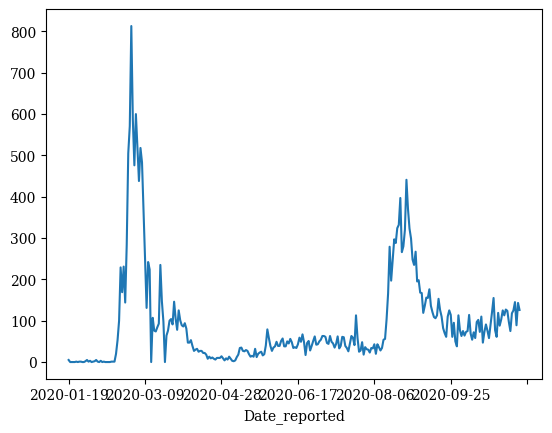

In [5]:
import pandas as pd
import datetime
full_covid19=pd.read_csv('data/COVID19_20_11_10.csv')

full_covid19

#한국만 떼어오자 - pandas의 groubpy로 할 수 있음. 
iskorea=full_covid19[' Country']=='Republic of Korea'
korea_covid19=full_covid19[iskorea]
# index : 날짜로 설정
# 초기 발생 시작 날짜인 2020-01-19를 1일차로 시작.
korea_covid19.set_index('Date_reported',inplace=True)

# 시계열 array 생성
time_window_date=pd.date_range(start='2020-01-19', end='2020-11-09')




#datetimeseries를 list로
time_window=time_window_date.strftime('%Y-%m-%d').tolist()
time_window
korea_covid19
#시기에 맞게 slicing. (1-21~11,9)
korea_covid19_new=korea_covid19.loc[time_window]
korea_covid19_new
korea_new=korea_covid19_new[' New_cases']
korea_total=korea_covid19_new[' Cumulative_cases']
korea_total=korea_total.astype(int) #csv파일 불러올 때 text로 불러와짐.

#korea_total.plot(kind='line')
korea_new.plot(kind='line')
               

korea_new

korea_total

([korea_new[:x+1].sum() for x in range(len(korea_new))]==korea_total).sum()
# new와 total이 맞는지 확인.

### 최신 중대본 데이터 붙히기.

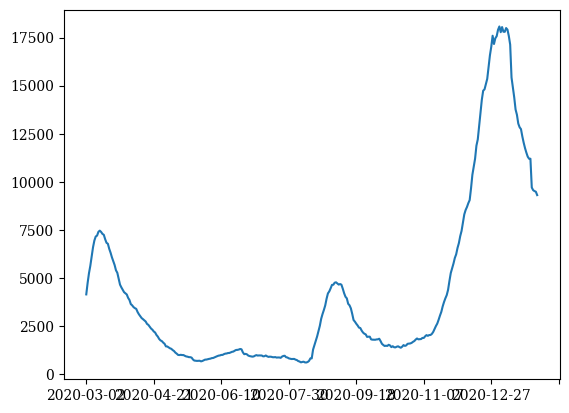

In [6]:
full_covid19=pd.read_csv('data/covid19_201201.csv')

full_covid19_2=pd.read_csv('data/covid19_20210130.csv', engine='python',encoding='euc-kr' )

full_covid19=full_covid19.T.drop(full_covid19.T.head(1).index) # 맨 위 행 삭제

full_covid19_2=full_covid19_2.T.drop(full_covid19_2.T.head(1).index)

full_covid19

temp_new=full_covid19[(full_covid19[0]=='확진') & (full_covid19[1]=='신규')][2]
temp_new=temp_new.iloc[2:]
temp_new.index.name='Date_reported'
temp_time_window_date=pd.date_range(start='2020-02-04', end='2020-12-01')
temp_time_window=temp_time_window_date.strftime('%Y-%m-%d').tolist()
temp_new.index=temp_time_window

temp_new

temp_new_2=full_covid19_2[(full_covid19_2[0]=='확진') & (full_covid19_2[1]=='신규')][2]

last_new=[354,305,336,467,451,370,393,371,288,303,444,504,403,362,326,343]
temp_new_2=temp_new_2.append(pd.Series(last_new))
temp_time_window_date_2=pd.date_range(start='2020-04-01', end='2021-02-15')
temp_time_window_2=temp_time_window_date_2.strftime('%Y-%m-%d').tolist()
temp_new_2.index=temp_time_window_2
temp_new_2.index.name='Date_reported'

temp_new_2

temp_total=full_covid19[(full_covid19[0]=='확진') & (full_covid19[1]=='누적')][2]
temp_total=temp_total[2:]
temp_total.index.name='Date_reported'
temp_total.index=temp_time_window

temp_total

temp_total_2=full_covid19_2[(full_covid19_2[0]=='확진') & (full_covid19_2[1]=='누적')][2]
last_total=[int(temp_total_2[-1])+sum(last_new[:i+1]) for i in range(len(last_new))]
temp_total_2=temp_total_2.append(pd.Series(last_total))

temp_total_2.index=temp_time_window_2
temp_total_2.index.name='Date_reported'

temp_total_2

pd.concat([temp_new_2.astype(int),(temp_total_2.astype(int)-temp_total_2.astype(int).shift(1))], axis=1)

temp_new_2.astype(int)==(temp_total_2.astype(int)-temp_total_2.astype(int).shift(1))

temp_total_2.astype(int)-temp_total_2.astype(int).shift(1)

full_covid19

temp_qua=full_covid19[(full_covid19[0]=='격리중')][2]
temp_qua=temp_qua[2:]
temp_qua.index.name='Date_reported'
temp_qua.index=temp_time_window

temp_qua_2=full_covid19_2[(full_covid19_2[0]=='격리중')&(full_covid19_2[1]=='누적')][2]
temp_qua_2.index.name='Date_reported'

temp_time_window_date_qua=pd.date_range(start='2020-04-01', end='2021-01-30')
temp_time_window_qua=temp_time_window_date_qua.strftime('%Y-%m-%d').tolist()
temp_qua_2.index=temp_time_window_qua

korea_qua=temp_qua.loc['2020-03-02':]

korea_qua2=temp_qua_2.loc['2020-04-09':]

korea_qua2.head()

korea_qua=korea_qua[:'2020-04-08'].append(korea_qua2)

korea_qua=korea_qua.astype(int)

korea_qua.plot(kind='line')
korea_qua

korea_qua.head()
korea_qua_raw=korea_qua
korea_qua.iloc[:]=smoothing(korea_qua,6)
time_window[0]

gap_date=pd.date_range(start='2020-01-19', end='2020-03-01').strftime('%Y-%m-%d').tolist() #빈 값 채우기
len(gap_date)

gap_df=pd.Series(data=np.zeros(43), index=gap_date).astype(int)

korea_qua=pd.concat([gap_df, korea_qua])

### 회복군, 이 역시 각자 가져와야함 ㅠㅠ제엔장

In [7]:
re=pd.read_csv('data/covid19_20210130.csv', engine='python',encoding='euc-kr' )
re=re.T.drop(re.T.head(1).index)
temp_recov=re[(re[0]=='격리해제')&(re[1]=='누적')][2]
temp_recov.index.name='Data_reported'

In [8]:
last_recov=[67878,68309,68775,69299,69704,70117,70505,70865,71218,71676,72226,72638,72936,73227,73559,73794]
temp_recov=temp_recov.append(pd.Series(last_recov))

In [9]:
temp_recov.index=temp_time_window_2
temp_recov # 얘는 04-01부터만 대조 가능 ^_^.
korea_recov=temp_recov.astype(int)
print(korea_recov.iloc[108:109])
print(korea_qua.iloc[181:182])

2020-07-18    12519
dtype: int64
2020-07-18    906.006859
dtype: float64


> 차이는 73 만큼 차이남.

84027
84071.57845179428


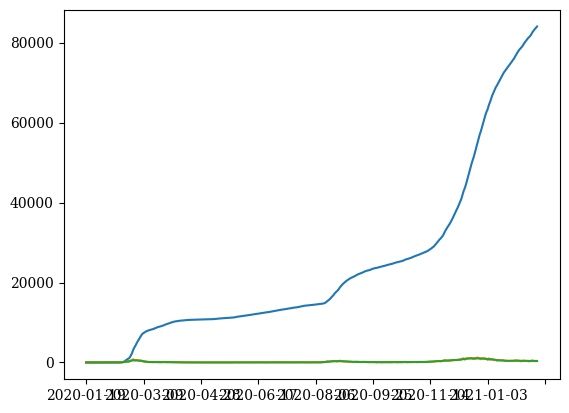

In [10]:
last_lamda=[30,20,41,34,22,19,27,46,25,30,30,37,19,17,22,21]
time_window=pd.date_range(start='2020-01-19', end='2021-02-15')
time_window=time_window.strftime('%Y-%m-%d').tolist()

overseas=full_covid19_2[(full_covid19_2[0]=='발생경로')&(full_covid19_2[1]=='해외유입')][2]

overseas.head(10)

overseas=overseas[8:]
# 4월9일부터
overseas

lamda[81:378]=overseas.values
lamda[378:394]=last_lamda

middle_overseas=[4,2,5,5,1,6,11,13,20,34,30,13,24,21,13,15,7,18,22,15,24,7,14,14]
lamda[57:81]=middle_overseas
lamda[:57]=0 

lamda_raw=lamda
lamda=np.array(smoothing(lamda,10))
lamda_total=[sum(lamda[:x+1]) for x in range(len(lamda))]
#pd.set_option('display.max_rows', 500)

# 3월 12일부터 합치자.((신규,누적) - 2021-01-30 최신)
# 3월 12일~15일과 3월 19일~22일의 보고체계때문에 4명이 여기서 맞음. 아무튼 3월 19일 이전걸로 합쳐야 함. 
# 그냥 1월 19일의 신규확진자를 4 줄이고, 누적확진자도 그만큼 줄이는 걸로 하자. 
# 격리는 3월 2일부터 시행.
# 두 data별 보고 시점 차이가 존재함. (존홉 data의 경우 신규확진자 0명도 존재. )

korea_new[0]=korea_new[0]-4
korea_total.iloc[:]=[sum(korea_new[:x+1]) for x in range(len(korea_new))]

pd.concat([korea_total,temp_total], axis=1)

korea_new_raw=korea_new[:'2020-03-11'].append(temp_new['2020-03-12':])
korea_new_raw=korea_new_raw.append(temp_new_2['2020-12-02':])

korea_total_raw=korea_total[:'2020-03-11'].append(temp_total['2020-03-12':])
korea_total_raw=korea_total_raw.append(temp_total_2['2020-12-02':])

korea_total_raw=korea_total_raw.astype(int)
korea_new_raw=korea_new_raw.astype(int)



korea_total_raw_test=[sum(korea_new_raw[:x+1]) for x in range(len(korea_new_raw))]

korea_total_raw.iloc[:]=korea_total_raw_test

korea_total_raw.plot(kind='line')

print(korea_new_raw.sum()) #수정 전
print(pd.Series(smoothing(korea_new_raw.values,10),index=korea_new_raw.index).sum()) #평탄화 후

#smoothing

korea_total.values

korea_new_raw.plot()
plt.plot(smoothing(korea_new_raw,10))

> 해외유입 우선 제외하고 피팅하기


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



/home/mskang/.conda/envs/jinsu/lib/python3.8/site-packages/pandas/_config/config.py:622: FutureWarning:


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.




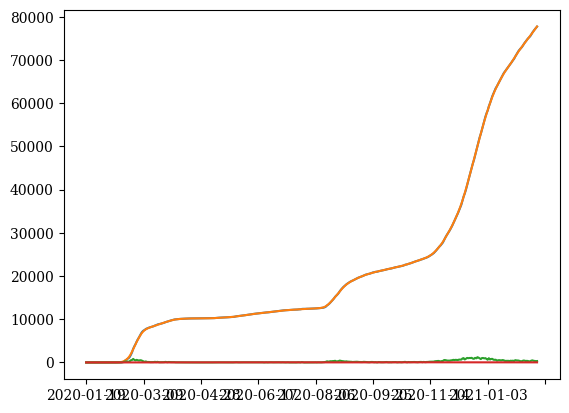

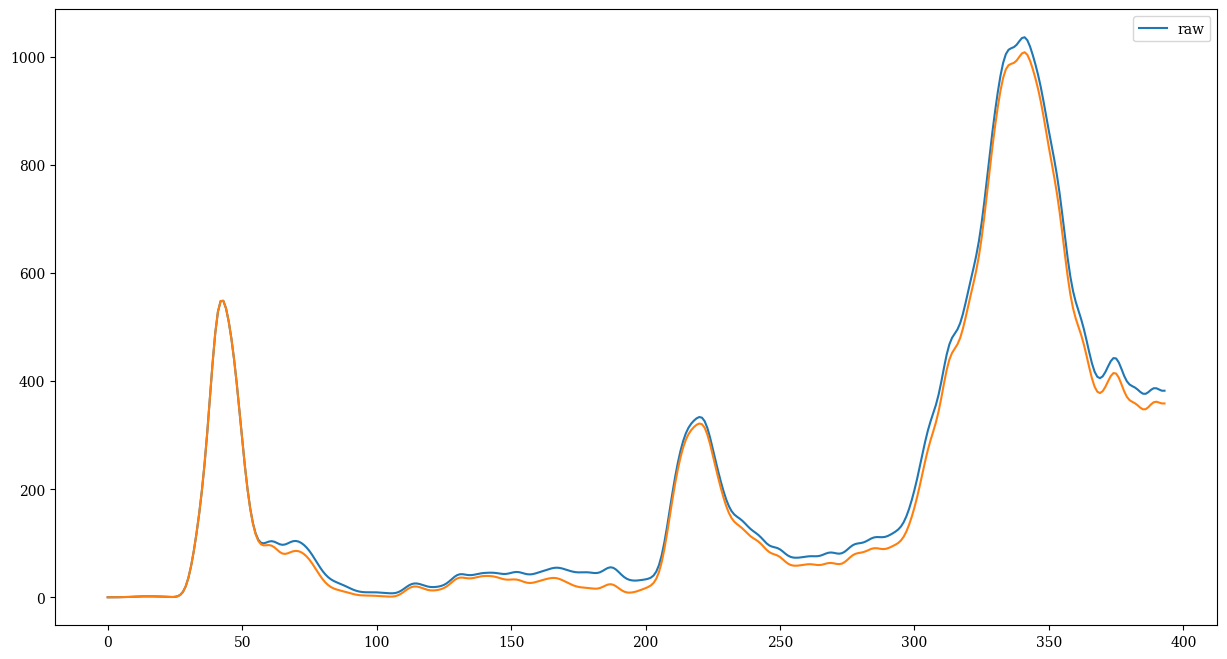

In [11]:
pd.reset_option('all')

korea_new_local=korea_new_raw-lamda[:394]
lamda_total=[sum(lamda[:x+1]) for x in range(len(korea_new_raw))]
korea_total_local=korea_total_raw-lamda_total

([sum(korea_new_local[:x+1]) for x in range(len(korea_new_raw))]==korea_total_local).sum()

#한번 실행시킬 때 마다 6번의 평탄화가 진행됨. 
#korea_new=pd.Series(smoothing(korea_new.values,6),index=korea_new.index)
#korea_total=pd.Series(smoothing(korea_total.values,6),index=korea_total.index)

korea_new_local_smd=smoothing(korea_new_local,6)
korea_total_local_smd=[np.sum(korea_new_local_smd[:x+1]) for x in range(len(korea_new_local_smd))] # 누적확진자 불러오기.
korea_total_local_smd=pd.Series(korea_total_local_smd,korea_new_raw.index)

korea_total_local.plot(kind='line')
korea_total_local_smd.plot(kind='line')
#korea_new.plot(kind='line')

((korea_new_local+lamda[:394])==korea_new_raw).sum()
# 지역 + 해외 = 총신규

korea_new_local.plot()
#plt.plot(korea_new_local_smd)
#korea_new_raw.plot()

plt.plot(lamda[:394])

plt.figure(figsize=(15,8))
#plt.plot(korea_new_raw.values)
#plt.plot(korea_new_local.values)

plt.plot(smoothing(korea_new_raw,10), label='raw')
plt.plot(smoothing(korea_new_local,10))
plt.legend()

<AxesSubplot:title={'center':'smoothed local + unsmoothed abroad'}>

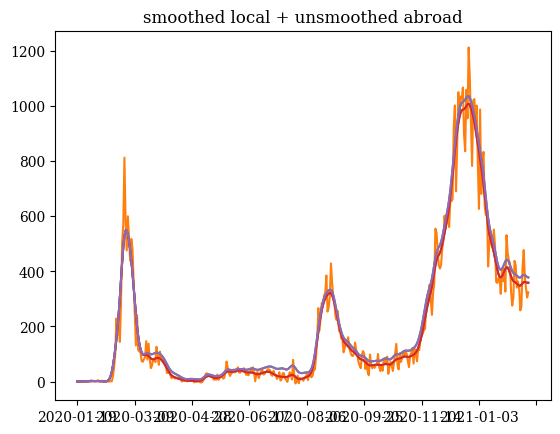

In [12]:
korea_new_local_smd=smoothing(korea_new_local,10)
korea_new_local_smd=pd.Series(korea_new_local_smd,index=korea_new_raw.index)

korea_new_local_smd.plot(kind='line')
korea_new_local.plot(kind='line')


(korea_new_local_smd+lamda[:394]).plot()
korea_new_local_smd.plot()

korea_new=korea_new_local_smd+lamda[:len(korea_new_local_smd)]
korea_total=[sum(korea_new[:x+1]) for x in range(len(korea_new))]

plt.title('smoothed local + unsmoothed abroad')
korea_new.plot()
#plt.plot(korea_total)

> index 맞춰주기

In [15]:
w2h=pd.read_pickle('result/full_dict(window=2,rho=0.77).pickle')
w2m=pd.read_pickle('result/full_dict(window=2,rho=0.66).pickle')
w3h=pd.read_pickle('result/full_dict(window=3,rho=0.77).pickle')
w3m=pd.read_pickle('result/full_dict(window=3,rho=0.6).pickle')
w2b=pd.read_pickle('result/full_dict(Window=2,rho=best).pickle')
w3b=pd.read_pickle('result/full_dict(window=3,rho=best).pickle')

In [16]:
w2h.index=korea_new_raw[181:257].index
w2m.index=korea_new_raw[181:257].index
w2b.index=korea_new_raw[181:257].index
w3m.index=korea_new_raw[274:394].index
w3h.index=korea_new_raw[274:394].index
w3b.index=korea_new_raw[274:394].index

## 논문용 시각화

### 1. 집단 별 감염력 비교

### 0. 신규, 누적 확진자 비교.

#### a.  E, A, I의 감염자 규모 비교 (실시간)

In [20]:
window2=[w2b,w2m,w2h]
for_save_window2=['(w2b).png', '(w2m).png', '(w2h).png']
window3=[w3b,w3m,w3h]
for_save_window3=['(w3b).png', '(w3m).png', '(w3h).png']

for_save=['(b).png', '(m).png', '(h).png']

In [21]:
path='picture/'

In [ ]:
w3=w3b
w2=w2b

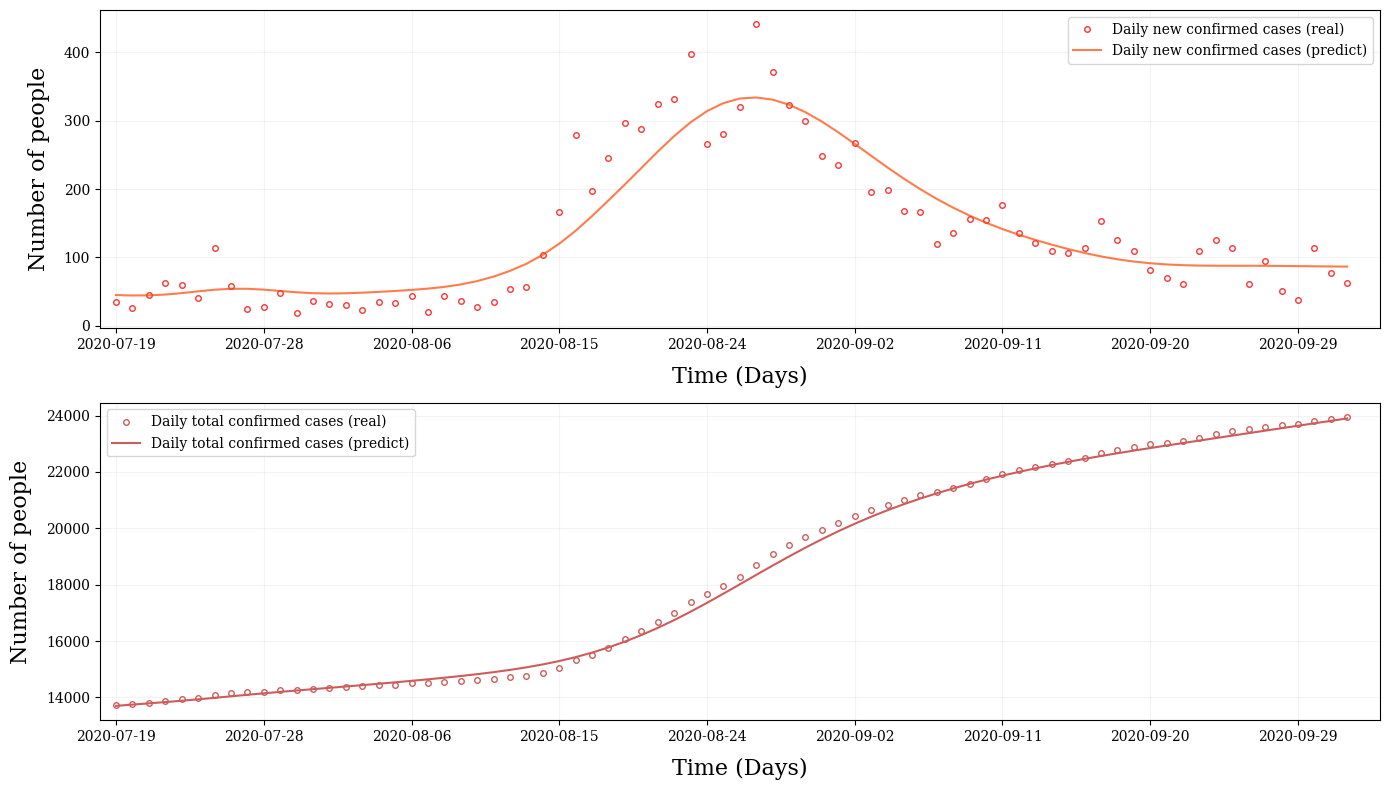

In [322]:
plt.figure(figsize=(14,8))
plt.subplot(2,1,1)
plt.plot(korea_new_raw[182:258].values, 'o', mfc='white', mec='red', alpha=0.8, ms=4, label='Daily new confirmed cases (real)')
#plt.plot((w2['Q_new']-w2['abroad']+lamda_raw[182:258]).values,'-', color='orangered',linewidth=2.5, ms=5, alpha=0.7, label='Daily new confirmed cases (predict)')
plt.plot((w2['Q_new']).values,'-', color='orangered',linewidth=1.5, ms=5, alpha=0.7, label='Daily new confirmed cases (predict)')

plt.grid(alpha=0.15)
plt.legend()
#compare_infectivity(w2)[2].iloc[:,-3:].plot(kind='line', ax=ax)
n=9
plt.xticks(np.arange(len(w2))[::n], korea_new_raw[182:258].index[::n],  )
plt.xlim([-1,77])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.ylabel('Number of people', fontsize=16, labelpad=10)
plt.xlabel('Time (Days)', fontsize=16, labelpad=10)

plt.subplot(2,1,2)
plt.plot(korea_total_raw[182:258].values, 'o', mfc='white', mec='indianred', alpha=1, ms=4, label='Daily total confirmed cases (real)')
#plt.plot((w2['Q_new']-w2['abroad']+lamda_raw[182:258]).values,'-', color='orangered',linewidth=2.5, ms=5, alpha=0.7, label='Daily new confirmed cases (predict)')
plt.plot((w2['Q_total']).values,'-', color='indianred',linewidth=1.5, ms=5, alpha=1, label='Daily total confirmed cases (predict)')

plt.grid(alpha=0.15)
plt.legend()
#compare_infectivity(w2)[2].iloc[:,-3:].plot(kind='line', ax=ax)
n=9
plt.xticks(np.arange(len(w2))[::n], korea_new_raw[182:258].index[::n],  )
plt.xlim([-1,77])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.ylabel('Number of people', fontsize=16, labelpad=10)
plt.xlabel('Time (Days)', fontsize=16, labelpad=10)
plt.tight_layout()

plt.savefig(path+'A. Compare with real data'+for_save_window2[idx]+'.png', dpi=600)

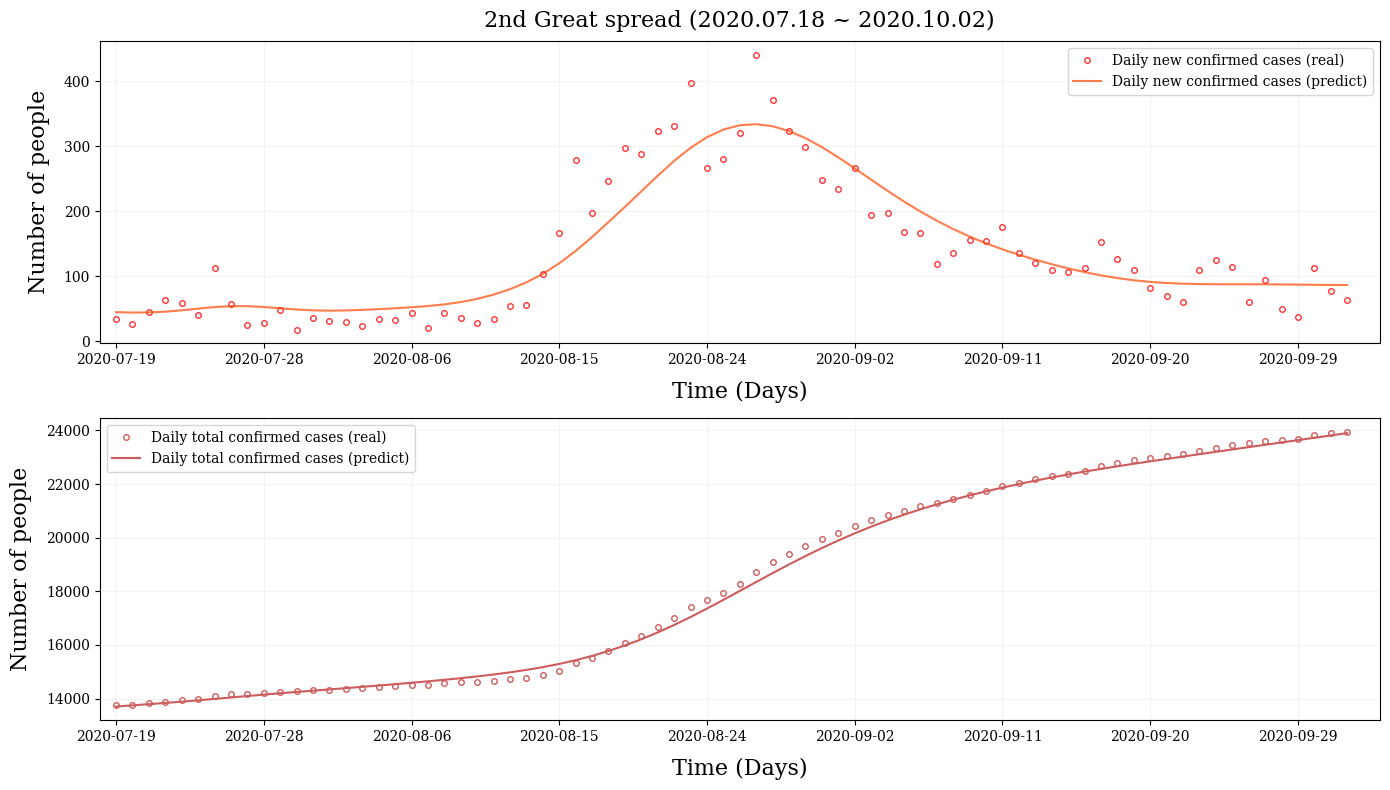

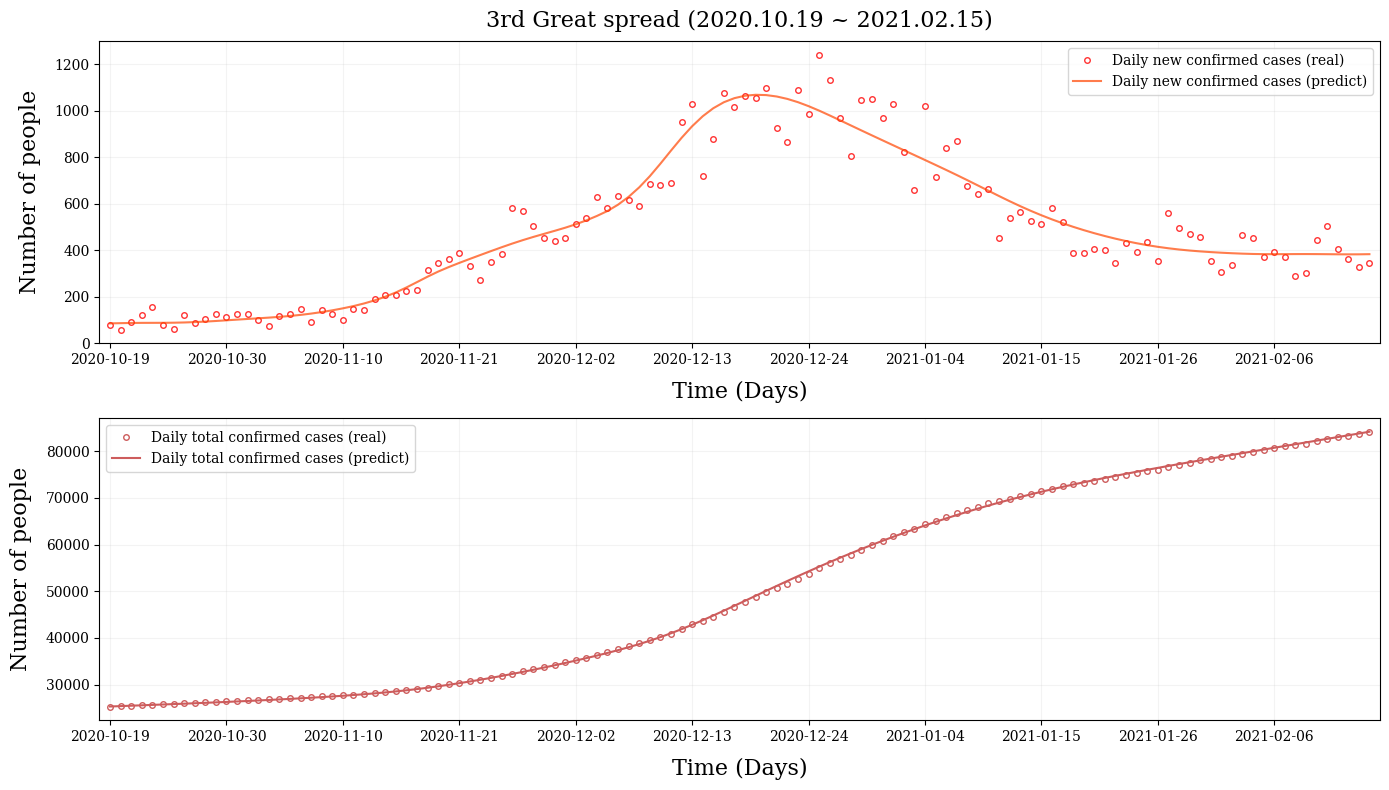

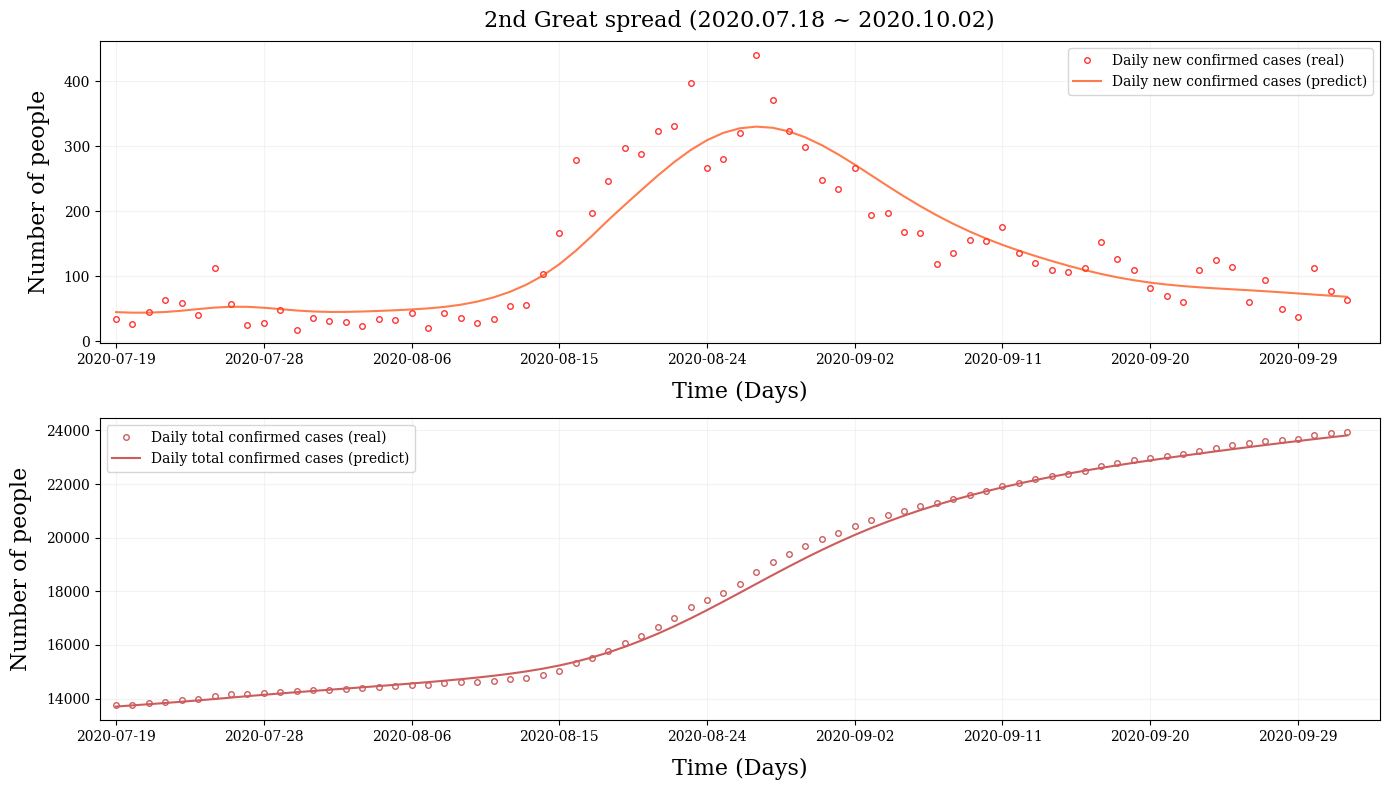

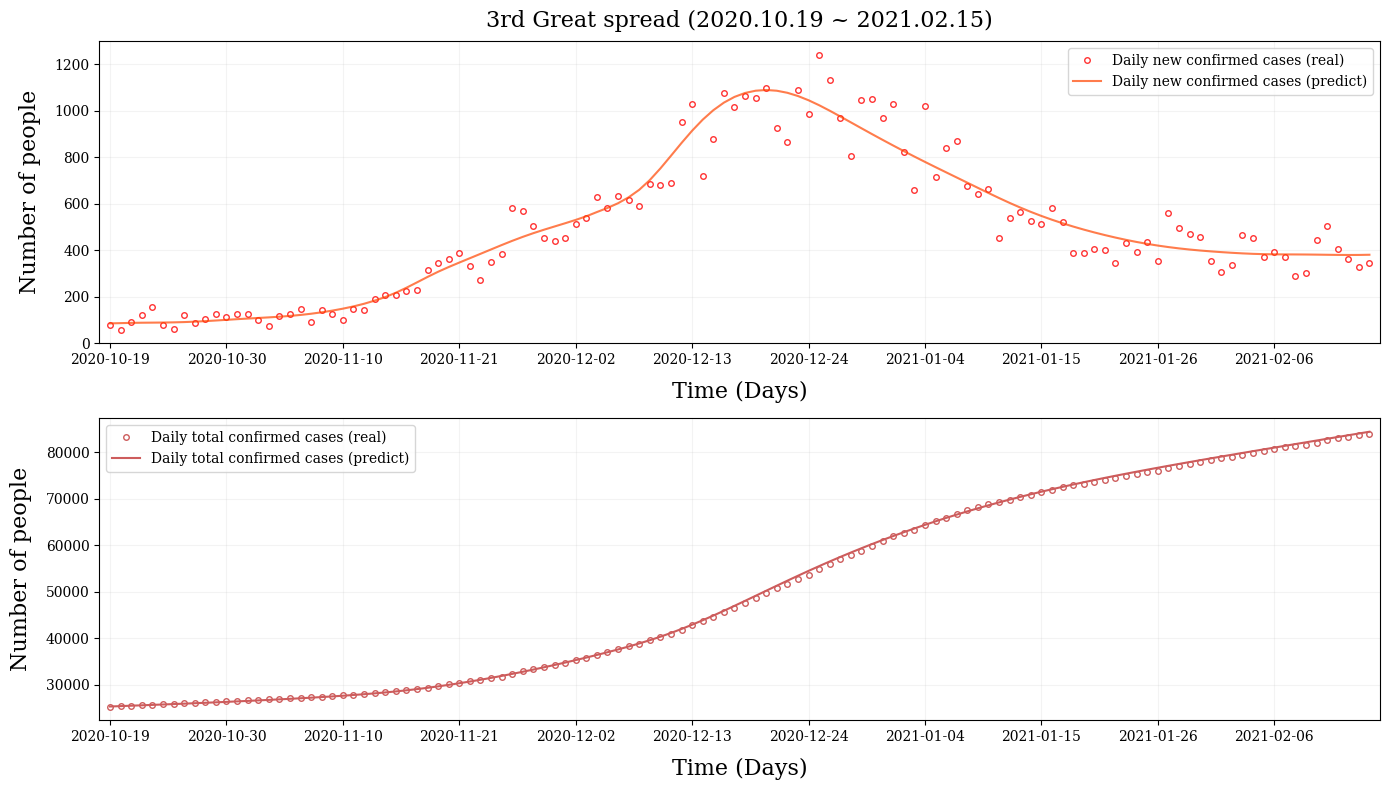

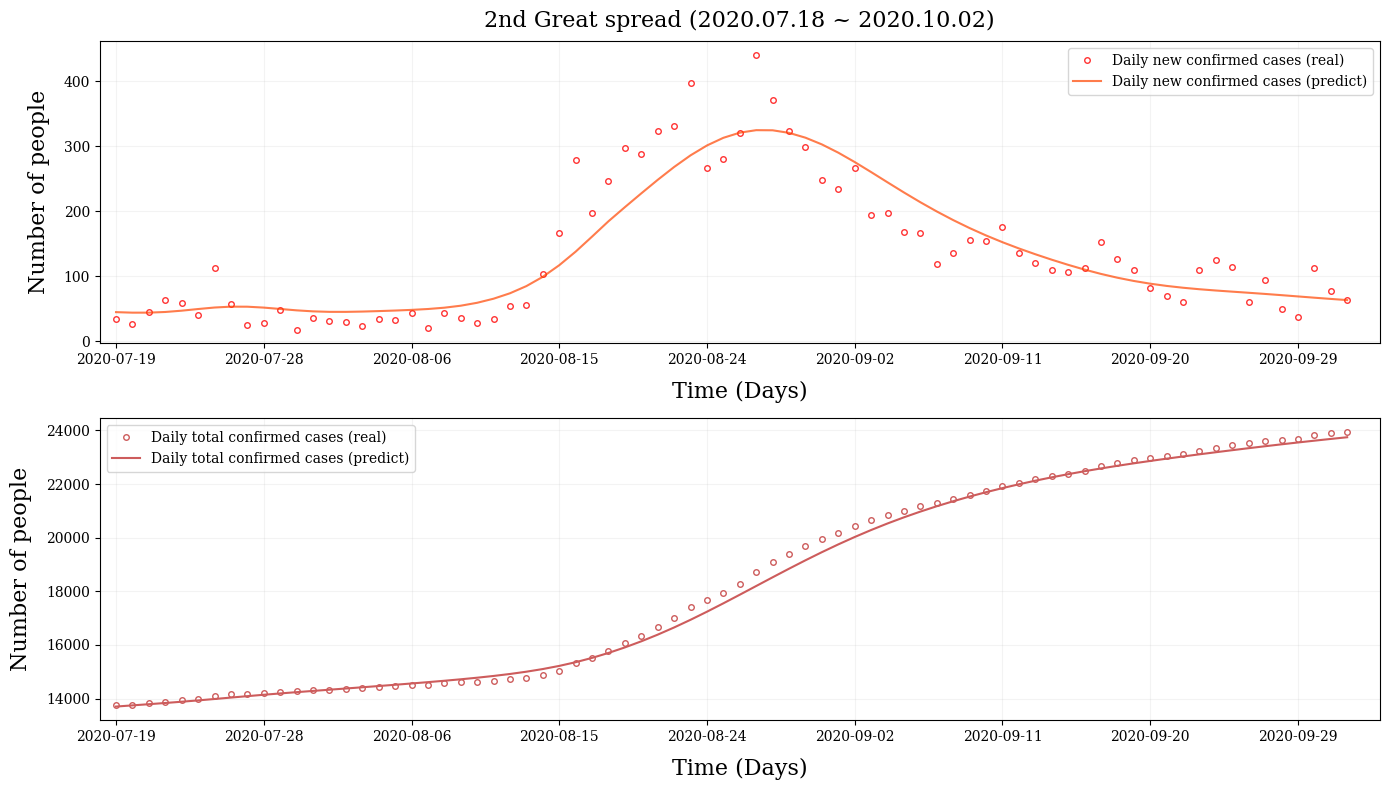

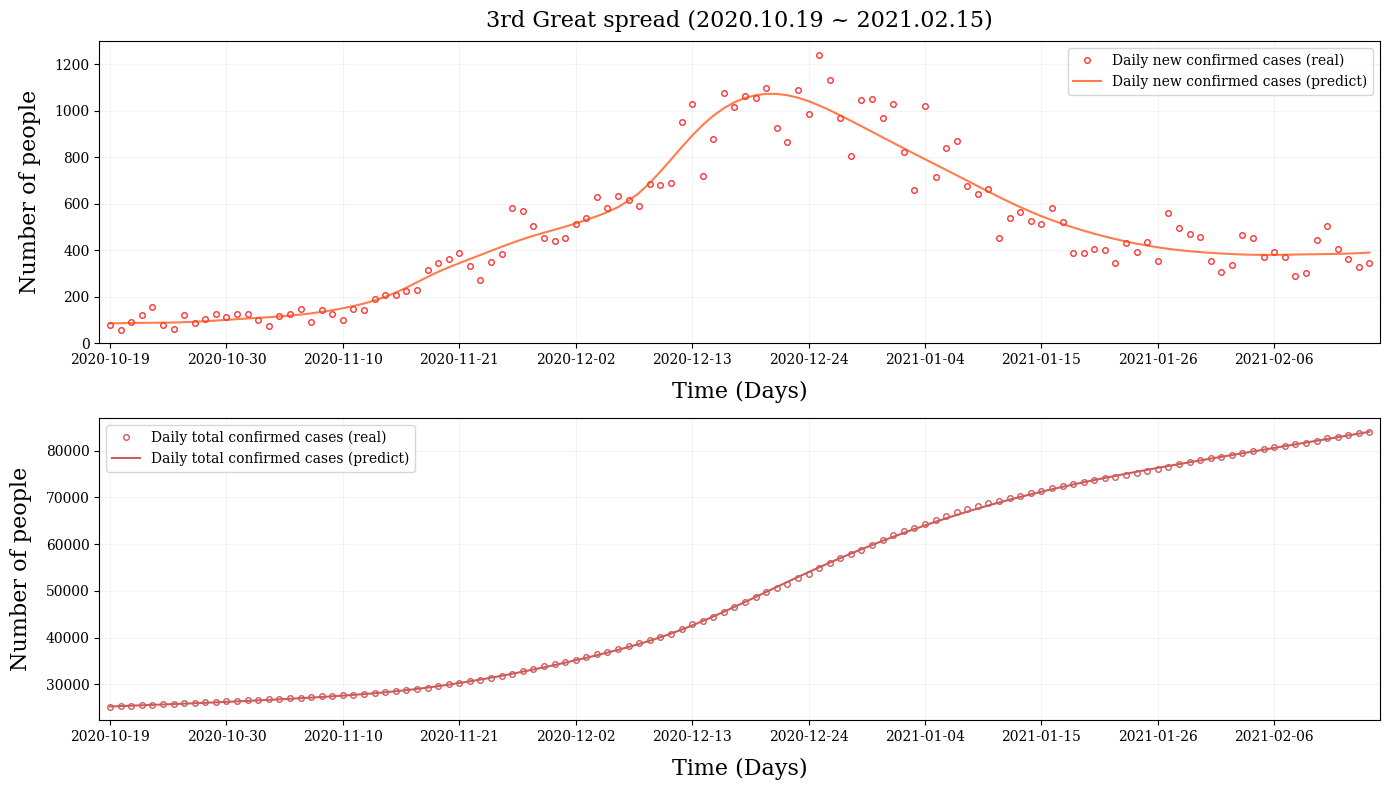

In [324]:
for idx, (w2, w3) in enumerate(zip(window2, window3)):
    plt.figure(figsize=(14,8))
    

    plt.subplot(2,1,1)
    plt.title('2nd Great spread (2020.07.18 ~ 2020.10.02)', fontsize=16, pad=10)
    plt.plot(korea_new_raw[182:258].values, 'o', mfc='white', mec='red', alpha=0.8, ms=4, label='Daily new confirmed cases (real)')
    #plt.plot((w2['Q_new']-w2['abroad']+lamda_raw[182:258]).values,'-', color='orangered',linewidth=2.5, ms=5, alpha=0.7, label='Daily new confirmed cases (predict)')
    plt.plot((w2['Q_new']).values,'-', color='orangered',linewidth=1.5, ms=5, alpha=0.7, label='Daily new confirmed cases (predict)')

    plt.grid(alpha=0.15)
    plt.legend()
    #compare_infectivity(w2)[2].iloc[:,-3:].plot(kind='line', ax=ax)
    n=9
    plt.xticks(np.arange(len(w2))[::n], korea_new_raw[182:258].index[::n],  )
    plt.xlim([-1,77])
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(fontsize=10)
    plt.ylabel('Number of people', fontsize=16, labelpad=10)
    plt.xlabel('Time (Days)', fontsize=16, labelpad=10)

    plt.subplot(2,1,2)
    plt.plot(korea_total_raw[182:258].values, 'o', mfc='white', mec='indianred', alpha=1, ms=4, label='Daily total confirmed cases (real)')
    #plt.plot((w2['Q_new']-w2['abroad']+lamda_raw[182:258]).values,'-', color='orangered',linewidth=2.5, ms=5, alpha=0.7, label='Daily new confirmed cases (predict)')
    plt.plot((w2['Q_total']).values,'-', color='indianred',linewidth=1.5, ms=5, alpha=1, label='Daily total confirmed cases (predict)')

    plt.grid(alpha=0.15)
    plt.legend()
    #compare_infectivity(w2)[2].iloc[:,-3:].plot(kind='line', ax=ax)
    n=9
    plt.xticks(np.arange(len(w2))[::n], korea_new_raw[182:258].index[::n],  )
    plt.xlim([-1,77])
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(fontsize=10)
    plt.ylabel('Number of people', fontsize=16, labelpad=10)
    plt.xlabel('Time (Days)', fontsize=16, labelpad=10)
    
    plt.tight_layout()
    
    plt.savefig(path+'A. Compare with real data'+for_save_window2[idx], dpi=600)
    # --> 3차
    plt.figure(figsize=(14,8))
    plt.subplot(2,1,1)
    
    plt.title('3rd Great spread (2020.10.19 ~ 2021.02.15)', fontsize=16, pad=10)
    plt.plot(korea_new_raw[274:394].values, 'o', mfc='white', mec='red', alpha=0.8, ms=4, label='Daily new confirmed cases (real)')
    #plt.plot((w3['Q_new']-w3['abroad']+lamda_raw[274:394]).values,'-', color='orangered',linewidth=2.5, ms=5, alpha=0.7, label='Daily new confirmed cases (predict)')
    plt.plot((w3['Q_new']).values,'-', color='orangered',linewidth=1.5, ms=5, alpha=0.7, label='Daily new confirmed cases (predict)')

    plt.grid(alpha=0.15)
    plt.legend()
    #compare_infectivity(w3)[2].iloc[:,-3:].plot(kind='line', ax=ax)
    n=11
    plt.xticks(np.arange(len(w3))[::n], korea_new_raw[274:394].index[::n])
    plt.xlim([-1,120])
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(fontsize=10)
    plt.ylabel('Number of people', fontsize=16, labelpad=10)
    plt.xlabel('Time (Days)', fontsize=16, labelpad=10)

    plt.subplot(2,1,2)
    plt.plot(korea_total_raw[274:394].values, 'o', mfc='white', mec='indianred', alpha=1, ms=4, label='Daily total confirmed cases (real)')
    #plt.plot((w3['Q_new']-w3['abroad']+lamda_raw[274:394]).values,'-', color='orangered',linewidth=2.5, ms=5, alpha=0.7, label='Daily new confirmed cases (predict)')
    plt.plot((w3['Q_total']).values,'-', color='indianred',linewidth=1.5, ms=5, alpha=1, label='Daily total confirmed cases (predict)')

    plt.grid(alpha=0.15)
    plt.legend()
    #compare_infectivity(w3)[2].iloc[:,-3:].plot(kind='line', ax=ax)
    n=11
    plt.xticks(np.arange(len(w3))[::n], korea_new_raw[274:394].index[::n])
    plt.xlim([-1,120])
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(fontsize=10)
    plt.ylabel('Number of people', fontsize=16, labelpad=10)
    plt.xlabel('Time (Days)', fontsize=16, labelpad=10)
    
    plt.tight_layout()
    
    plt.savefig(path+'A. Compare with real data'+for_save_window3[idx], dpi=600)

> I_G, I_B, I_A 의 비율과 thetA_G,theta_B,theta_A의 비율은 모두 다르다.
(E를 거치기 때문)

In [18]:
def compare_infectivity(df):
    '각 집단 별 감염시키는 정도'
    N=51780000
    compare_eai=pd.DataFrame()
    ig=df['beta']*df['c']*df['S']/N*(df['fever']*df['omega_G']*df['I_G'])
    ia=df['beta']*df['c']*df['S']/N*(df['fever']*df['omega_A']*df['I_A'])
    ib=df['beta']*df['c']*df['S']/N*(df['fever']*df['omega_B']*df['I_B'])
    ag=df['beta']*df['c']*df['S']/N*(df['ep_A']*df['omega_G']*df['A_G'])
    aa=df['beta']*df['c']*df['S']/N*(df['ep_A']*df['omega_A']*df['A_A'])
    ab=df['beta']*df['c']*df['S']/N*(df['ep_A']*df['omega_B']*df['A_B'])
    eg=df['beta']*df['c']*df['S']/N*(df['ep_A']*df['ep']*df['sigma']*df['omega_G']*df['E_G'])
    ea=df['beta']*df['c']*df['S']/N*(df['ep_A']*df['ep']*df['sigma']*df['omega_A']*df['E_A'])
    eb=df['beta']*df['c']*df['S']/N*(df['ep_A']*df['ep']*df['sigma']*df['omega_B']*df['E_B'])
    
    compare_eai['I(g)']=ig
    compare_eai['I(a)']=ia
    compare_eai['I(b)']=ib
    compare_eai['A(g)']=ag
    compare_eai['A(a)']=aa
    compare_eai['A(b)']=ab
    compare_eai['E(g)']=eg
    compare_eai['E(a)']=ea
    compare_eai['E(b)']=eb
    compare_eai['I']=ig+ia+ib
    compare_eai['A']=ag+aa+ab
    compare_eai['E']=eg+ea+eb
    
    compare_eai_cumul=pd.DataFrame()
    compare_eai_sum=compare_eai.sum()
    compare_eai_cumul['G']=[compare_eai_sum['E(g)'],compare_eai_sum['A(g)'],compare_eai_sum['I(g)']]
    compare_eai_cumul['A']=[compare_eai_sum['E(a)'],compare_eai_sum['A(a)'],compare_eai_sum['I(a)']]
    compare_eai_cumul['B']=[compare_eai_sum['E(b)'],compare_eai_sum['A(b)'],compare_eai_sum['I(b)']]
    compare_eai_cumul.index=['Exposed', 'Unreported', 'Infected']
    
    

    return compare_eai_sum, compare_eai_cumul,compare_eai

### 4 part comparing

In [ ]:
print(time_window[280])
print('1.5단계시작', time_window[304])
print('2단계시작', time_window[310])
print('2.5단계 시작', time_window[324])
print(time_window[355])


1. middle

In [17]:
colors = ['#1f77b4','#ff7f0e','#d62728']

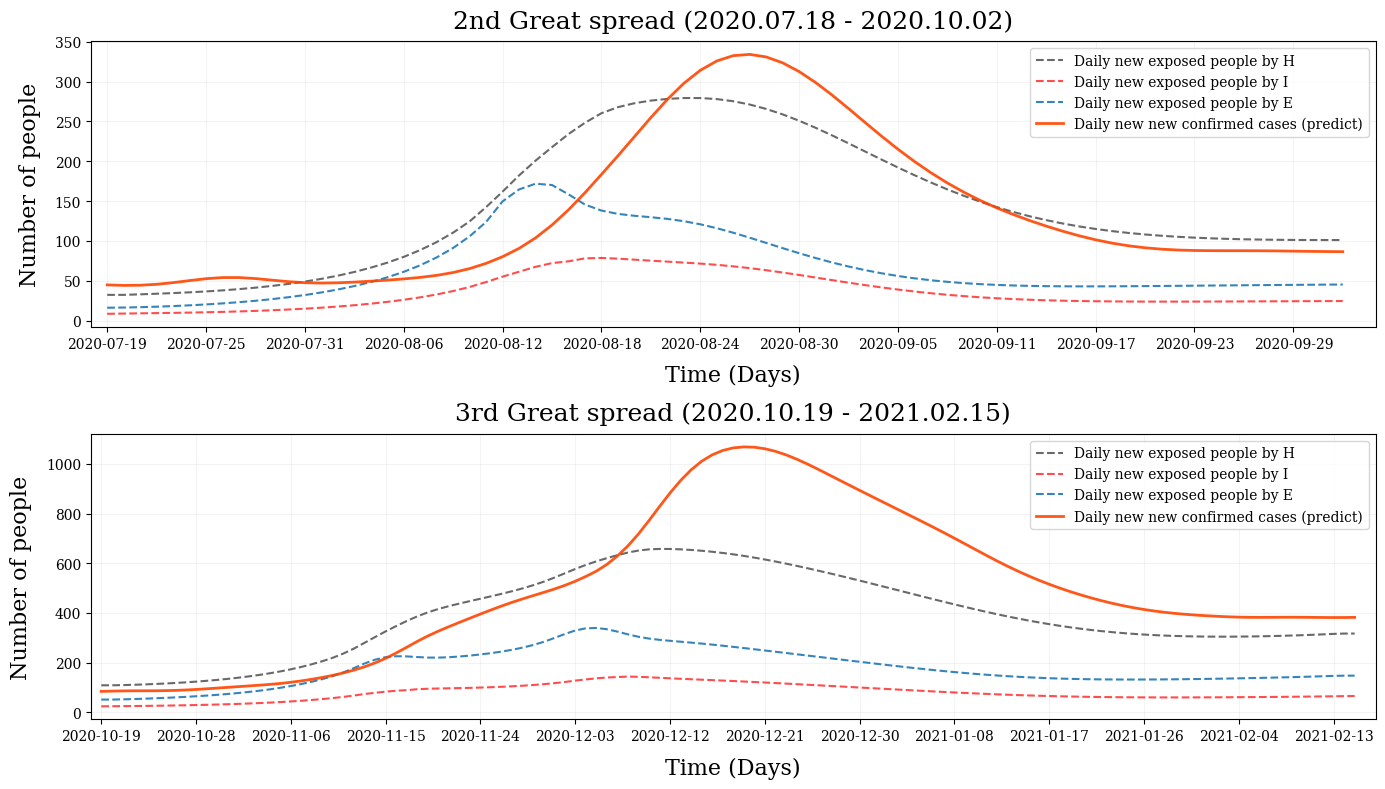

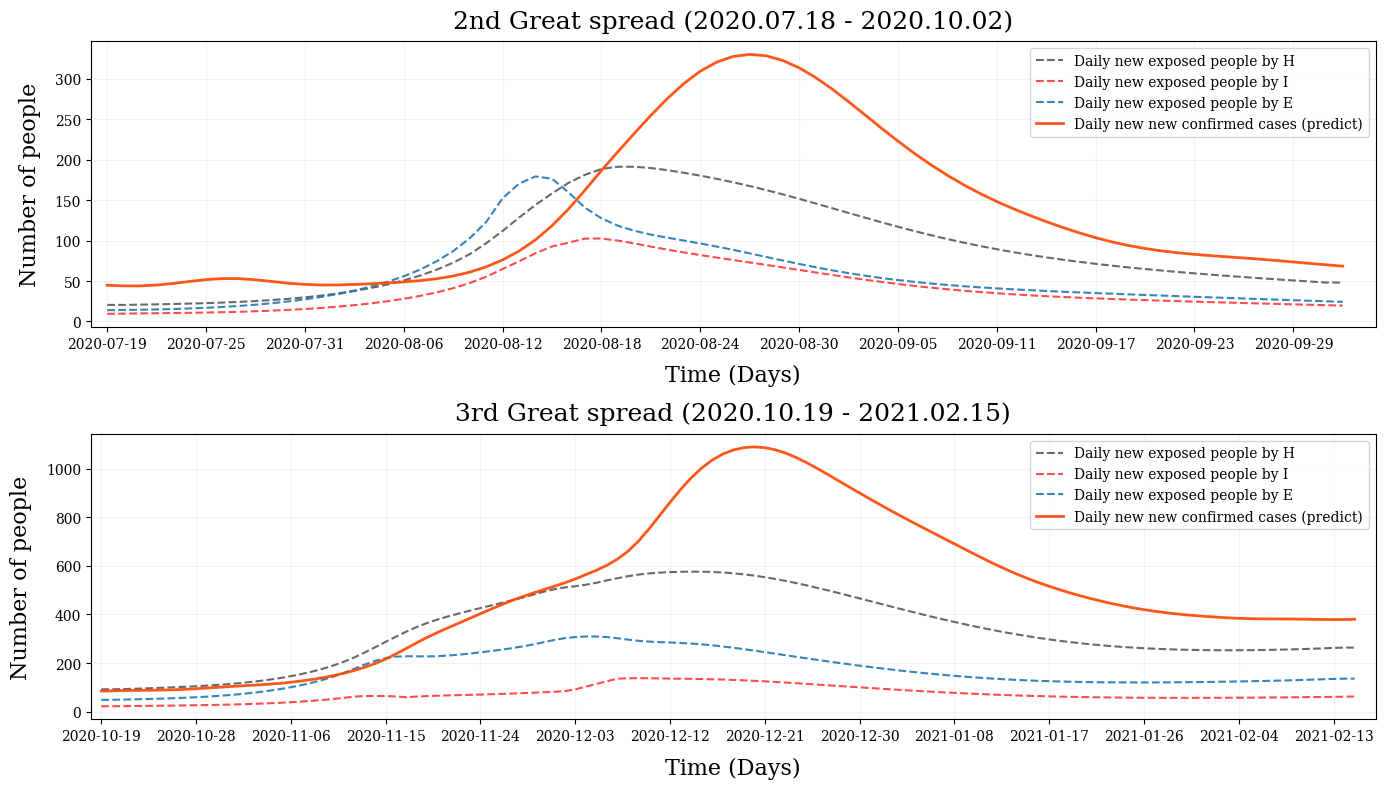

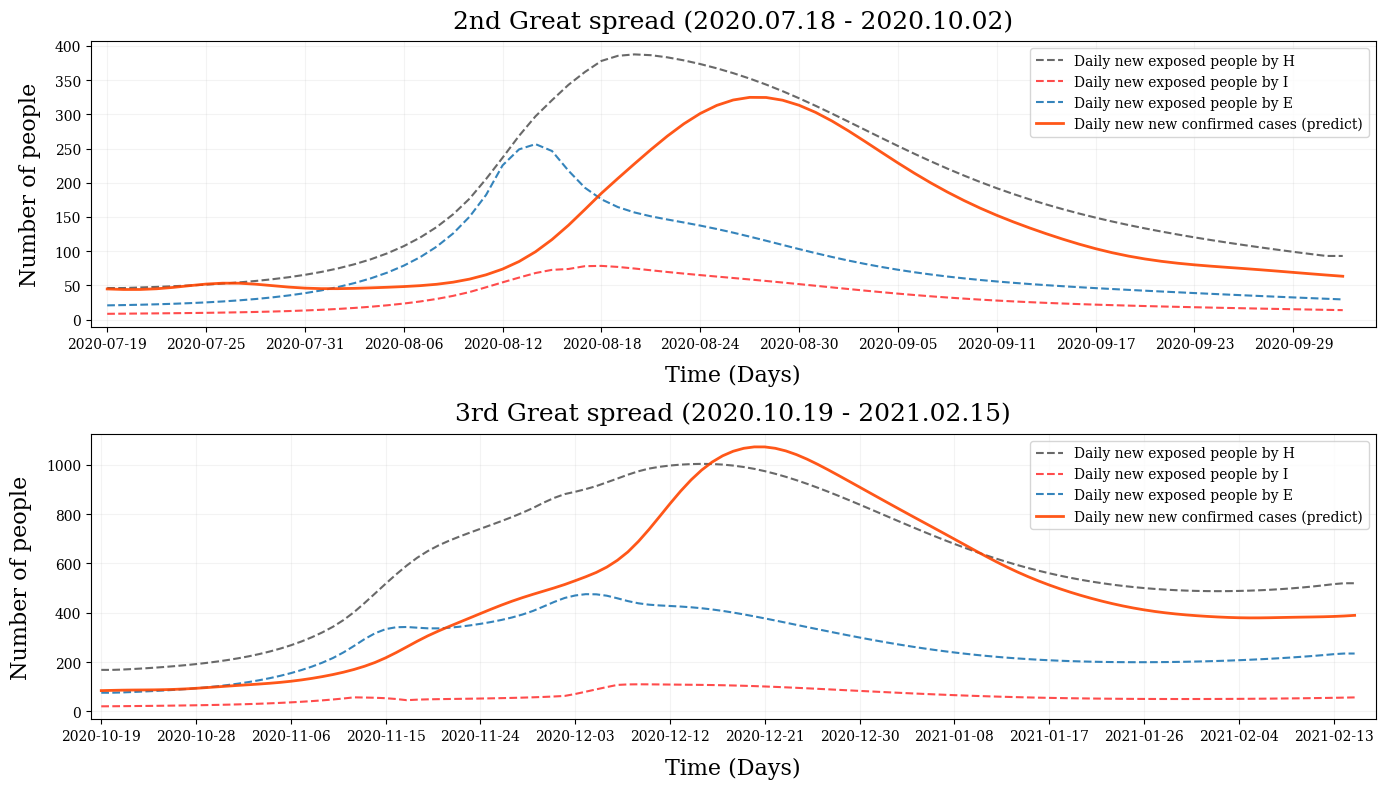

In [24]:
for idx, (w2, w3) in enumerate(zip(window2, window3)):
    plt.figure(figsize=(14,8))
    plt.subplot(2,1,1)
    i=compare_infectivity(w2)[2].iloc[:,-3]
    a=compare_infectivity(w2)[2].iloc[:,-2]
    e=compare_infectivity(w2)[2].iloc[:,-1]

    plt.plot(smoothing(a.values,1),'--',color='dimgrey',ms=4,markevery=(28,5),label='Daily new exposed people by H')
    plt.plot(i.values,'r--', ms=4, alpha=0.7,markevery=(28,5),label='Daily new exposed people by I')
    plt.plot(e.values,'--',color='#1f77b4',alpha=0.9,ms=4, markevery=(28,5),label='Daily new exposed people by E')
    plt.plot(w2['Q_new'].values,'-', color='orangered',linewidth=2,markevery=(28,5), ms=5, alpha=0.9, label='Daily new new confirmed cases (predict)')
    plt.title('2nd Great spread (2020.07.18 - 2020.10.02)', size=18, pad=10)
    plt.grid(alpha=0.15)
    plt.legend()
    n=6
    plt.xticks(np.arange(len(w2))[::n], korea_new_raw[182:258].index[::n])
    plt.xlim([-1,77])
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(fontsize=10)
    plt.ylabel('Number of people', fontsize=16, labelpad=10)
    plt.xlabel('Time (Days)', fontsize=16, labelpad=10)

    plt.subplot(2,1,2)
    i=compare_infectivity(w3)[2].iloc[:,-3]
    a=compare_infectivity(w3)[2].iloc[:,-2]
    e=compare_infectivity(w3)[2].iloc[:,-1]

    plt.plot(smoothing(a.values,2),'--',color='dimgrey',ms=4,markevery=(7),label='Daily new exposed people by H')
    plt.plot(i.values,'r--', ms=4, alpha=0.7,markevery=(28,5),label='Daily new exposed people by I')
    plt.plot(smoothing(e.values,2),'--',color='#1f77b4',alpha=0.9,ms=4, markevery=(7),label='Daily new exposed people by E')
    plt.plot(w3['Q_new'].values,'-', color='orangered',linewidth=2,markevery=(28,5), ms=5, alpha=0.9, label='Daily new new confirmed cases (predict)')
    plt.title('3rd Great spread (2020.10.19 - 2021.02.15)', size=18, pad=10)
    plt.grid(alpha=0.15)
    plt.legend()
    n=9
    plt.xticks(np.arange(len(w3))[::n], korea_new_raw[274:394].index[::n])
    plt.xlim([-1,121])
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(fontsize=10)
    plt.ylabel('Number of people', fontsize=16, labelpad=10)
    plt.xlabel('Time (Days)', fontsize=16, labelpad=10)
    plt.tight_layout()
    plt.savefig(path+'HEI+R'+for_save[idx], dpi=600)

> 기존 기둥

In [ ]:
i=compare_infectivity(w2m)[2].iloc[:,-3]
a=compare_infectivity(w2m)[2].iloc[:,-2]
e=compare_infectivity(w2m)[2].iloc[:,-1]

fig,ax=plt.subplots(figsize=(20,8))
korea_new_raw[182:258].plot(kind='bar',cmap='gray',secondary_y=False,  rot=1, alpha =0.25
                            , ax=ax, use_index=True, label='Daily new confimed cases (data)')

plt.plot(smoothing(i.values,1),'r--o', ms=4, alpha=0.8,markevery=(28,5),label='Infected')
plt.plot(a.values,'k--o',alpha=0.7,ms=4,markevery=(28,5),label='Undocumented')
plt.plot(smoothing(e.values,1),'b--o',alpha=0.7,ms=4, markevery=(28,5),label='Exposed')
plt.plot(w2m['Q_new'].values,'-o', color='orangered',linewidth=2.5, markevery=(28,5), ms=5, alpha=0.9, label='Daily new confirmed cases (predict)')
plt.legend()
#compare_infectivity(w2m)[2].iloc[:,-3:].plot(kind='line', ax=ax)
n=15
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])


#### b. EAI 비교(누적)

>평균적인 비율

>모두의 합계로 가는 것이 맞다.

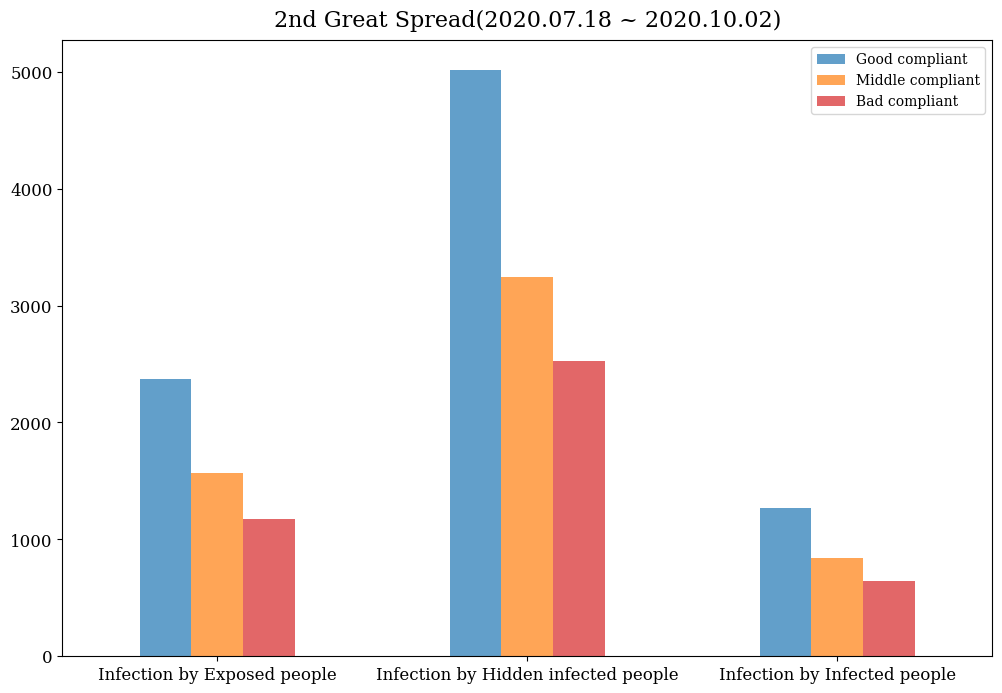

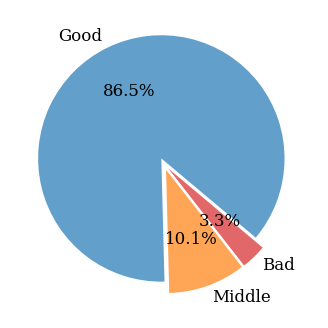

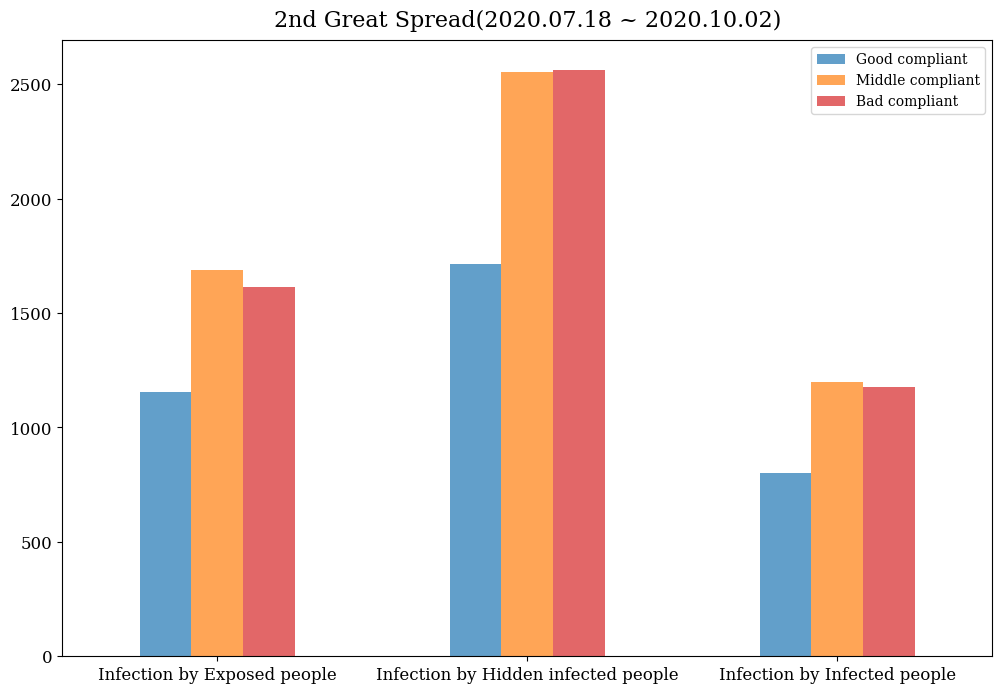

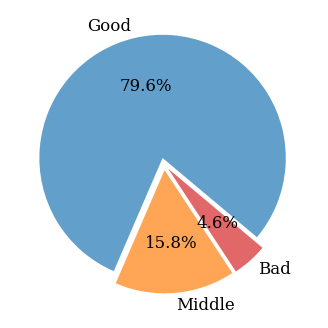

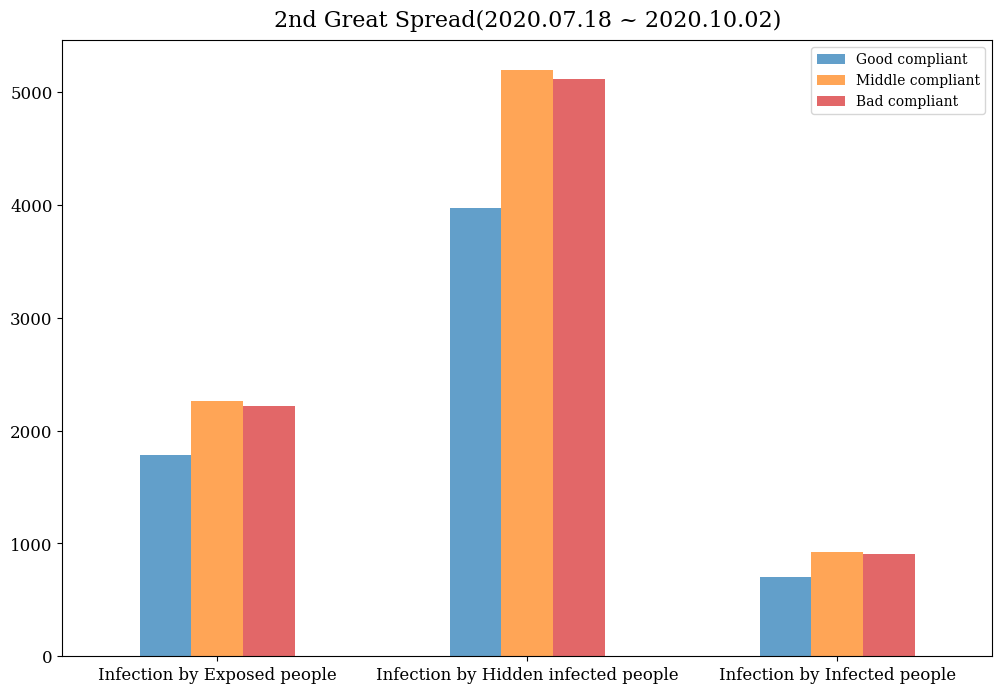

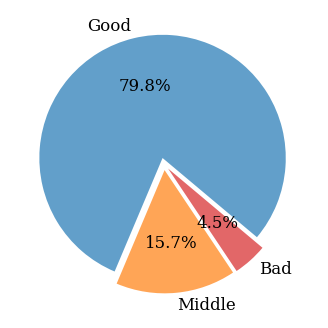

In [294]:
for idx, w2 in enumerate(window2):
    prop_eai_2nd=w2[['E_G','E_A', 'E_B']].sum().values+w2[['I_G','I_A', 'I_B']].sum().values+w2[['A_G','A_A', 'A_B']].sum().values

    compare_infec=compare_infectivity(w2)[1]
    compare_infec.index=['Infection by Exposed people', 'Infection by Hidden infected people', 'Infection by Infected people']
    compare_infec.columns=['Good compliant', 'Middle compliant', 'Bad compliant']

    compare_infec.plot(figsize=(12,8),kind='bar',color=['#1f77b4','#ff7f0e','#d62728'], alpha=0.7, rot=0,fontsize=12)
    plt.title( '2nd Great Spread(2020.07.18 ~ 2020.10.02)'.format(np.round(w2['row'].iloc[0],3)),size=16, pad=10)
    plt.savefig(path+'bar'+for_save_window2[idx])
    plt.figure(figsize=(4,4))
    ratio = w2.iloc[:,5:8].mean()
    labels = ['Good', 'Middle', 'Bad']
    explode = [0.05, 0.05, 0.05]
    colors = ['#1f77b4','#ff7f0e','#d62728']

    n=plt.pie(prop_eai_2nd, autopct='%.1f%%',labels=labels,startangle=320, counterclock=True, explode=explode,textprops={'size': 12},  colors=colors,wedgeprops={'alpha':0.7})
    plt.savefig(path+'pie'+for_save_window2[idx], dpi=600)

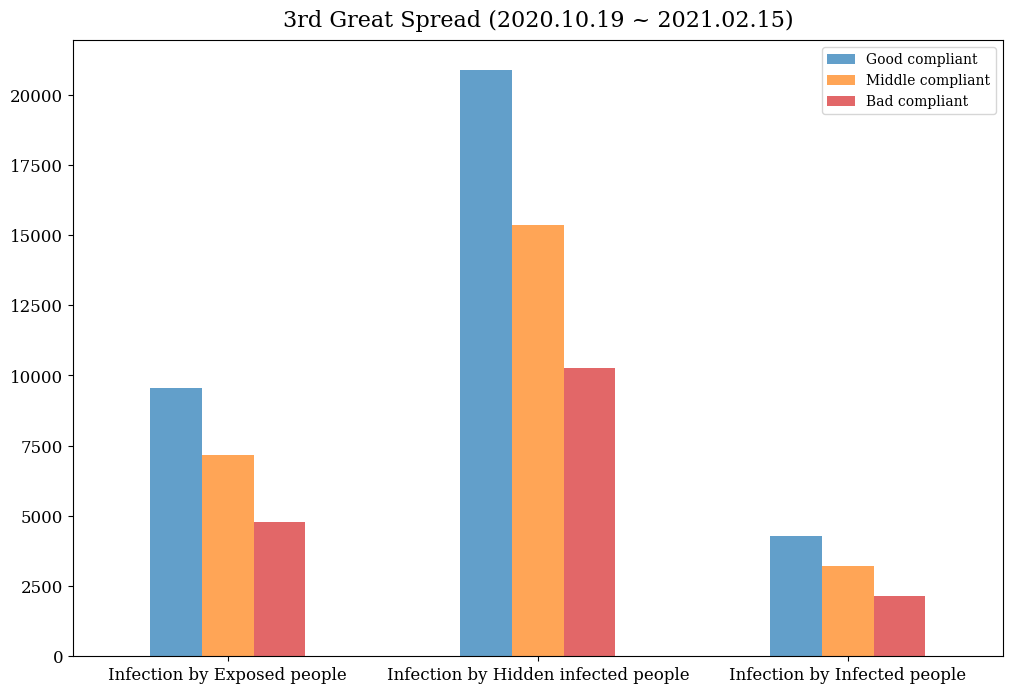

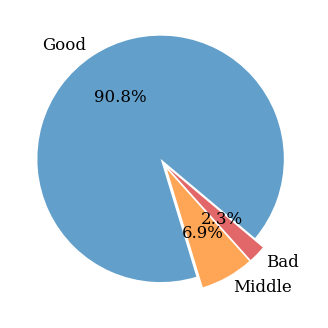

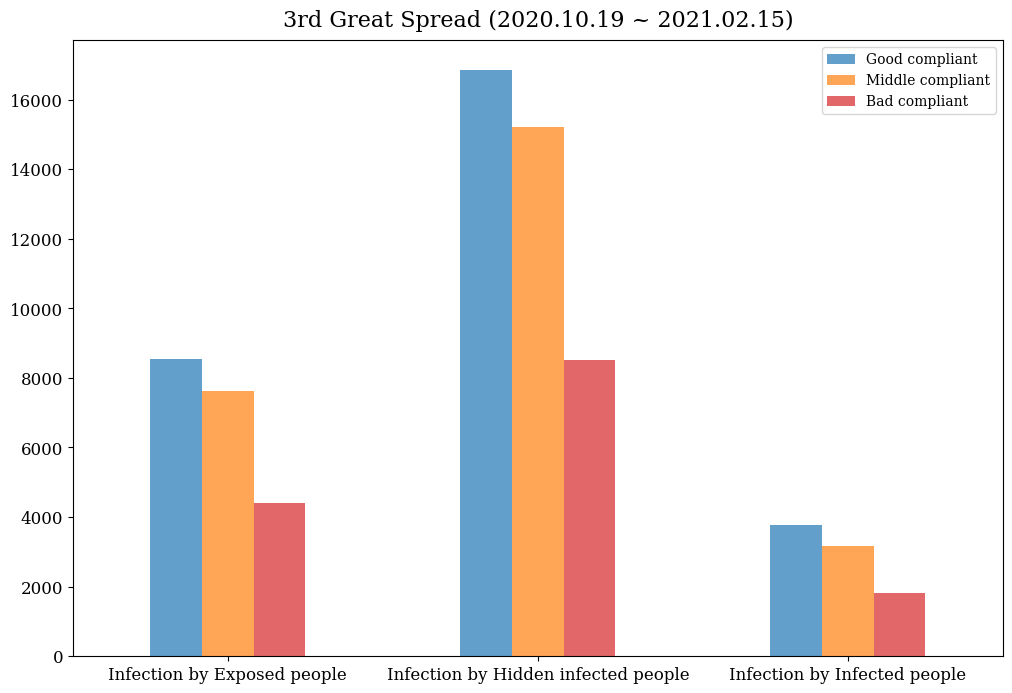

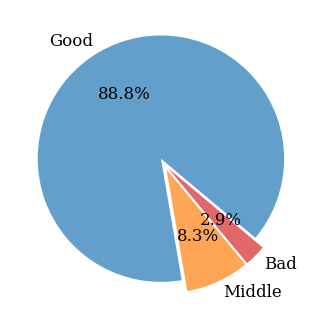

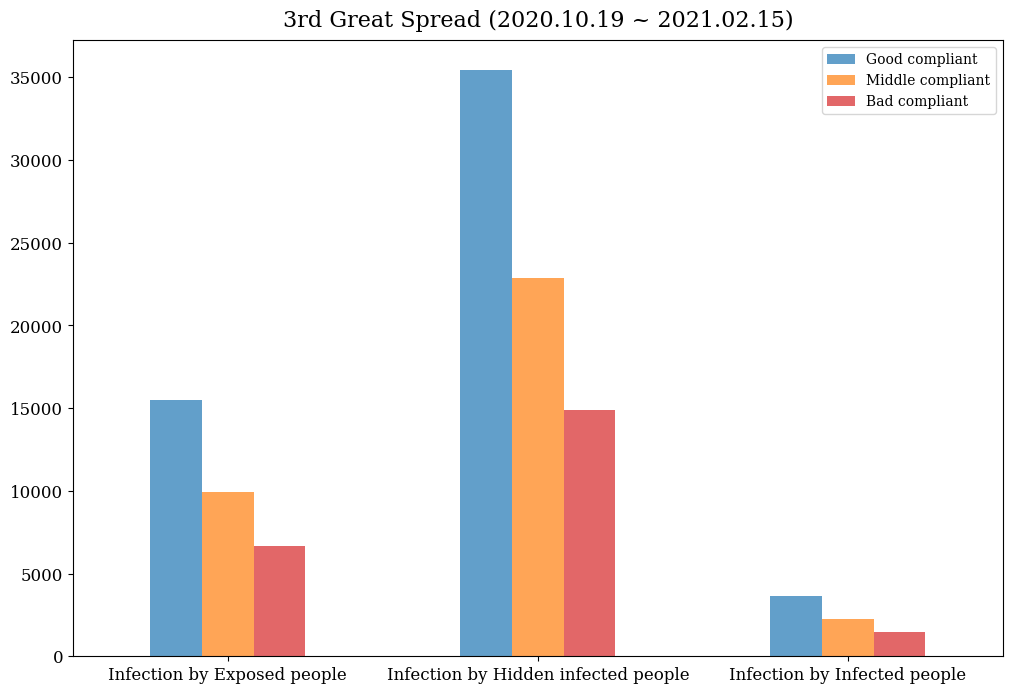

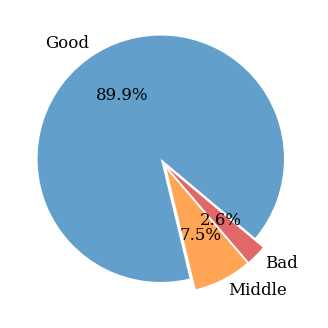

In [295]:
for idx, w3 in enumerate(window3):
    prop_eai_3rd=w3[['E_G','E_A', 'E_B']].sum().values+w3[['I_G','I_A', 'I_B']].sum().values+w3[['A_G','A_A', 'A_B']].sum().values

    compare_infec=compare_infectivity(w3)[1]
    compare_infec.index=['Infection by Exposed people', 'Infection by Hidden infected people', 'Infection by Infected people']
    compare_infec.columns=['Good compliant', 'Middle compliant', 'Bad compliant']

    compare_infec.plot(figsize=(12,8),kind='bar',color=['#1f77b4','#ff7f0e','#d62728'], alpha=0.7,rot=0, fontsize=12)
    plt.title( '3rd Great Spread (2020.10.19 ~ 2021.02.15)'.format(np.round(w3['row'].iloc[0],3)),size=16, pad=10)
    plt.savefig(path+'bar'+for_save_window3[idx])
    plt.figure(figsize=(4,4))
    ratio = w3.iloc[:,5:8].mean()
    labels = ['Good', 'Middle', 'Bad']
    explode = [0.05, 0.05, 0.05]
    colors = ['#1f77b4','#ff7f0e','#d62728']

    n=plt.pie(prop_eai_3rd, autopct='%.1f%%',textprops={'size':12}, labels=labels,startangle=320, counterclock=True, explode=explode,  colors=colors,wedgeprops={'alpha':0.7})
    plt.savefig(path+'pie'+for_save_window3[idx], dpi=600)

>피드백용

In [ ]:
for idx, w2 in enumerate(window2):
    fig,ax=plt.subplots(figsize=(14,4))
    plt.title('2nd Great spread (2020.07.18 ~ 2020.10.02)', size=18, pad=10)
    korea_new_raw[182:258].plot(kind='bar',cmap='gray',secondary_y=False,  rot=1, alpha =0.10
                                , ax=ax, use_index=True, label='Daily new confimed cases (data)')
    ax.set_ylabel('Number of people', size=16)
    ax.legend(loc='upper left', fontsize=10)
    n=7
    ticks = ax.xaxis.get_ticklocs()
    ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
    ax.xaxis.set_ticks(ticks[::n])
    ax.xaxis.set_ticklabels(ticklabels[::n])
    ax2=ax.twinx()
    colors = ['#1f77b4','#ff7f0e','#d62728']
    # w2['theta_G'].plot(color=colors[0], label='Good Compliant', alpha=0.7)
    # w2['theta_A'].plot(color=colors[1], label='Middle Compliant', alpha=0.7)
    # w2['theta_B'].plot(color=colors[2], label='Bad Compliant', alpha=0.7)
    plt.plot(w2['theta_G'].values, color=colors[0], label='Propotion of Good compliant group', alpha=0.7)
    plt.plot(w2['theta_A'].values, color=colors[1], label='Propotion of Middle compliant group', alpha=0.7)
    plt.plot(w2['theta_B'].values, color=colors[2], label='Propotion of Bad compliant group', alpha=0.7)
    plt.ylabel('Proportion of Group',  fontsize=16, labelpad=10)
    ax.set_xlabel('Time (Days)', size=16, labelpad=10)
    plt.legend(loc='right' ,bbox_to_anchor=(1,0.50), fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.tight_layout()
    plt.savefig(path+'Fatigue'+for_save_window2[idx], dpi=600)

In [ ]:
for idx, w3 in enumerate (window3):
    fig,ax=plt.subplots(figsize=(14,4))
    plt.title('3rd Great spread (2020.10.19 ~ 2021.02.15)', size=18 ,pad=10)
    korea_new_raw[274:394].plot(kind='bar',cmap='gray',secondary_y=False,  rot=1, alpha =0.10
                                , ax=ax, use_index=True, label='Daily new confimed cases (data)')
    ax.set_ylabel('Number of people', size=16)
    ax.legend(loc='upper left', fontsize=10)
    n=11
    ticks = ax.xaxis.get_ticklocs()
    ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
    ax.xaxis.set_ticks(ticks[::n])
    ax.xaxis.set_ticklabels(ticklabels[::n])
    ax2=ax.twinx()
    colors = ['#1f77b4','#ff7f0e','#d62728']
    # w3['theta_G'].plot(color=colors[0], label='Good Compliant', alpha=0.7)
    # w3['theta_A'].plot(color=colors[1], label='Middle Compliant', alpha=0.7)
    # w3['theta_B'].plot(color=colors[2], label='Bad Compliant', alpha=0.7)
    plt.plot(w3['theta_G'].values, color=colors[0], label='Propotion of Good compliant group', alpha=0.7)
    plt.plot(w3['theta_A'].values, color=colors[1], label='Propotion of Middle compliant group', alpha=0.7)
    plt.plot(w3['theta_B'].values, color=colors[2], label='Propotion of Bad compliant group', alpha=0.7)
    plt.ylabel('Proportion of Group',  fontsize=16, labelpad=10)
    ax.set_xlabel('Time (Days)', size=16, labelpad=10)
    plt.legend(loc='right' ,bbox_to_anchor=(1,0.70), fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.savefig(path+'Fatigue'+for_save_window3[idx], dpi=600)

#### C. 각 집단 별  회복군 비교  
> 단, 새로 생기는 R_I와 R_A를 비교  
또한, Q도 표기해줘야 좌우 갭을, R_total을 표기해줘야 상하 갭을,  
초기 3개를 제외하면 R_A_T_2 오류 있으므로 처음엔 빼줘야함..ㅋㅋ..(근데 얼마 크진 않앙)  
### 또한, 실제 회복군도 가져와볼까 싶지만 아마 조금 차이 날 것.  
# 이는 사실 mu만 잘 조정해서 후보정 하면 되긴 함.

##### mu 후보정

In [ ]:
w2b

In [211]:
def Calibrate_mu(df):
    "mu=16이 가장 적절했다(2nd)"
    mu=1/18
    I=df[['I_G','I_A','I_B']].sum(axis=1)
    tau=df['delta']*df['p']/(1-df['p'])
    delta=df['delta']
    lamda=df['abroad']
    Q_new=(tau+delta)*I+lamda 
    Q_new=Q_new.iloc[1:] # (len(df)-1)길이의 new.. 
    Q=df['Q'][0]
    Q_out_full=[]
    Q_out_full.append(Q*mu) # 첫번째 날.
    Q_full=[]
    Q_full.append(Q) # 첫번째 날.
    for i in range(len(Q_new)): # 2~마지막 날
        Q_out=Q*mu
        Q_out_full.append(Q_out)
        Q=Q+Q_new[i]-Q_out
        Q_full.append(Q) # 두번째 날 이후~ 
    Q_full=pd.DataFrame(data=Q_full, index=df.index, columns=['Q'])
    # 이하 R_I조정
    
    R_I=[df['R_I'][0]]
    for i in range(len(Q_out_full)-1): # Q_out --> R_I로 이어진다.
        R_I.append(R_I[i]+Q_out_full[i]) # 하나 남아야 함.
    Q_full['R_I']=R_I
    Q_full['R_A']=df['R_A']
    Q_full['R']=Q_full['R_I']+Q_full['R_A']
    Q_full['Q_total']=df['Q_total']
    return Q_full

> 피드백용

In [ ]:
for idx, (w2, w3) in enumerate(zip(window2, window3)):
    Calibrated_mu=Calibrate_mu(w2)
    fig,ax=plt.subplots(figsize=(14,8))
    plt.subplot(2,1,1)
    n=7

    plt.plot((Calibrated_mu['R']-Calibrated_mu['R'][0]).values,'-',color='navy',alpha=0.8, label='Total Recovered (predict)') # 우선 이거 잘못된 거니까 처리해주자.


    # plt.plot((Calibrated_mu['Q_total']-Calibrated_mu['Q_total'][0]).values, '--',color='orangered',alpha=0.9, label='Documented Quarantined (predict)')
    # plt.plot((korea_total_raw[181:257]-korea_total_raw[181]).values, 'o', color='orangered', mfc='white', ms=5,alpha=0.7, label='Documented Quarantined (data)')
    plt.plot((Calibrated_mu['R_I']-Calibrated_mu['R_I'][0]).values,label='Detected Recovered (predict)')
    plt.plot((korea_recov[108:184]-korea_recov[108]).values,'o', color='#1f77b4', mfc='white',ms=5,alpha=0.8, label='Detected Recovered (data)')
    plt.title('2nd Great spread(2020.07.18 ~ 2020.10.02)', size=18, pad=10)

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(fontsize=10)
    plt.ylabel('Number of people', fontsize=16, labelpad=10)
    #plt.xlabel('Time (Days)', fontsize=16, labelpad=10)
    plt.xticks(np.arange(len(w2))[::n], korea_new_raw[182:258].index[::n])
    plt.grid(alpha=0.3)
    plt.xlabel('Time (Days)', fontsize=16, labelpad=10)
    Calibrated_mu=Calibrate_mu(w3)
    plt.subplot(2,1,2)
    plt.title('3rd Great spread(2020.10.19 ~ 2021.02.15)', size=18, pad=10)
    n=11
    plt.plot((Calibrated_mu['R']-Calibrated_mu['R'][0]).values,'-',color='navy',alpha=0.9, label='Total Recovered (predict)')
    # plt.plot((korea_total_raw[273:393]-korea_total_raw[273]).values, 'o', color='orangered', mfc='white', ms=5,alpha=0.7, label='Documented Quarantined (data)')
    # plt.plot((Calibrated_mu['Q_total']-Calibrated_mu['Q_total'][0]).values, '--',color='orangered',alpha=0.9, label='Documented Quarantined (predict)')
    plt.plot((Calibrated_mu['R_I']-Calibrated_mu['R_I'][0]).values,label='Detected Recovered (predict)')
    plt.plot((korea_recov[200:320]-korea_recov[200]).values,'o', color='#1f77b4', mfc='white',ms=5,alpha=0.9, label='Detected Recovered (data)')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(fontsize=10)
    plt.ylabel('Number of people', fontsize=16, labelpad=10)
    plt.xlabel('Time (Days)', fontsize=16, labelpad=10)
    plt.xticks(np.arange(len(w3))[::n], korea_new_raw[274:394].index[::n])
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(path+'CompareR'+for_save[idx], dpi=600)

In [213]:
for idx, (w2, w3) in enumerate(zip(window2,window3)):
    print('w2(detected) : ',(Calibrate_mu(w2).iloc[-1]-Calibrate_mu(w2).iloc[0])['R_I'], for_save_window2[idx])
    print('w2(total) : ',(Calibrate_mu(w2).iloc[-1]-Calibrate_mu(w2).iloc[0])['R'], for_save_window2[idx])
    print((Calibrate_mu(w2).iloc[-1]-Calibrate_mu(w2).iloc[0])['R_I']/(Calibrate_mu(w2).iloc[-1]-Calibrate_mu(w2).iloc[0])['R'])
    print('w3(detected) :',(Calibrate_mu(w3).iloc[-1]-Calibrate_mu(w3).iloc[0])['R_I'],for_save_window3[idx])
    print('w3(total) : ',(Calibrate_mu(w3).iloc[-1]-Calibrate_mu(w3).iloc[0])['R'], for_save_window3[idx])
    print((Calibrate_mu(w3).iloc[-1]-Calibrate_mu(w3).iloc[0])['R_I']/(Calibrate_mu(w3).iloc[-1]-Calibrate_mu(w3).iloc[0])['R'])

w2(detected) :  8867.754543815325 (w2b).png
w2(total) :  21654.163797008347 (w2b).png
0.40951729316097896
w3(detected) : 52056.98176677573 (w3b).png
w3(total) :  131403.93582809408 (w3b).png
0.39615998895861065
w2(detected) :  8857.324839168246 (w2m).png
w2(total) :  18006.892543319904 (w2m).png
0.49188524993192606
w3(detected) : 52303.955776908435 (w3m).png
w3(total) :  108582.203767318 (w3m).png
0.4816991547619641
w2(detected) :  8818.590078713343 (w2h).png
w2(total) :  30097.90595110663 (w2h).png
0.29299679828353986
w3(detected) : 51913.84602614808 (w3h).png
w3(total) :  184360.0592171776 (w3h).png
0.28158944104586753


In [186]:
Calibrated_mu

Q           R_I            R_A              R  \
2020-10-19   1399.534713  23896.770841   32034.068267   55930.839108   
2020-10-20   1408.211828  23974.522769   32129.004714   56103.527483   
2020-10-21   1417.314543  24052.274698   32224.687792   56276.962490   
2020-10-22   1426.328531  24130.508688   32321.241030   56451.749718   
2020-10-23   1434.970503  24209.248385   32418.762128   56628.010513   
2020-10-24   1443.305971  24288.488859   32517.337094   56805.825953   
2020-10-25   1451.704557  24368.209442   32617.052360   56985.261803   
2020-10-26   1460.712931  24448.393107   32718.004539   57166.397646   
2020-10-27   1470.927177  24529.043361   32820.308038   57349.351399   
2020-10-28   1482.888949  24610.194079   32924.101071   57534.295150   
2020-10-29   1496.997840  24691.912255   33029.550659   57721.462914   
2020-10-30   1513.445434  24774.294975   33136.857239   57911.152214   
2020-10-31   1532.209026  24857.461522   33246.259369   58103.720891   
2020-11-01   1553.133428  24941.541823   33358.038896   58299.580719   
2020-11-02   1576.081589  25026.664547   33472.526814   58499.191361   
2020-11-03   1601.087521  25112.949738   33590.109948   58703.059686   
2020-11-04   1628.445822  25200.509826   33711.238519   58911.748345   
2020-11-05   1658.709499  25289.459133   33836.434699   59125.893831   
2020-11-06   1692.614352  25379.928345   33966.302363   59346.230708   
2020-11-07   1730.974692  25472.078873   34101.538414   59573.617287   
2020-11-08   1774.604395  25566.113003   34242.946290   59809.059293   
2020-11-09   1824.305270  25662.278264   34391.452536   60053.730800   
2020-11-10   1880.935337  25760.867397   34548.127634   60308.995031   
2020-11-11   1945.529372  25862.217690   34714.212662   60576.430352   
2020-11-12   2019.421053  25966.714097   34891.153868   60857.867965   
2020-11-13   2104.481532  26074.799063   35080.647945   61155.447007   
2020-11-14   2202.920347  26186.989121   35284.864840   61471.853961   
2020-11-15   2317.264324  26303.904762   35505.993622   61809.898383   
2020-11-16   2448.817307  26426.289225   35746.978025   62173.267251   
2020-11-17   2597.501466  26555.026132   36010.367453   62565.393585   
2020-11-18   2761.215930  26691.071538   36298.200935   62989.272473   
2020-11-19   2936.666143  26835.377175   36611.758233   63447.135408   
2020-11-20   3121.217758  26988.778060   36951.264979   63940.043040   
2020-11-21   3312.786054  27151.926179   37316.996422   64468.922601   
2020-11-22   3509.942324  27325.327166   37708.972540   65034.299706   
2020-11-23   3711.859497  27509.370836   38126.876069   65636.246904   
2020-11-24   3918.047733  27704.367631   38570.089195   66274.456826   
2020-11-25   4128.030279  27910.582048   39037.787440   66948.369488   
2020-11-26   4341.148511  28128.251366   39529.054423   67657.305789   
2020-11-27   4556.587168  28357.586382   40042.996928   68400.583310   
2020-11-28   4773.587848  28598.761299   40578.850341   69177.611640   
2020-11-29   4991.743253  28851.905031   41136.071835   69987.976866   
2020-11-30   5211.256894  29117.104356   41714.423740   70831.528096   
2020-12-01   5433.097415  29394.423425   42314.052473   71708.475898   
2020-12-02   5659.026815  29683.937697   42935.569787   72619.507484   
2020-12-03   5891.216200  29985.776442   43580.142903   73565.919345   
2020-12-04   6131.666752  30300.166821   44249.790845   74549.957666   
2020-12-05   6386.045523  30627.456610   44947.070398   75574.527008   
2020-12-06   6660.352065  30968.104763   45676.742620   76644.847383   
2020-12-07   6960.435932  31322.885070   46444.795832   77767.680902   
2020-12-08   7292.028855  31692.904629   47258.094658   78950.999286   
2020-12-09   7659.096491  32079.595514   48123.840022   80203.435536   
2020-12-10   8061.894779  32484.708228   49048.906476   81533.614704   
2020-12-11   8496.936679  32910.213589   50037.765980   82947.979569   
2020-12-12   8957.805928  33358.096632   51091.899369   84449.9

In [399]:
Calibrate_mu(w3b)

Q           R_I            R_A              R  \
2020-10-19   1399.534713  23896.770841   32034.068267   55930.839108   
2020-10-20   1408.211828  23974.522769   32129.004714   56103.527483   
2020-10-21   1417.314543  24052.274698   32224.687792   56276.962490   
2020-10-22   1426.328531  24130.508688   32321.241030   56451.749718   
2020-10-23   1434.970503  24209.248385   32418.762128   56628.010513   
2020-10-24   1443.305971  24288.488859   32517.337094   56805.825953   
2020-10-25   1451.704557  24368.209442   32617.052360   56985.261803   
2020-10-26   1460.712931  24448.393107   32718.004539   57166.397646   
2020-10-27   1470.927177  24529.043361   32820.308038   57349.351399   
2020-10-28   1482.888949  24610.194079   32924.101071   57534.295150   
2020-10-29   1496.997840  24691.912255   33029.550659   57721.462914   
2020-10-30   1513.445434  24774.294975   33136.857239   57911.152214   
2020-10-31   1532.209026  24857.461522   33246.259369   58103.720891   
2020-11-01   1553.133428  24941.541823   33358.038896   58299.580719   
2020-11-02   1576.081589  25026.664547   33472.526814   58499.191361   
2020-11-03   1601.087521  25112.949738   33590.109948   58703.059686   
2020-11-04   1628.445822  25200.509826   33711.238519   58911.748345   
2020-11-05   1658.709499  25289.459133   33836.434699   59125.893831   
2020-11-06   1692.614352  25379.928345   33966.302363   59346.230708   
2020-11-07   1730.974692  25472.078873   34101.538414   59573.617287   
2020-11-08   1774.604395  25566.113003   34242.946290   59809.059293   
2020-11-09   1824.305270  25662.278264   34391.452536   60053.730800   
2020-11-10   1880.935337  25760.867397   34548.127634   60308.995031   
2020-11-11   1945.529372  25862.217690   34714.212662   60576.430352   
2020-11-12   2019.421053  25966.714097   34891.153868   60857.867965   
2020-11-13   2104.481532  26074.799063   35080.647945   61155.447007   
2020-11-14   2202.920347  26186.989121   35284.864840   61471.853961   
2020-11-15   2317.264324  26303.904762   35505.993622   61809.898383   
2020-11-16   2448.817307  26426.289225   35746.978025   62173.267251   
2020-11-17   2597.501466  26555.026132   36010.367453   62565.393585   
2020-11-18   2761.215930  26691.071538   36298.200935   62989.272473   
2020-11-19   2936.666143  26835.377175   36611.758233   63447.135408   
2020-11-20   3121.217758  26988.778060   36951.264979   63940.043040   
2020-11-21   3312.786054  27151.926179   37316.996422   64468.922601   
2020-11-22   3509.942324  27325.327166   37708.972540   65034.299706   
2020-11-23   3711.859497  27509.370836   38126.876069   65636.246904   
2020-11-24   3918.047733  27704.367631   38570.089195   66274.456826   
2020-11-25   4128.030279  27910.582048   39037.787440   66948.369488   
2020-11-26   4341.148511  28128.251366   39529.054423   67657.305789   
2020-11-27   4556.587168  28357.586382   40042.996928   68400.583310   
2020-11-28   4773.587848  28598.761299   40578.850341   69177.611640   
2020-11-29   4991.743253  28851.905031   41136.071835   69987.976866   
2020-11-30   5211.256894  29117.104356   41714.423740   70831.528096   
2020-12-01   5433.097415  29394.423425   42314.052473   71708.475898   
2020-12-02   5659.026815  29683.937697   42935.569787   72619.507484   
2020-12-03   5891.216200  29985.776442   43580.142903   73565.919345   
2020-12-04   6131.666752  30300.166821   44249.790845   74549.957666   
2020-12-05   6386.045523  30627.456610   44947.070398   75574.527008   
2020-12-06   6660.352065  30968.104763   45676.742620   76644.847383   
2020-12-07   6960.435932  31322.885070   46444.795832   77767.680902   
2020-12-08   7292.028855  31692.904629   47258.094658   78950.999286   
2020-12-09   7659.096491  32079.595514   48123.840022   80203.435536   
2020-12-10   8061.894779  32484.708228   49048.906476   81533.614704   
2020-12-11   8496.936679  32910.213589   50037.765980   82947.979569   
2020-12-12   8957.805928  33358.096632   51091.899369   84449.9

In [400]:
korea_recov[320]

73794

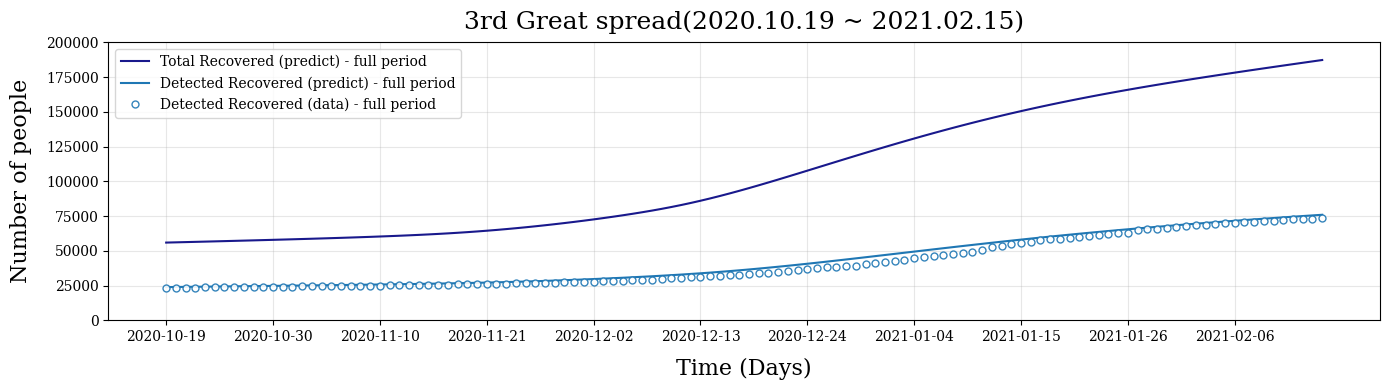

In [197]:

Calibrated_mu=Calibrate_mu(w3b)
plt.figure(figsize=(14,4))
plt.title('3rd Great spread(2020.10.19 ~ 2021.02.15)', size=18, pad=10)
n=11
plt.plot(Calibrated_mu['R'].values,'-',color='navy',alpha=0.9, label='Total Recovered (predict) - full period')
# plt.plot((korea_total_raw[273:393]-korea_total_raw[273]).values, 'o', color='orangered', mfc='white', ms=5,alpha=0.7, label='Documented Quarantined (data)')
# plt.plot((Calibrated_mu['Q_total']-Calibrated_mu['Q_total'][0]).values, '--',color='orangered',alpha=0.9, label='Documented Quarantined (predict)')
plt.plot(Calibrated_mu['R_I'].values,label='Detected Recovered (predict) - full period')
plt.plot((korea_recov[200:320]).values,'o', color='#1f77b4', mfc='white',ms=5,alpha=0.9, label='Detected Recovered (data) - full period')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.ylim([0,200000])
plt.ylabel('Number of people', fontsize=16, labelpad=10)
plt.xlabel('Time (Days)', fontsize=16, labelpad=10)
plt.xticks(np.arange(len(w3b))[::n], korea_new_raw[274:394].index[::n])
plt.grid(alpha=0.3)
plt.tight_layout()

plt.savefig('picture/CompareR(full period)', dpi=600)

> 회복인원 기준으로 하면 문제가 생길 수 있다.

> 화살표만 나타내주고, 비율 나타내주기.

>1차용

In [ ]:
def compare_hidden_infected(df):
    compare_hidden_infected=pd.DataFrame()
    compare_hidden_infected['R_I']=df['R_I']
    compare_hidden_infected['R_A']=df['R_A']
    compare_hidden_infected['R_I_new']=df.
    
    return compare_hidden_infected
    
    

## 3. E,I 중 신규 확진자 비교 (A는 당연히 논외)

In [ ]:
def cumul(array):
    a=[sum(array[:x+1]) for x in range(len(array))]
    return a


def compare_infected(df):
    '각 집단 별 생기는 정도(신규, 누적)'
    N=51780000
    compare_infected=pd.DataFrame()
    Gamma=df['beta']*df['c']*(df['fever']*df['omega_G']*df['I_G']+df['fever']*df['omega_A']*df['I_A']+df['fever']*df['omega_B']*df['I_B']*
                              +df['ep_A']*df['omega_G']*df['A_G']+df['ep_A']*df['omega_A']*df['A_A']+df['ep_A']*df['omega_B']*df['A_B']
                              +df['omega_G']*df['ep_A']*df['ep']*df['sigma']*df['E_G']+df['omega_A']*df['ep_A']*df['ep']*df['sigma']*df['E_A']+
                              df['omega_B']*df['ep_A']*df['ep']*df['sigma']*df['E_B'])/N
    E_G_new=df['theta_G']*Gamma*df['S']
    E_A_new=df['theta_A']*Gamma*df['S']
    E_B_new=df['theta_B']*Gamma*df['S']
    compare_infected['E_G_new']=E_G_new
    compare_infected['E_A_new']=E_A_new
    compare_infected['E_B_new']=E_B_new
    compare_infected['I_G_new']=(1-df['row'])*df['sigma']*df['E_G']
    compare_infected['I_A_new']=(1-df['row'])*df['sigma']*df['E_A']
    compare_infected['I_B_new']=(1-df['row'])*df['sigma']*df['E_B']
    compare_infected['A_G_new']=df['row']*df['sigma']*df['E_G']
    compare_infected['A_A_new']=df['row']*df['sigma']*df['E_A']
    compare_infected['A_B_new']=df['row']*df['sigma']*df['E_B']
    compare_infected['E']=compare_infected['E_G_new']+compare_infected['E_A_new']+compare_infected['E_B_new']
    compare_infected['I']=compare_infected['I_G_new']+compare_infected['I_A_new']+compare_infected['I_B_new']
    compare_infected['A']=compare_infected['A_G_new']+compare_infected['A_A_new']+compare_infected['A_B_new']
    tau=df['delta']*df['p']/(1-df['p'])
    compare_infected['Early confirm']=tau*(df['I_G']+df['I_A']+df['I_B'])
    compare_infected['Normal confirm']=df['delta']*(df['I_G']+df['I_A']+df['I_B'])
    
    compared_infected_cumul=compare_infected.apply(cumul)
    return compare_infected, compared_infected_cumul

### A. 조기확진과 일반확진비교 (논외)  
> 모든 윈도우, RHO에서 비슷한 비율을 가질 뿐더러 시기 상 나머지 무증상자와 비교하기 힘들기 때문  

In [ ]:
def compare_early_confirm(df):
    'Quaranted를 기준으로 조기확진(E->Q)와 일반확진(I->Q) 비교'
    tau=df['delta']*df['p']/(1-df['p'])
    compare_early_confirm=pd.DataFrame()
    early_confirm=tau*(df['I_G']+df['I_A']+df['I_B'])
    normal_confirm=df['delta']*(df['I_G']+df['I_A']+df['I_B'])
    compare_early_confirm['early_confirm']=early_confirm
    compare_early_confirm['normal_confirm']=normal_confirm+early_confirm
    return compare_early_confirm
    

In [ ]:
fig,ax=plt.subplots(figsize=(14,4))
korea_new_raw[274:394].plot(kind='bar',cmap='gray',secondary_y=False,  rot=1, alpha =0.15
                            , ax=ax, use_index=True, label='Daily new confimed cases (data)')


n=12
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])
ax.set_xlabel('Time (Days)', size=15, labelpad=10)
colors = ['#1f77b4','#ff7f0e','#d62728']
plt.plot(compare_early_confirm(w3m).iloc[:,0].values, label='Early Confirm Cases(predict)',alpha=0.8)
plt.plot(compare_early_confirm(w3m).iloc[:,1].values, label='New Cases(predict)', alpha=0.8)
plt.legend(fontsize=10)
plt.ylabel('Number of people', size=15, labelpad=10)

In [ ]:
fig,ax=plt.subplots(figsize=(14,4))
korea_new_raw[181:257].plot(kind='bar',cmap='gray',secondary_y=False,  rot=1, alpha =0.15
                            , ax=ax, use_index=True, label='Daily new confimed cases (data)')


n=7
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])
ax.set_xlabel('Time (Days)', size=15, labelpad=10)
colors = ['#1f77b4','#ff7f0e','#d62728']
plt.plot(compare_early_confirm(w2m).iloc[:,0].values, label='Early Confirm Cases(predict)',alpha=0.8)
plt.plot(compare_early_confirm(w2m).iloc[:,1].values, label='New Cases(predict)', alpha=0.8)
plt.legend(fontsize=10)
plt.ylabel('Number of people', size=15, labelpad=10)

In [ ]:
fig,ax=plt.subplots(figsize=(14,4))
korea_new_raw[274:394].plot(kind='bar',cmap='gray',secondary_y=False,  rot=1, alpha =0.15
                            , ax=ax, use_index=True, label='Daily new confimed cases (data)')


n=12
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])
ax.set_xlabel('Time (Days)', size=15, labelpad=10)
colors = ['#1f77b4','#ff7f0e','#d62728']
plt.plot(compare_early_confirm(w3b).iloc[:,0].values, label='Early Confirm Cases(predict)',alpha=0.8)
plt.plot(compare_early_confirm(w3b).iloc[:,1].values, label='New Cases(predict)', alpha=0.8)
plt.legend(fontsize=10)
plt.ylabel('Number of people', size=15, labelpad=10)

In [ ]:
fig,ax=plt.subplots(figsize=(14,4))
korea_new_raw[181:257].plot(kind='bar',cmap='gray',secondary_y=False,  rot=1, alpha =0.15
                            , ax=ax, use_index=True, label='Daily new confimed cases (data)')


n=7
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])
ax.set_xlabel('Time (Days)', size=15, labelpad=10)
colors = ['#1f77b4','#ff7f0e','#d62728']
plt.plot(compare_early_confirm(w2b).iloc[:,0].values, label='Early Confirm Cases(predict)',alpha=0.8)
plt.plot(compare_early_confirm(w2b).iloc[:,1].values, label='New Cases(predict)', alpha=0.8)
plt.legend(fontsize=10)
plt.ylabel('Number of people', size=15, labelpad=10)

In [ ]:
fig,ax=plt.subplots(figsize=(14,4))
korea_new_raw[274:394].plot(kind='bar',cmap='gray',secondary_y=False,  rot=1, alpha =0.15
                            , ax=ax, use_index=True, label='Daily new confimed cases (data)')


n=12
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])
ax.set_xlabel('Time (Days)', size=15, labelpad=10)
colors = ['#1f77b4','#ff7f0e','#d62728']
plt.plot(compare_early_confirm(w3h).iloc[:,0].values, label='Early Confirm Cases(predict)',alpha=0.8)
plt.plot(compare_early_confirm(w3h).iloc[:,1].values, label='New Cases(predict)', alpha=0.8)
plt.legend(fontsize=10)
plt.ylabel('Number of people', size=15, labelpad=10)

> 신규확진자 기준

> 누적확진자 기준

## 예외

### 격리피로함수

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(9,5))
for i in [0.995]:
    for q in [0.2, 0.4, 1, 2, 4]:
        plt.plot(create_sigmoid(200,280,0.8,0.2,i,q), label='Q : {}'.format(q))
        plt.legend()

plt.xlabel('Days')
values_x=[r'200$(=t_0)$']+[str(i) for i in range(201, 280)]+[r'280(=t_1$)']
values_y= [r'0.2(= $\overline{y_0}$ )','0.3','0.4','0.5','0.6','0.7',r'0.8(= $\overline{y_1}$ )']
plt.xticks(range(0,81,10), values_x[::10])
plt.yticks(np.linspace(0.2,0.8, 7),values_y)
plt.ylabel('Proportion of Group')
plt.grid(alpha=0.15)
plt.savefig(path+'Fatigue Function1', dpi=600)

In [ ]:
plt.figure(figsize=(9,5))
for i in [0.998, 0.990, 0.980, 0.96]:
    for q in [1]:
        plt.plot(create_sigmoid(200,280,0.8,0.2,i,q), label='H : {}'.format(i))
        plt.legend()

plt.xlabel('Days')
values_x=[r'200$(=t_0)$']+[str(i) for i in range(201, 280)]+[r'280$(=t_1$)']
values_y= [r'0.2(= $\overline{y_0}$ )','0.3','0.4','0.5','0.6','0.7',r'0.8(= $\overline{y_1}$ )']
plt.xticks(range(0,81,10), values_x[::10])
plt.yticks(np.linspace(0.2,0.8, 7),values_y)
plt.ylabel('Proportion of Group')
plt.grid(alpha=0.15)
plt.savefig(path+'Fatigue Function2', dpi=600)

## parameter 표

>2nd

In [17]:
temp1=['theta_G', 'theta_A','theta_B'] # 2020-07-18 , 2020-08-10 , 2020-08-15, 2020-10-01
temp2=['beta', 'c','sigma', 'delta', 'ep', 'omega_G', 'omega_A', 'omega_B', 'row', 'p', 'ep_A', 'ep', 'fever']

In [ ]:
w2m

In [29]:
w2m[temp1].iloc[[0,23,28,74]]

theta_G   theta_A   theta_B
2020-07-18  0.710617  0.229928  0.059455
2020-08-10  0.649380  0.151321  0.199299
2020-08-15  0.894599  0.099187  0.006214
2020-09-30  0.700338  0.269868  0.029794

In [30]:
w2m[temp2].iloc[[0, -1]]

beta          c     sigma     delta        ep   omega_G  \
2020-07-18  0.288996  13.830752  0.212516  0.263276  2.447935  0.080000   
2020-10-01  0.298983  14.116588  0.212934  0.263772  2.449395  0.030002   

             omega_A   omega_B       row         p      ep_A        ep  \
2020-07-18  0.307070  0.899982  0.599489  0.300003  0.249113  2.447935   
2020-10-01  0.249991  0.849780  0.599385  0.302093  0.253915  2.449395   

               fever  
2020-07-18  0.299998  
2020-10-01  0.298795

In [ ]:
w2b[temp1].iloc[[0,23,28,74]]

In [ ]:
w2b[temp2].iloc[[0, -1]]

In [18]:
w2h[temp1].iloc[[0,23,28,74]]

theta_G   theta_A   theta_B
2020-07-18  0.685249  0.254937  0.059814
2020-08-10  0.637565  0.165595  0.196840
2020-08-15  0.901367  0.093467  0.005166
2020-09-30  0.700416  0.270435  0.029149

In [19]:
w2h[temp2].iloc[[0, -1]]

beta          c     sigma     delta        ep   omega_G  \
2020-07-18  0.295642  12.940672  0.215149  0.258025  2.203269  0.079999   
2020-10-01  0.305639  13.203500  0.215152  0.258374  2.210722  0.030001   

             omega_A   omega_B       row         p      ep_A        ep  \
2020-07-18  0.250013  0.899948  0.786985  0.329315  0.251306  2.203269   
2020-10-01  0.220000  0.717133  0.786002  0.334304  0.256300  2.210722   

               fever  
2020-07-18  0.299991  
2020-10-01  0.282792

In [23]:
1/0.25802

3.875668552825362

In [ ]:
pd.set_option('display.max_rows', 160)

> 3차

In [ ]:
w3m

In [28]:
w3m[temp1].iloc[[0,24,29,44,49,-1]]

theta_G   theta_A   theta_B
2020-10-19  0.697076  0.271338  0.031587
2020-11-12  0.660504  0.214103  0.125392
2020-11-17  0.800047  0.163525  0.036427
2020-12-02  0.800007  0.142861  0.057131
2020-12-07  0.949715  0.039942  0.010342
2021-02-15  0.879587  0.081369  0.039044

In [27]:
w3m[temp2].iloc[[0,44,-1]]

beta          c     sigma     delta        ep   omega_G  \
2020-10-19  0.284065  13.931416  0.208537  0.252986  2.034636  0.049996   
2020-12-02  0.291322  13.851499  0.206409  0.251364  2.037257  0.045676   
2021-02-15  0.280516  13.924149  0.206878  0.252506  2.036050  0.049455   

             omega_A   omega_B       row         p      ep_A        ep  \
2020-10-19  0.487503  0.844121  0.600474  0.320322  0.253556  2.034636   
2020-12-02  0.497416  0.800010  0.600029  0.325328  0.251893  2.037257   
2021-02-15  0.440546  0.739736  0.599865  0.315496  0.250867  2.036050   

               fever  
2020-10-19  0.161486  
2020-12-02  0.100009  
2021-02-15  0.151472

In [ ]:
w3b[temp1].iloc[[0,24,29,44,49,-1]]

In [ ]:
w3b[temp2].iloc[[0,44,-1]]

In [20]:
w3h[temp1].iloc[[0,24,29,44,49,-1]]

theta_G   theta_A   theta_B
2020-10-19  0.705202  0.253696  0.041101
2020-11-12  0.670415  0.230800  0.098786
2020-11-17  0.828453  0.141216  0.030331
2020-12-02  0.806962  0.137635  0.055403
2020-12-07  0.969977  0.019821  0.010202
2021-02-15  0.871216  0.090722  0.038062

In [21]:
w3h[temp2].iloc[[0,44,-1]]

beta          c     sigma     delta        ep   omega_G  \
2020-10-19  0.264357  14.001947  0.214983  0.259866  2.227411  0.049998   
2020-12-02  0.264365  14.078515  0.215193  0.259445  2.234987  0.049910   
2021-02-15  0.260890  13.584037  0.212838  0.259278  2.229415  0.049071   

             omega_A   omega_B       row         p      ep_A        ep  \
2020-10-19  0.401193  0.799944  0.787058  0.344571  0.246812  2.227411   
2020-12-02  0.371172  0.799921  0.786543  0.351045  0.254941  2.234987   
2021-02-15  0.362903  0.651122  0.786889  0.341065  0.249671  2.229415   

               fever  
2020-10-19  0.199980  
2020-12-02  0.108020  
2021-02-15  0.170093

In [58]:
w3b

omega_G   omega_A   omega_B      beta          c   theta_G   theta_A  \
275  0.049968  0.448162  0.813548  0.299637  13.734361  0.740427  0.225215   
276  0.049968  0.448162  0.813548  0.299637  13.734361  0.733769  0.230946   
277  0.049968  0.448162  0.813548  0.299637  13.734361  0.727835  0.235697   
278  0.049968  0.448162  0.813548  0.299637  13.734361  0.722699  0.239345   
279  0.049968  0.448162  0.813548  0.299637  13.734361  0.718363  0.241837   
280  0.049968  0.448162  0.813548  0.299637  13.734361  0.714779  0.243179   
281  0.049968  0.448162  0.813548  0.299637  13.734361  0.711870  0.243427   
282  0.049968  0.448162  0.813548  0.299637  13.734361  0.709542  0.242682   
283  0.049968  0.448162  0.813548  0.299637  13.734361  0.707699  0.241084   
284  0.049968  0.448162  0.813548  0.299637  13.734361  0.706255  0.238813   
285  0.049968  0.448162  0.813548  0.299637  13.734361  0.705130  0.236075   
286  0.049968  0.448162  0.813548  0.299637  13.734361  0.704259  0.233087   
287  0.049968  0.448162  0.813548  0.299637  13.734361  0.703588  0.230054   
288  0.049968  0.448162  0.813548  0.299637  13.734361  0.703073  0.227146   
289  0.049968  0.448162  0.813548  0.299637  13.734361  0.702677  0.224488   
290  0.049968  0.448162  0.813548  0.299637  13.734361  0.702375  0.222150   
291  0.049968  0.448162  0.813548  0.299637  13.734361  0.702144  0.220161   
292  0.049968  0.448162  0.813548  0.299637  13.734361  0.701968  0.218513   
293  0.049968  0.448162  0.813548  0.299637  13.734361  0.701834  0.217176   
294  0.049968  0.448162  0.813548  0.299637  13.734361  0.701732  0.216109   
295  0.049968  0.448162  0.813548  0.299637  13.734361  0.701654  0.215270   
296  0.049968  0.448162  0.813548  0.299637  13.734361  0.701595  0.214617   
297  0.049968  0.448162  0.813548  0.299637  13.734361  0.701550  0.214113   
298  0.049968  0.448162  0.813548  0.299637  13.734361  0.701516  0.213726   
299  0.049968  0.448162  0.813548  0.299637  13.734361  0.701490  0.213430   
300  0.045975  0.448178  0.813631  0.309637  13.772287  0.727132  0.198764   
301  0.041982  0.448195  0.813715  0.309637  13.810213  0.752774  0.184098   
302  0.037989  0.448211  0.813799  0.309637  13.848140  0.778417  0.169431   
303  0.033996  0.448228  0.813882  0.309637  13.886066  0.804059  0.154765   
304  0.030002  0.448244  0.813966  0.309637  13.923993  0.829701  0.140098   
305  0.030002  0.448244  0.813966  0.309637  13.923993  0.829658  0.140063   
306  0.030002  0.448244  0.813966  0.309637  13.923993  0.829589  0.140021   
307  0.030002  0.448244  0.813966  0.309637  13.923993  0.829480  0.139977   
308  0.030002  0.448244  0.813966  0.309637  13.923993  0.829309  0.139936   
309  0.030002  0.448244  0.813966  0.309637  13.923993  0.829043  0.139914   
310  0.030002  0.448244  0.813966  0.309637  13.923993  0.828632  0.139934   
311  0.030002  0.448244  0.813966  0.309637  13.923993  0.828003  0.140039   
312  0.030002  0.448244  0.813966  0.309637  13.923993  0.827062  0.140293   
313  0.030002  0.448244  0.813966  0.309637  13.923993  0.825695  0.140779   
314  0.030002  0.448244  0.813966  0.309637  13.923993  0.823791  0.141586   
315  0.030002  0.448244  0.813966  0.309637  13.923993  0.821292  0.142769   
316  0.030002  0.448244  0.813966  0.309637  13.923993  0.818255  0.144297   
317  0.030002  0.448244  0.813966  0.309637  13.923993  0.814891  0.146017   
318  0.030002  0.448244  0.813966  0.309637  13.923993  0.811527  0.147686   
319  0.030002  0.448244  0.813966  0.309637  13.923993  0.808489  0.149072   
320  0.032001  0.424544  0.805557  0.313679  13.927751  0.840645  0.123394   
321  0.034000  0.400844  0.797149  0.313679  13.931509  0.872801  0.097716   
322  0.035999  0.377144  0.788740  0.313679  13.935268  0.904958  0.072037   
323  0.037998  0.353444  0.780332  0.313679  13.939026  0.937114  0.046359   
324  0.039997  0.329744  0.771923  0.313679  13.942784  0.969270  0.020681   
325  0.039997  0.329744  0.7

In [59]:
w3b['best_parameter'].iloc[45]

array([3.99972283e-02, 3.29744389e-01, 7.71923147e-01, 3.13678842e-01,
       1.39427841e+01, 9.69780870e-01, 8.93173466e-01, 9.90632742e-01,
       1.40890837e+00, 9.99968436e-03, 3.03809627e-02, 9.94995650e-01,
       2.08827342e+00, 4.53745434e+00, 3.38466684e+00, 7.00710235e-01,
       2.45916442e-01, 2.13764367e+00, 3.77839615e-01, 2.35305795e-01])

In [60]:
w3b_temp=w3b.copy()
w3b_temp.index=np.arange(275,395)

In [61]:
pd.set_option('display.max_rows', 150, 'display.max_columns', 60)

In [62]:
w3b_from320=w3b_temp.iloc[:46]

In [63]:
second_output=w3b_from320['output'].iloc[-1]
second_full_array=w3b_from320['full_array'].iloc[-1]

In [64]:
second_full_dict=w3b_from320

In [65]:
second_theta_prev=[second_full_dict['theta_G'].iloc[-2],second_full_dict['theta_B'].iloc[-2]]

In [66]:
second_full_dict

omega_G   omega_A   omega_B      beta          c   theta_G   theta_A  \
275  0.049968  0.448162  0.813548  0.299637  13.734361  0.740427  0.225215   
276  0.049968  0.448162  0.813548  0.299637  13.734361  0.733769  0.230946   
277  0.049968  0.448162  0.813548  0.299637  13.734361  0.727835  0.235697   
278  0.049968  0.448162  0.813548  0.299637  13.734361  0.722699  0.239345   
279  0.049968  0.448162  0.813548  0.299637  13.734361  0.718363  0.241837   
280  0.049968  0.448162  0.813548  0.299637  13.734361  0.714779  0.243179   
281  0.049968  0.448162  0.813548  0.299637  13.734361  0.711870  0.243427   
282  0.049968  0.448162  0.813548  0.299637  13.734361  0.709542  0.242682   
283  0.049968  0.448162  0.813548  0.299637  13.734361  0.707699  0.241084   
284  0.049968  0.448162  0.813548  0.299637  13.734361  0.706255  0.238813   
285  0.049968  0.448162  0.813548  0.299637  13.734361  0.705130  0.236075   
286  0.049968  0.448162  0.813548  0.299637  13.734361  0.704259  0.233087   
287  0.049968  0.448162  0.813548  0.299637  13.734361  0.703588  0.230054   
288  0.049968  0.448162  0.813548  0.299637  13.734361  0.703073  0.227146   
289  0.049968  0.448162  0.813548  0.299637  13.734361  0.702677  0.224488   
290  0.049968  0.448162  0.813548  0.299637  13.734361  0.702375  0.222150   
291  0.049968  0.448162  0.813548  0.299637  13.734361  0.702144  0.220161   
292  0.049968  0.448162  0.813548  0.299637  13.734361  0.701968  0.218513   
293  0.049968  0.448162  0.813548  0.299637  13.734361  0.701834  0.217176   
294  0.049968  0.448162  0.813548  0.299637  13.734361  0.701732  0.216109   
295  0.049968  0.448162  0.813548  0.299637  13.734361  0.701654  0.215270   
296  0.049968  0.448162  0.813548  0.299637  13.734361  0.701595  0.214617   
297  0.049968  0.448162  0.813548  0.299637  13.734361  0.701550  0.214113   
298  0.049968  0.448162  0.813548  0.299637  13.734361  0.701516  0.213726   
299  0.049968  0.448162  0.813548  0.299637  13.734361  0.701490  0.213430   
300  0.045975  0.448178  0.813631  0.309637  13.772287  0.727132  0.198764   
301  0.041982  0.448195  0.813715  0.309637  13.810213  0.752774  0.184098   
302  0.037989  0.448211  0.813799  0.309637  13.848140  0.778417  0.169431   
303  0.033996  0.448228  0.813882  0.309637  13.886066  0.804059  0.154765   
304  0.030002  0.448244  0.813966  0.309637  13.923993  0.829701  0.140098   
305  0.030002  0.448244  0.813966  0.309637  13.923993  0.829658  0.140063   
306  0.030002  0.448244  0.813966  0.309637  13.923993  0.829589  0.140021   
307  0.030002  0.448244  0.813966  0.309637  13.923993  0.829480  0.139977   
308  0.030002  0.448244  0.813966  0.309637  13.923993  0.829309  0.139936   
309  0.030002  0.448244  0.813966  0.309637  13.923993  0.829043  0.139914   
310  0.030002  0.448244  0.813966  0.309637  13.923993  0.828632  0.139934   
311  0.030002  0.448244  0.813966  0.309637  13.923993  0.828003  0.140039   
312  0.030002  0.448244  0.813966  0.309637  13.923993  0.827062  0.140293   
313  0.030002  0.448244  0.813966  0.309637  13.923993  0.825695  0.140779   
314  0.030002  0.448244  0.813966  0.309637  13.923993  0.823791  0.141586   
315  0.030002  0.448244  0.813966  0.309637  13.923993  0.821292  0.142769   
316  0.030002  0.448244  0.813966  0.309637  13.923993  0.818255  0.144297   
317  0.030002  0.448244  0.813966  0.309637  13.923993  0.814891  0.146017   
318  0.030002  0.448244  0.813966  0.309637  13.923993  0.811527  0.147686   
319  0.030002  0.448244  0.813966  0.309637  13.923993  0.808489  0.149072   
320  0.032001  0.424544  0.805557  0.313679  13.927751  0.840645  0.123394   

      theta_B     sigma     delta       row      ep_A        ep         p  \
275  0.034357  0.220717  0.295570  0.699298  0.242331  2.130193  0.375429   
276  0.035286  0.220717  0.295570  0.699298  0.242331  2.130193  0.375429   
277  0.036468  0.220717  0.295570  0.699298  0.242331  2.130193  0.375429   
278  0.037956  0.220717  0.2955

In [67]:
sbp=second_full_dict['best_parameter'].iloc[-1]
sbp

array([3.99972283e-02, 3.29744389e-01, 7.71923147e-01, 3.13678842e-01,
       1.39427841e+01, 9.69780870e-01, 8.93173466e-01, 9.90632742e-01,
       1.40890837e+00, 9.99968436e-03, 3.03809627e-02, 9.94995650e-01,
       2.08827342e+00, 4.53745434e+00, 3.38466684e+00, 7.00710235e-01,
       2.45916442e-01, 2.13764367e+00, 3.77839615e-01, 2.35305795e-01])

In [68]:
# 확인완료

# prev_parameter=np.append(second_full_dict.iloc[-2, :5], second_full_dict.iloc[-2, 13:15])
# theta_G_prev,theta_B_prev=second_theta_prev
# delay=4

# forgridsearch_parameter(320, 394, *np.append(sbp[:5],sbp[-2:]))
# globalpara(sbp[-7],sbp[-6],sbp[-5],sbp[-4],sbp[-3])
# theta_after_scaling(320,394,sbp[5],sbp[6],sbp[7],sbp[8],sbp[9],sbp[10], sbp[11], sbp[12], delay=4)

# t1,t2=seir_simulation(320, 394, second_output)

>우선, parameter를 약간 조정한다면?

우선고정

In [69]:
prev_parameter=np.append(second_full_dict.iloc[-2, :5], second_full_dict.iloc[-2, 13:15])
theta_G_prev,theta_B_prev=second_theta_prev
delay=4

> 비교 : w3b['Q_new'][45:]

In [70]:
sbp

array([3.99972283e-02, 3.29744389e-01, 7.71923147e-01, 3.13678842e-01,
       1.39427841e+01, 9.69780870e-01, 8.93173466e-01, 9.90632742e-01,
       1.40890837e+00, 9.99968436e-03, 3.03809627e-02, 9.94995650e-01,
       2.08827342e+00, 4.53745434e+00, 3.38466684e+00, 7.00710235e-01,
       2.45916442e-01, 2.13764367e+00, 3.77839615e-01, 2.35305795e-01])

>1. theta_G의 하한을 올릴경우.(기존 0.893~ 0.93까지 차근차근히)

In [71]:
print(sbp[6], sbp[10])

0.893173465851778 0.030380962744488673


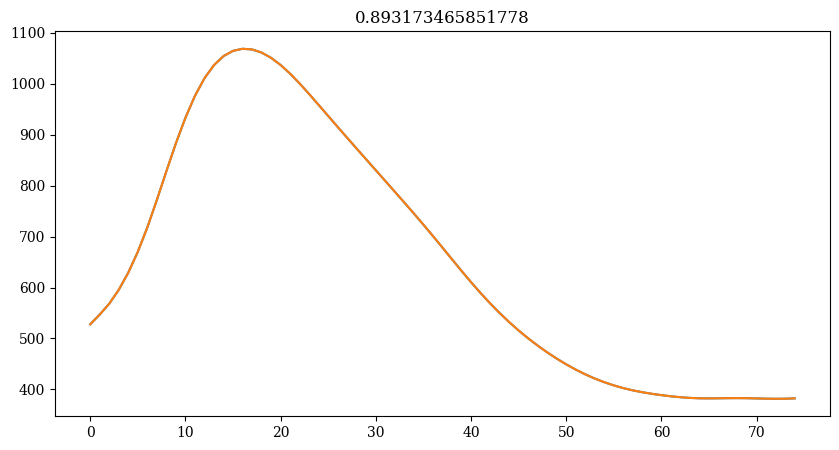

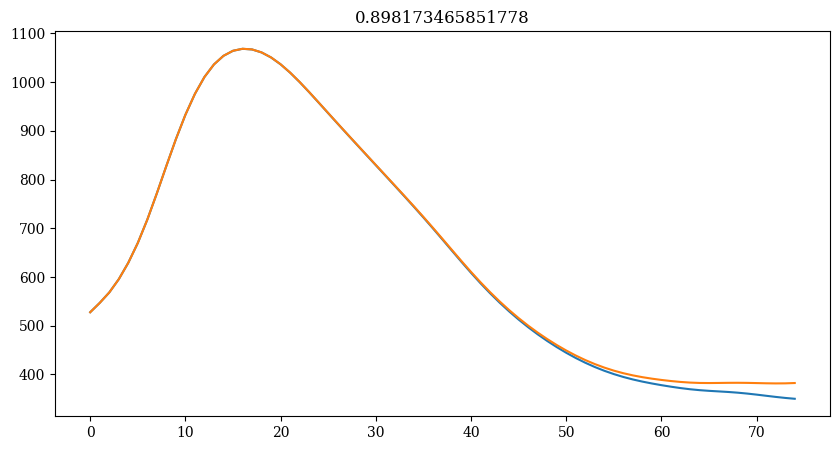

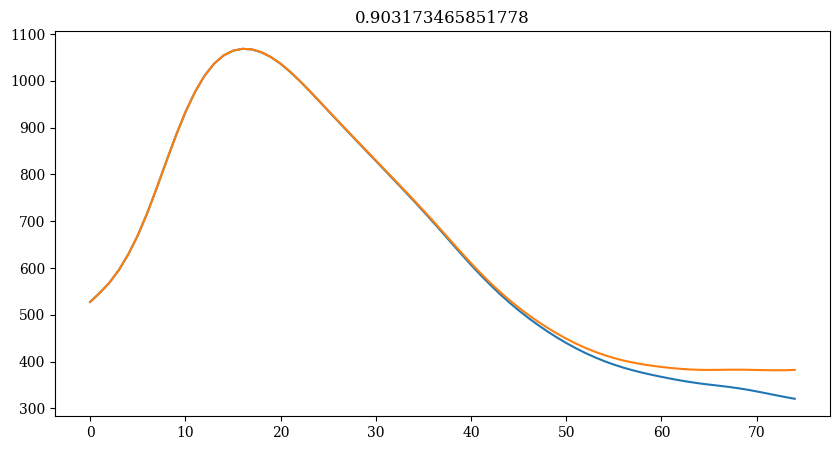

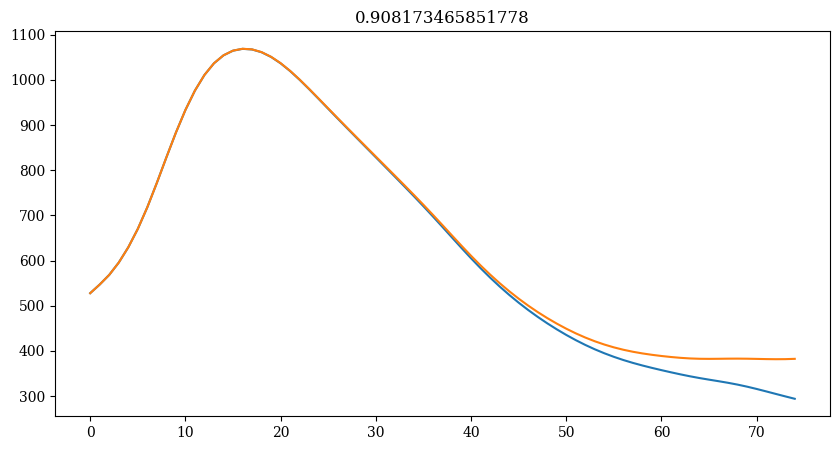

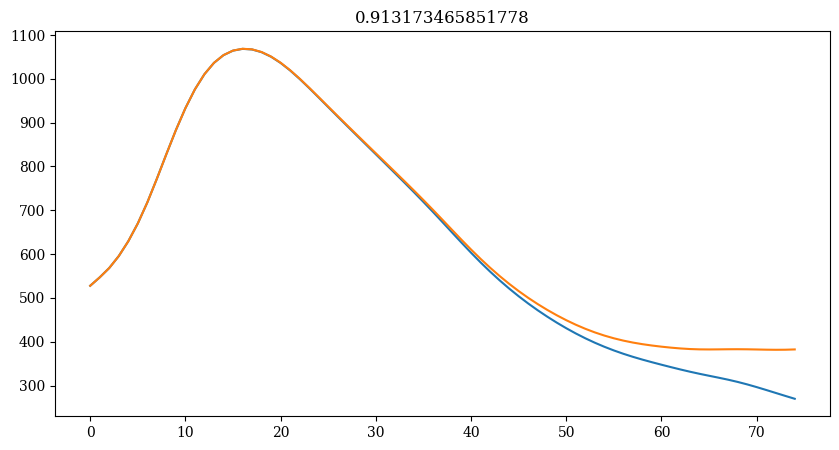

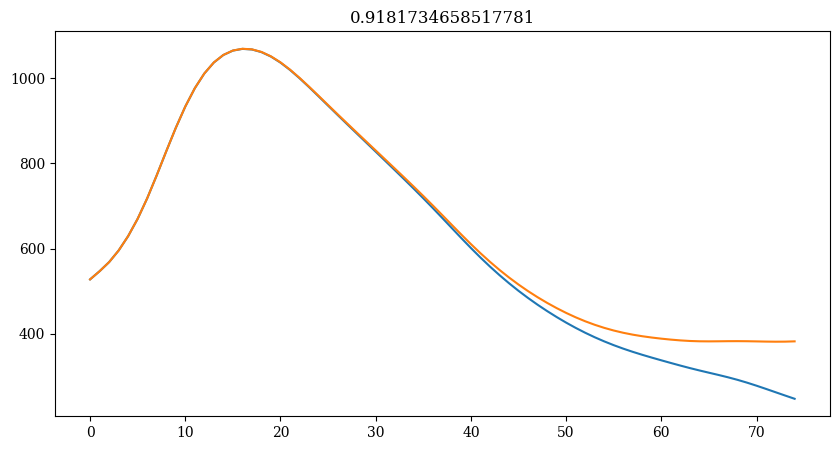

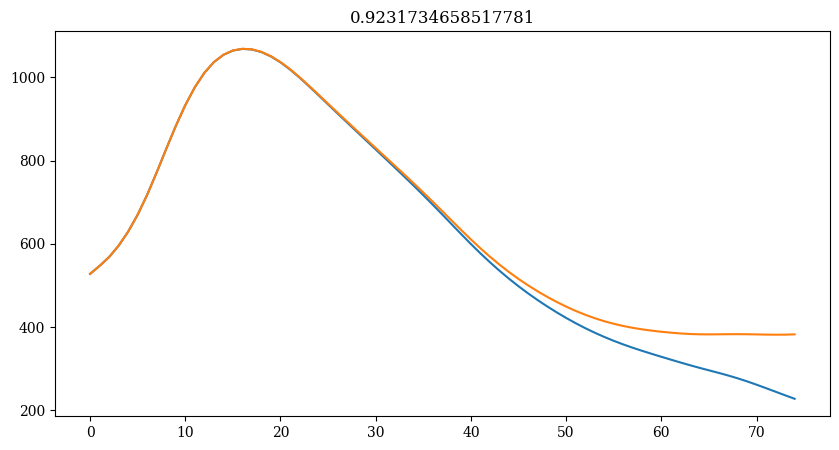

In [72]:
for i in [0,0.005, 0.01, 0.015, 0.02, 0.025, 0.03]:
    forgridsearch_parameter(320, 394, *np.append(sbp[:5],sbp[-2:]))
    globalpara(sbp[-7],sbp[-6],sbp[-5],sbp[-4],sbp[-3])
    theta_after_scaling(320,394,sbp[5],sbp[6]+i,sbp[7],sbp[8],sbp[9],sbp[10], sbp[11], sbp[12], delay=4)

    t1,t2=seir_simulation(320, 394, second_output)
    plt.figure(figsize=(10,5))
    plt.title(f'{sbp[6]+i}')
    plt.plot(t2[0])
    plt.plot(w3b['Q_new'].iloc[45:].reset_index(drop=True))

>진짜 최적값이였네..

> 이 정도면, 우선 그대로 써도 될 듯 하다.(--> no,조금 높혀서 평형점을 낮추는 게 나을듯 하다.

### 1. 격리 수준에 따른 변화

> 1. forgridsearch_parameter(시작, 끝, og,ga,gb,beta,c,p,fever)  
2. global para(sigma, delta, row, ep_A ,ep  
3. theta_after_scaling (시작, 끝, g,g,g,b,b,b,delay)

In [73]:
sbp_original=sbp.copy()

## 1.a 마지막 fitting 이후의 parameter는 상수로 고정할 경우(30일)

In [ ]:
last_parameter=third_full_dict.iloc[-1]

omega_G[394:424]=last_parameter[0]
omega_A[394:424]=last_parameter[1]
omega_B[394:424]=last_parameter[2]
beta[394:424]=last_parameter[3]
c[394:424]=last_parameter[4]
theta_G[394:424]=last_parameter[5]
theta_A[394:424]=last_parameter[6]
theta_B[394:424]=last_parameter[7]
globalpara(1/last_parameter[8],1/last_parameter[9],last_parameter[10],last_parameter[11],last_parameter[12])
p[394:424]=last_parameter[13]
fever[394:424]=last_parameter[14]


> 문제 : 실질적인 평형은 이미 385~387에 일어나고 있었다.(lamda때문에 못 봤던 것)

In [75]:
korea_new_temp=korea_new_raw.copy()

korea_new_temp=korea_new_temp.values

korea_new_temp=np.append(korea_new_temp, [457,621,621,561,448,416,332,356,440,396,390,415])

Window 별 첫 실행 이후
Window 별 첫 실행 이후
Window 별 첫 실행 이후
해외 유입 제외 . 375    378.328238
376    372.560085
377    367.542483
378    363.220500
379    359.539782
380    356.447553
381    353.893442
382    351.830124
383    350.213785
384    349.004435
385    348.166088
386    347.666823
387    347.478763
388    347.577984
389    347.944373
390    348.561464
391    349.416257
392    350.499033
393    351.803179
394    353.325028
dtype: float64


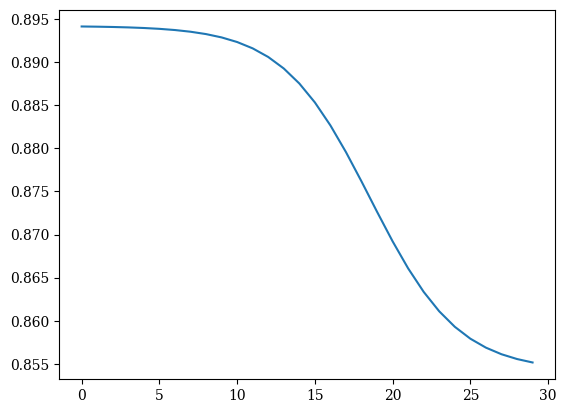

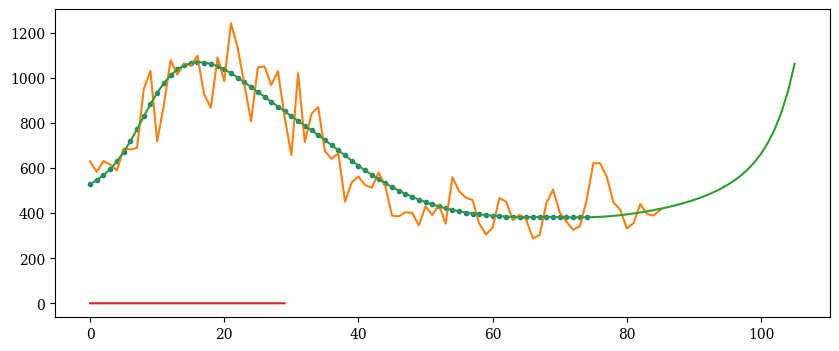

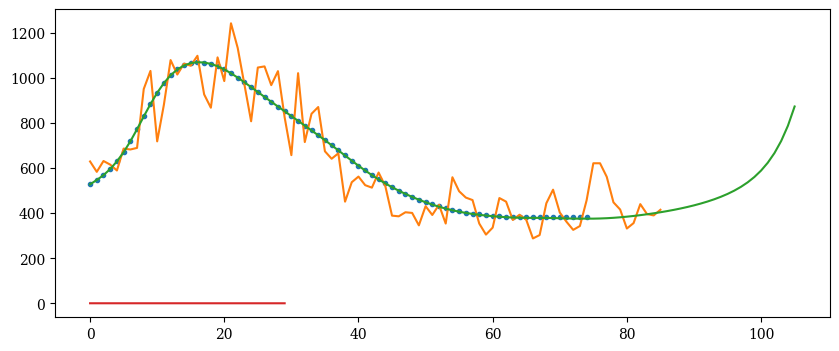

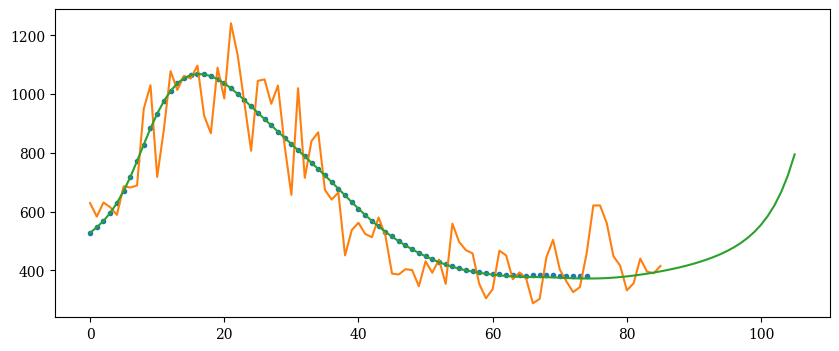

In [76]:
for i in [0,0.001, 0.0015]:
    
    theta_G_prev, theta_B_prev=second_theta_prev
    forgridsearch_parameter(320, 394, *np.append(sbp[:5],sbp[-2:]))
    globalpara(sbp[-7],sbp[-6],sbp[-5],sbp[-4],sbp[-3])
    theta_after_scaling(320,394,sbp[5],sbp[6]+i,sbp[7],sbp[8],sbp[9],sbp[10], sbp[11], sbp[12], delay=4)
    sbp_temp=sbp.copy()
    sbp_temp[6]=sbp[6]+i # 약간 상한을 높혔을 경우 (A가 줄어듬)
    third_output, third_full_array, third_full_dict, third_theta_prev=sa_pipe(320,394,320,394,sbp_temp,second_output,
                                                                              second_full_array, second_full_dict)
    
    last_parameter=third_full_dict.iloc[-1]
    omega_G[394:424]=last_parameter[0]
    omega_A[394:424]=last_parameter[1]
    omega_B[394:424]=last_parameter[2]
    beta[394:424]=last_parameter[3]
    c[394:424]=last_parameter[4]
    theta_G_prev, theta_B_prev=third_theta_prev
    theta_after_scaling(394,424,last_parameter[5], last_parameter[5]-0.04, 0.995, 5, last_parameter[7], last_parameter[7]+0.02,0.995, 
                       8, delay=0)
#     theta_G[394:424]=last_parameter[5]
#     theta_A[394:424]=last_parameter[6]
#     theta_B[394:424]=last_parameter[7]
    
    plt.plot(theta_G[394:424])
    globalpara(1/last_parameter[8],1/last_parameter[9],last_parameter[10],last_parameter[11],last_parameter[12])
    p[394:424]=last_parameter[13]
    fever[394:424]=last_parameter[14]
    
    plt.figure(figsize=(10,4))
    plt.plot(w3b['Q_new'].iloc[45:].reset_index(drop=True), 'o', ms=3)
    plt.plot(korea_new_temp[320:406])
    t0,t1=seir_simulation(394,424,opt=third_output)
    plt.plot(np.append(third_full_dict['Q_new'].iloc[45:].values,t1[0]))
    

print('해외 유입 제외 .'  ,(third_full_dict['Q_new']-third_full_dict['abroad']).tail(20))    

    
    

> 위 기준 95~100일정도에 아마 시행 발표 + 시행할 것. (600근처)

> 차이가 꽤나 많이 난다.

#### a. 2.5단계 시행 시 (아마 지금 상태라면 2단계 이하로 갈 일은 없을 것)

In [77]:
third_full_dict

omega_G   omega_A   omega_B      beta          c   theta_G   theta_A  \
275  0.049968  0.448162  0.813548  0.299637  13.734361  0.740427  0.225215   
276  0.049968  0.448162  0.813548  0.299637  13.734361  0.733769  0.230946   
277  0.049968  0.448162  0.813548  0.299637  13.734361  0.727835  0.235697   
278  0.049968  0.448162  0.813548  0.299637  13.734361  0.722699  0.239345   
279  0.049968  0.448162  0.813548  0.299637  13.734361  0.718363  0.241837   
280  0.049968  0.448162  0.813548  0.299637  13.734361  0.714779  0.243179   
281  0.049968  0.448162  0.813548  0.299637  13.734361  0.711870  0.243427   
282  0.049968  0.448162  0.813548  0.299637  13.734361  0.709542  0.242682   
283  0.049968  0.448162  0.813548  0.299637  13.734361  0.707699  0.241084   
284  0.049968  0.448162  0.813548  0.299637  13.734361  0.706255  0.238813   
285  0.049968  0.448162  0.813548  0.299637  13.734361  0.705130  0.236075   
286  0.049968  0.448162  0.813548  0.299637  13.734361  0.704259  0.233087   
287  0.049968  0.448162  0.813548  0.299637  13.734361  0.703588  0.230054   
288  0.049968  0.448162  0.813548  0.299637  13.734361  0.703073  0.227146   
289  0.049968  0.448162  0.813548  0.299637  13.734361  0.702677  0.224488   
290  0.049968  0.448162  0.813548  0.299637  13.734361  0.702375  0.222150   
291  0.049968  0.448162  0.813548  0.299637  13.734361  0.702144  0.220161   
292  0.049968  0.448162  0.813548  0.299637  13.734361  0.701968  0.218513   
293  0.049968  0.448162  0.813548  0.299637  13.734361  0.701834  0.217176   
294  0.049968  0.448162  0.813548  0.299637  13.734361  0.701732  0.216109   
295  0.049968  0.448162  0.813548  0.299637  13.734361  0.701654  0.215270   
296  0.049968  0.448162  0.813548  0.299637  13.734361  0.701595  0.214617   
297  0.049968  0.448162  0.813548  0.299637  13.734361  0.701550  0.214113   
298  0.049968  0.448162  0.813548  0.299637  13.734361  0.701516  0.213726   
299  0.049968  0.448162  0.813548  0.299637  13.734361  0.701490  0.213430   
300  0.045975  0.448178  0.813631  0.309637  13.772287  0.727132  0.198764   
301  0.041982  0.448195  0.813715  0.309637  13.810213  0.752774  0.184098   
302  0.037989  0.448211  0.813799  0.309637  13.848140  0.778417  0.169431   
303  0.033996  0.448228  0.813882  0.309637  13.886066  0.804059  0.154765   
304  0.030002  0.448244  0.813966  0.309637  13.923993  0.829701  0.140098   
305  0.030002  0.448244  0.813966  0.309637  13.923993  0.829658  0.140063   
306  0.030002  0.448244  0.813966  0.309637  13.923993  0.829589  0.140021   
307  0.030002  0.448244  0.813966  0.309637  13.923993  0.829480  0.139977   
308  0.030002  0.448244  0.813966  0.309637  13.923993  0.829309  0.139936   
309  0.030002  0.448244  0.813966  0.309637  13.923993  0.829043  0.139914   
310  0.030002  0.448244  0.813966  0.309637  13.923993  0.828632  0.139934   
311  0.030002  0.448244  0.813966  0.309637  13.923993  0.828003  0.140039   
312  0.030002  0.448244  0.813966  0.309637  13.923993  0.827062  0.140293   
313  0.030002  0.448244  0.813966  0.309637  13.923993  0.825695  0.140779   
314  0.030002  0.448244  0.813966  0.309637  13.923993  0.823791  0.141586   
315  0.030002  0.448244  0.813966  0.309637  13.923993  0.821292  0.142769   
316  0.030002  0.448244  0.813966  0.309637  13.923993  0.818255  0.144297   
317  0.030002  0.448244  0.813966  0.309637  13.923993  0.814891  0.146017   
318  0.030002  0.448244  0.813966  0.309637  13.923993  0.811527  0.147686   
319  0.030002  0.448244  0.813966  0.309637  13.923993  0.808489  0.149072   
320  0.032001  0.424544  0.805557  0.313679  13.927751  0.840647  0.123392   
321  0.034000  0.400844  0.797149  0.313679  13.931509  0.872805  0.097712   
322  0.035999  0.377144  0.788740  0.313679  13.935268  0.904964  0.072031   
323  0.037998  0.353444  0.780332  0.313679  13.939026  0.937122  0.046351   
324  0.039997  0.329744  0.771923  0.313679  13.942784  0.969280  0.020671   
325  0.039997  0.329744  0.7

In [78]:
theta_G_prev, theta_B_prev=second_theta_prev
# forgridsearch_parameter(320, 394, *np.append(sbp[:5],sbp[-2:]))
# globalpara(sbp[-7],sbp[-6],sbp[-5],sbp[-4],sbp[-3])
# theta_after_scaling(320,394,sbp[5],sbp[6]+i,sbp[7],sbp[8],sbp[9],sbp[10], sbp[11], sbp[12], delay=4)
sbp_temp=sbp.copy() #얘는 그냥 w3b에서 나온 애임.
sbp_temp[6]=sbp[6]+0.001# 약간 상한을 높혔을 경우 (A가 줄어듬)
third_output, third_full_array, third_full_dict, third_theta_prev=sa_pipe(320,394,320,394,sbp_temp,second_output,
                                                                          second_full_array, second_full_dict)
# 어차피 여기서 다시 처리되긴 한다.

last_parameter=third_full_dict.iloc[-1]

Window 별 첫 실행 이후


In [79]:
hyper_output=[]
hyper_full_array=[]
hyper_full_dict=[]
hyper_theta_prev=[]

In [246]:
w3b

omega_G   omega_A   omega_B      beta          c   theta_G  \
2020-10-19  0.049968  0.448162  0.813548  0.299637  13.734361  0.740427   
2020-10-20  0.049968  0.448162  0.813548  0.299637  13.734361  0.733769   
2020-10-21  0.049968  0.448162  0.813548  0.299637  13.734361  0.727835   
2020-10-22  0.049968  0.448162  0.813548  0.299637  13.734361  0.722699   
2020-10-23  0.049968  0.448162  0.813548  0.299637  13.734361  0.718363   
2020-10-24  0.049968  0.448162  0.813548  0.299637  13.734361  0.714779   
2020-10-25  0.049968  0.448162  0.813548  0.299637  13.734361  0.711870   
2020-10-26  0.049968  0.448162  0.813548  0.299637  13.734361  0.709542   
2020-10-27  0.049968  0.448162  0.813548  0.299637  13.734361  0.707699   
2020-10-28  0.049968  0.448162  0.813548  0.299637  13.734361  0.706255   
2020-10-29  0.049968  0.448162  0.813548  0.299637  13.734361  0.705130   
2020-10-30  0.049968  0.448162  0.813548  0.299637  13.734361  0.704259   
2020-10-31  0.049968  0.448162  0.813548  0.299637  13.734361  0.703588   
2020-11-01  0.049968  0.448162  0.813548  0.299637  13.734361  0.703073   
2020-11-02  0.049968  0.448162  0.813548  0.299637  13.734361  0.702677   
2020-11-03  0.049968  0.448162  0.813548  0.299637  13.734361  0.702375   
2020-11-04  0.049968  0.448162  0.813548  0.299637  13.734361  0.702144   
2020-11-05  0.049968  0.448162  0.813548  0.299637  13.734361  0.701968   
2020-11-06  0.049968  0.448162  0.813548  0.299637  13.734361  0.701834   
2020-11-07  0.049968  0.448162  0.813548  0.299637  13.734361  0.701732   
2020-11-08  0.049968  0.448162  0.813548  0.299637  13.734361  0.701654   
2020-11-09  0.049968  0.448162  0.813548  0.299637  13.734361  0.701595   
2020-11-10  0.049968  0.448162  0.813548  0.299637  13.734361  0.701550   
2020-11-11  0.049968  0.448162  0.813548  0.299637  13.734361  0.701516   
2020-11-12  0.049968  0.448162  0.813548  0.299637  13.734361  0.701490   
2020-11-13  0.045975  0.448178  0.813631  0.309637  13.772287  0.727132   
2020-11-14  0.041982  0.448195  0.813715  0.309637  13.810213  0.752774   
2020-11-15  0.037989  0.448211  0.813799  0.309637  13.848140  0.778417   
2020-11-16  0.033996  0.448228  0.813882  0.309637  13.886066  0.804059   
2020-11-17  0.030002  0.448244  0.813966  0.309637  13.923993  0.829701   
2020-11-18  0.030002  0.448244  0.813966  0.309637  13.923993  0.829658   
2020-11-19  0.030002  0.448244  0.813966  0.309637  13.923993  0.829589   
2020-11-20  0.030002  0.448244  0.813966  0.309637  13.923993  0.829480   
2020-11-21  0.030002  0.448244  0.813966  0.309637  13.923993  0.829309   
2020-11-22  0.030002  0.448244  0.813966  0.309637  13.923993  0.829043   
2020-11-23  0.030002  0.448244  0.813966  0.309637  13.923993  0.828632   
2020-11-24  0.030002  0.448244  0.813966  0.309637  13.923993  0.828003   
2020-11-25  0.030002  0.448244  0.813966  0.309637  13.923993  0.827062   
2020-11-26  0.030002  0.448244  0.813966  0.309637  13.923993  0.825695   
2020-11-27  0.030002  0.448244  0.813966  0.309637  13.923993  0.823791   
2020-11-28  0.030002  0.448244  0.813966  0.309637  13.923993  0.821292   
2020-11-29  0.030002  0.448244  0.813966  0.309637  13.923993  0.818255   
2020-11-30  0.030002  0.448244  0.813966  0.309637  13.923993  0.814891   
2020-12-01  0.030002  0.448244  0.813966  0.309637  13.923993  0.811527   
2020-12-02  0.030002  0.448244  0.813966  0.309637  13.923993  0.808489   
2020-12-03  0.032001  0.424544  0.805557  0.313679  13.927751  0.840645   
2020-12-04  0.034000  0.400844  0.797149  0.313679  13.931509  0.872801   
2020-12-05  0.035999  0.377144  0.788740  0.313679  13.935268  0.904958   
2020-12-06  0.037998  0.353444  0.780332  0.313679  13.939026  0.937114   
2020-12-07  0.039997  0.329744  0.771923  0.313679  13.942784  0.969270   
2020-12-08  0.039997  0.329744  0.771923  0.313679  13.942784  0.969198   
2020-12-09  0.039997  0.329744  0.771923  0.313679  13.942784  0.969116   
2020-12-10  0.039997  0.329744  0.7719

Window 별 첫 실행 이후
Window 별 첫 실행 이후
Window 별 첫 실행 이후
Window 별 첫 실행 이후
Window 별 첫 실행 이후
Window 별 첫 실행 이후


<ipython-input-80-1eb5d2cc498e>:25: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Window 별 첫 실행 이후
Window 별 첫 실행 이후
Window 별 첫 실행 이후
Window 별 첫 실행 이후
Window 별 첫 실행 이후


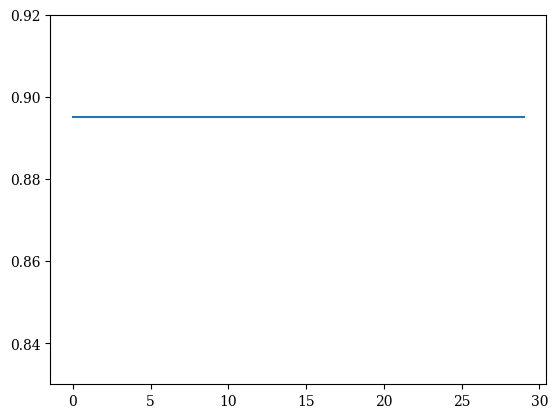

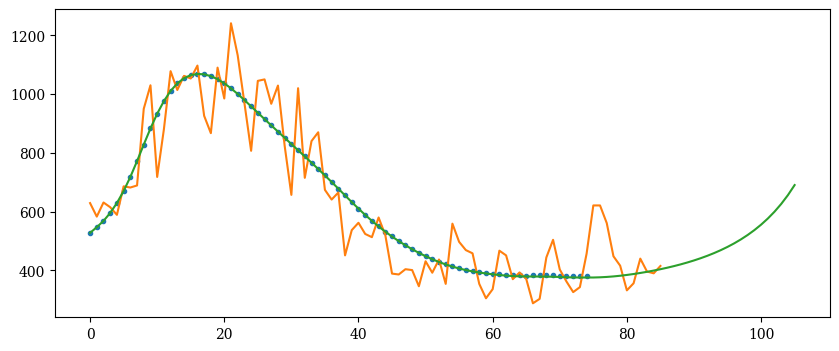

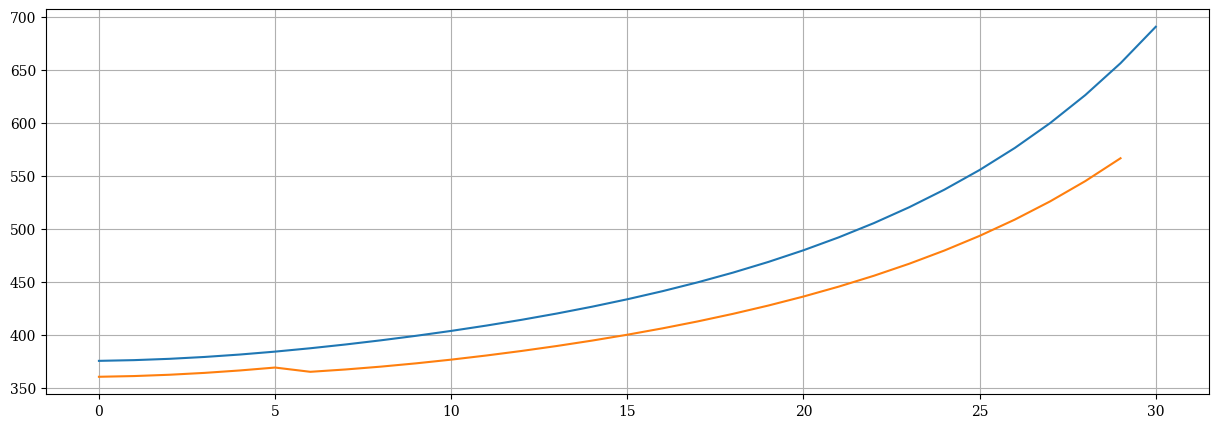

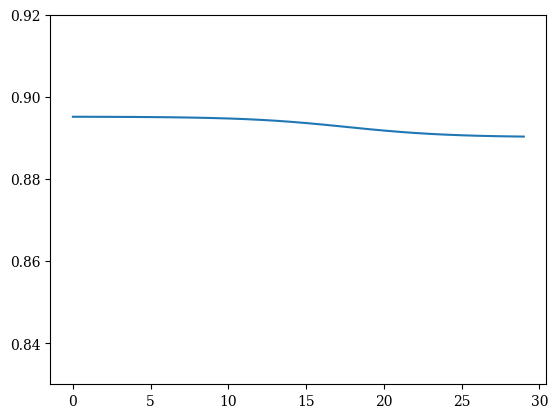

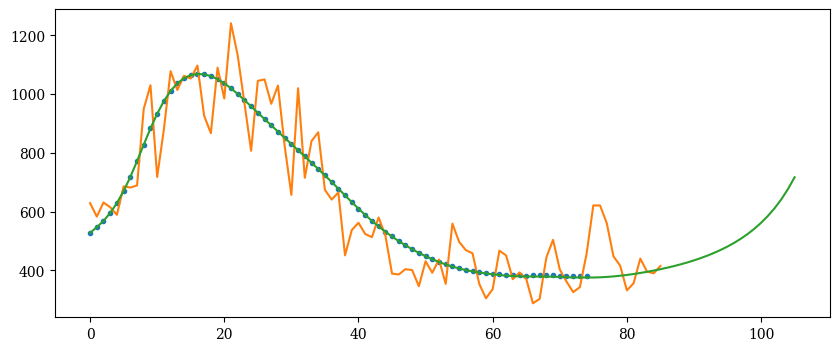

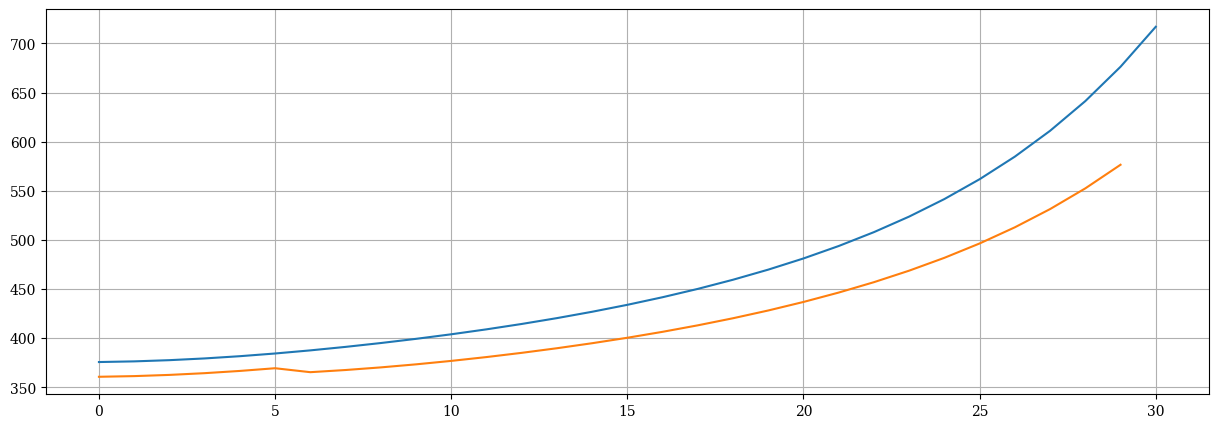

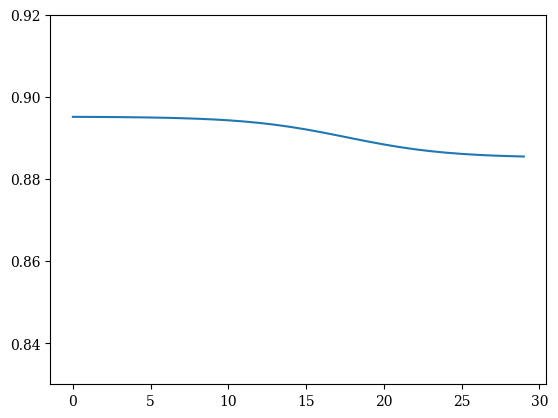

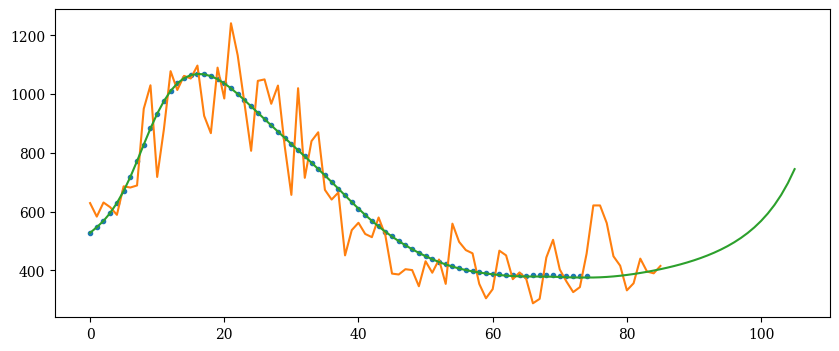

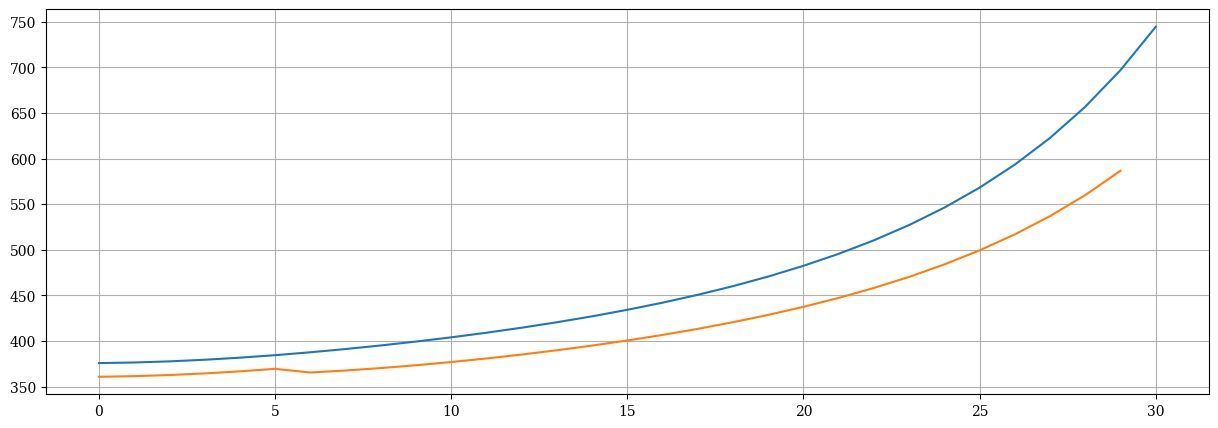

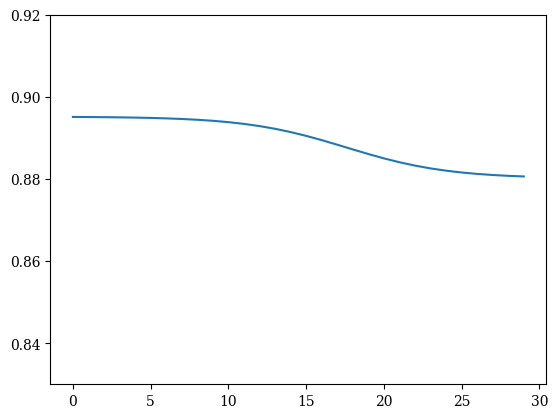

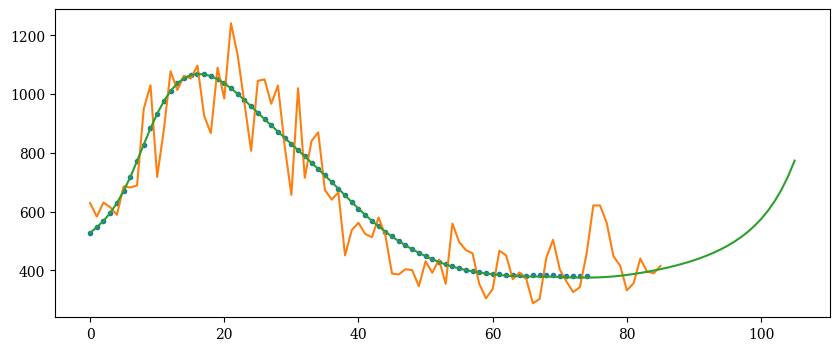

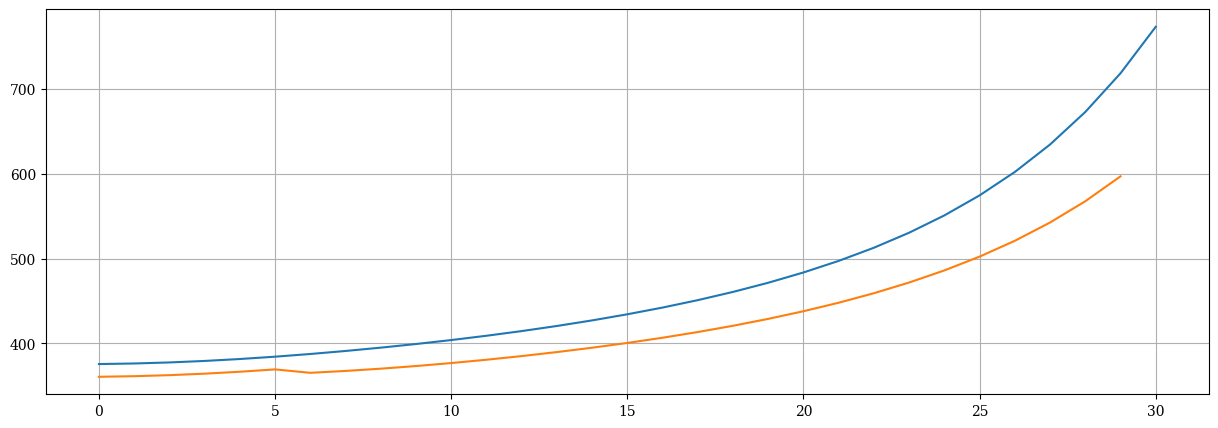

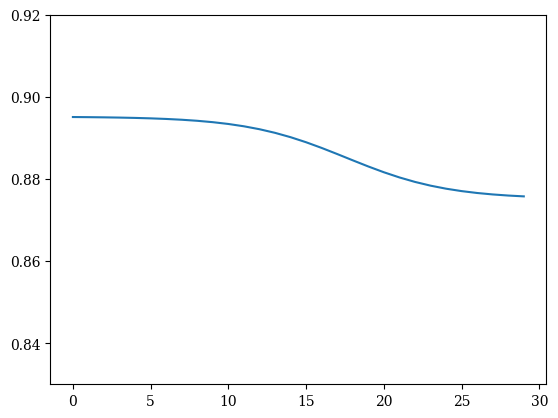

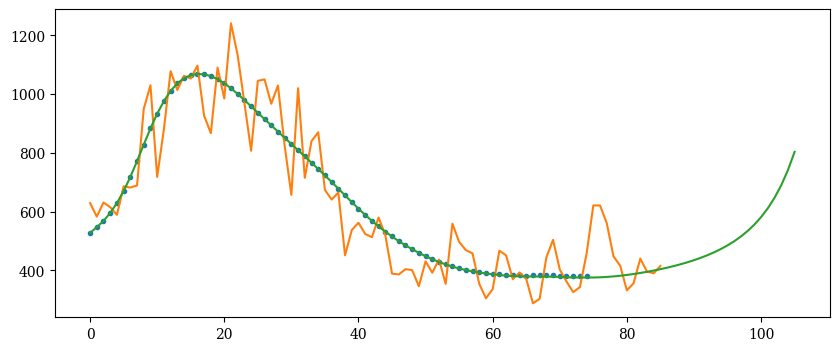

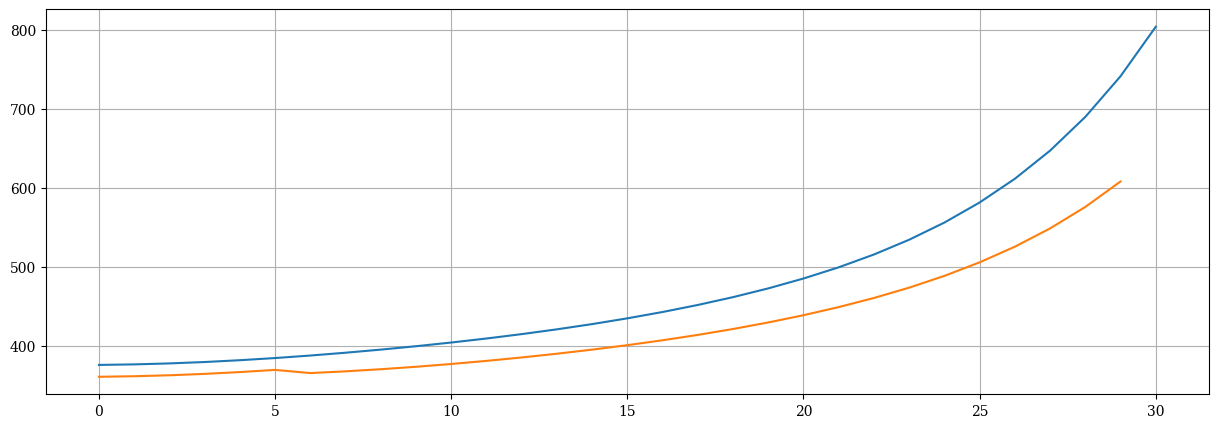

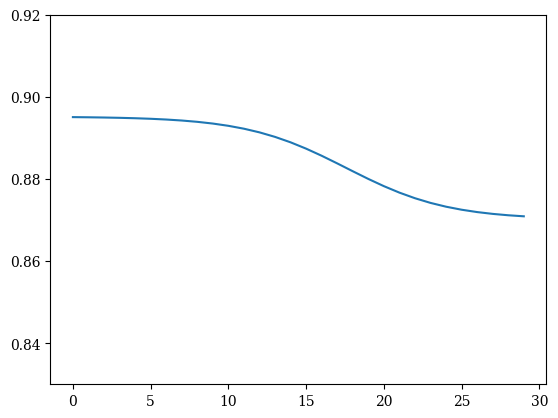

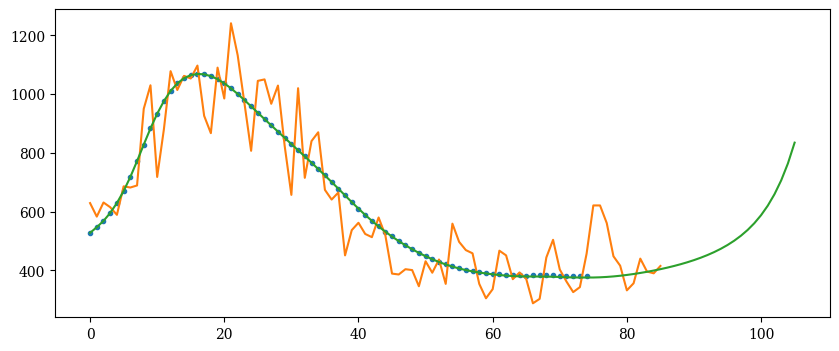

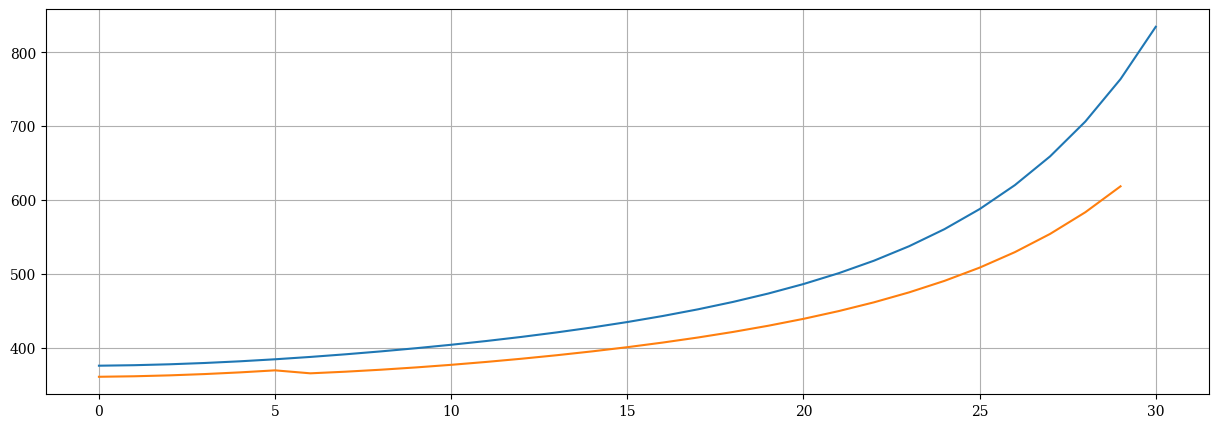

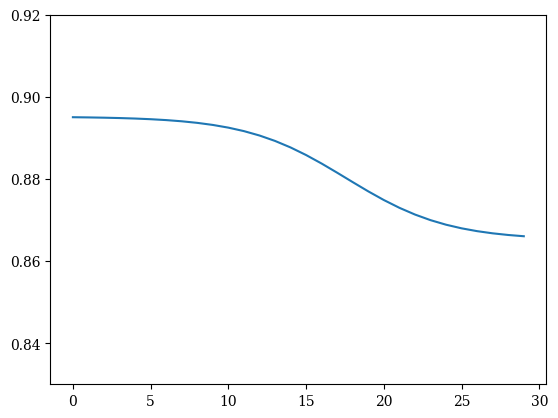

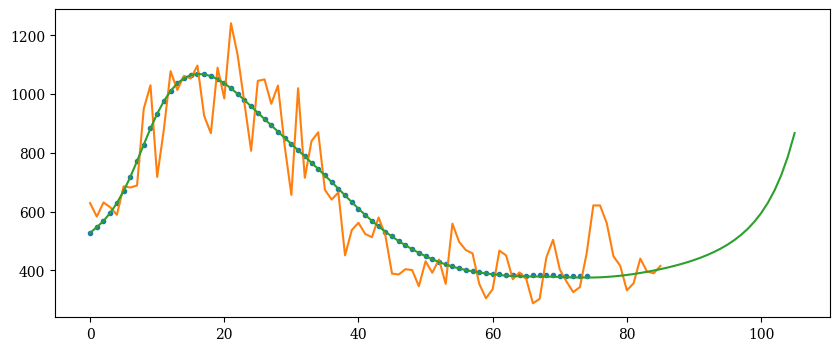

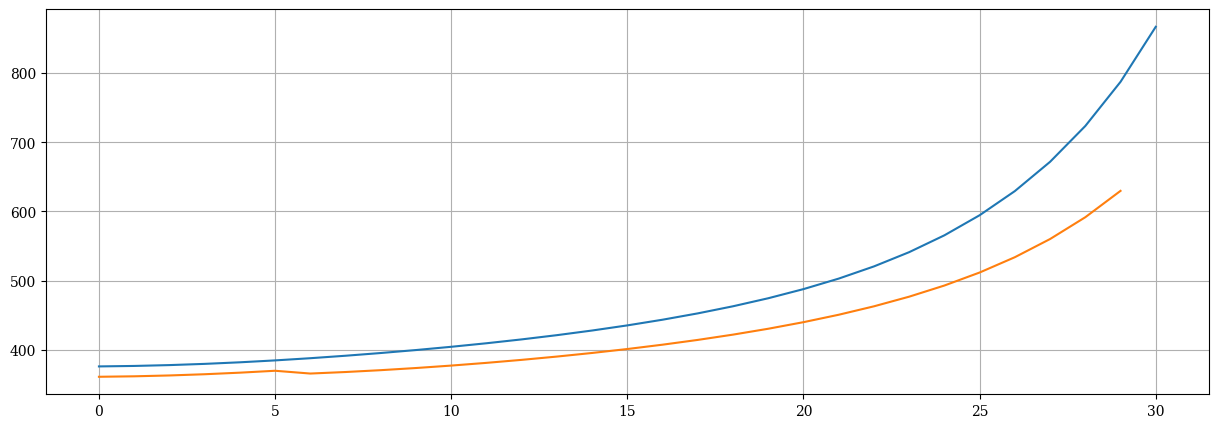

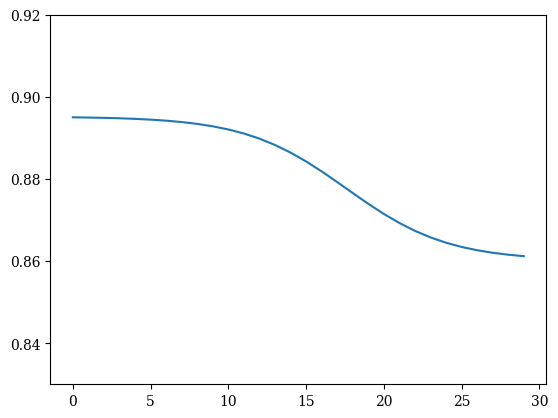

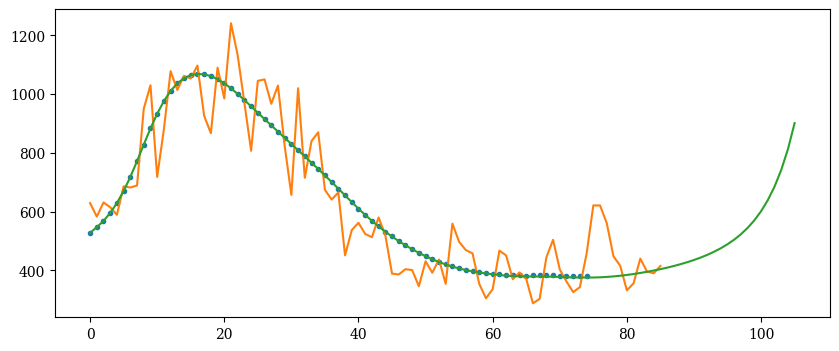

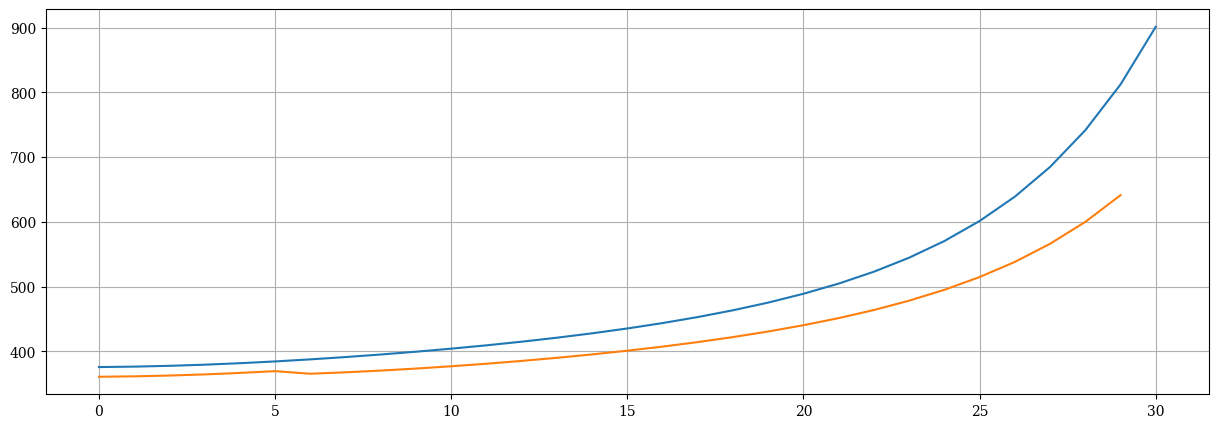

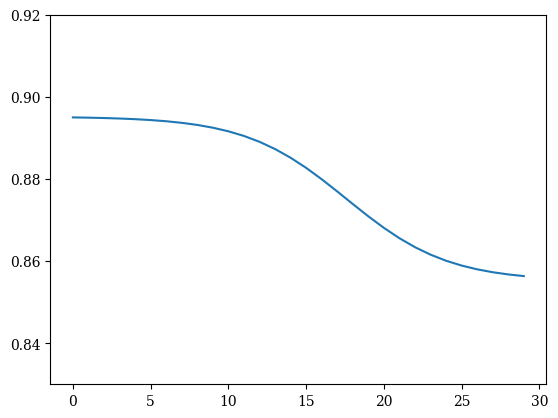

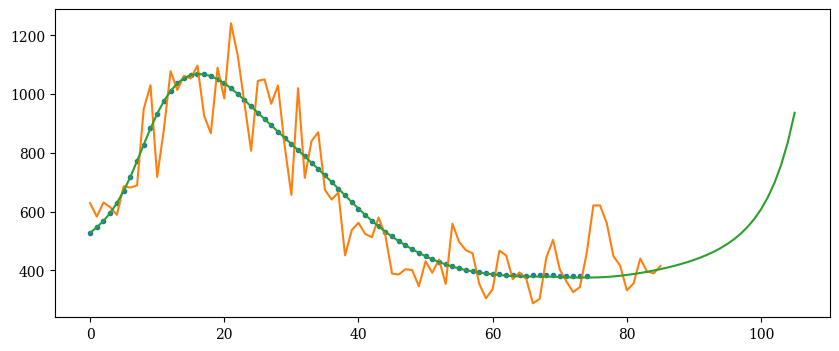

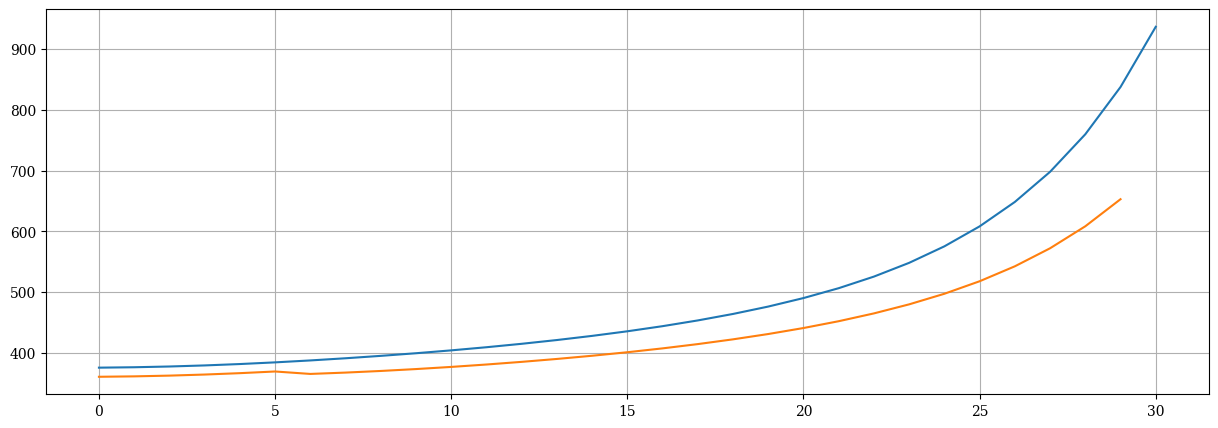

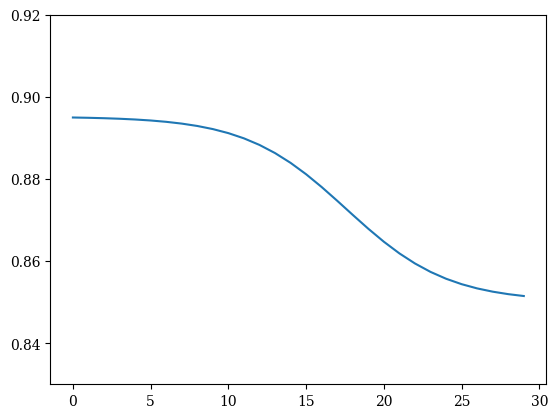

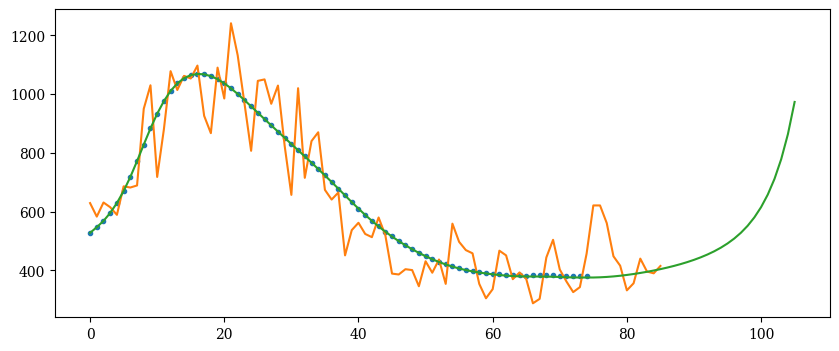

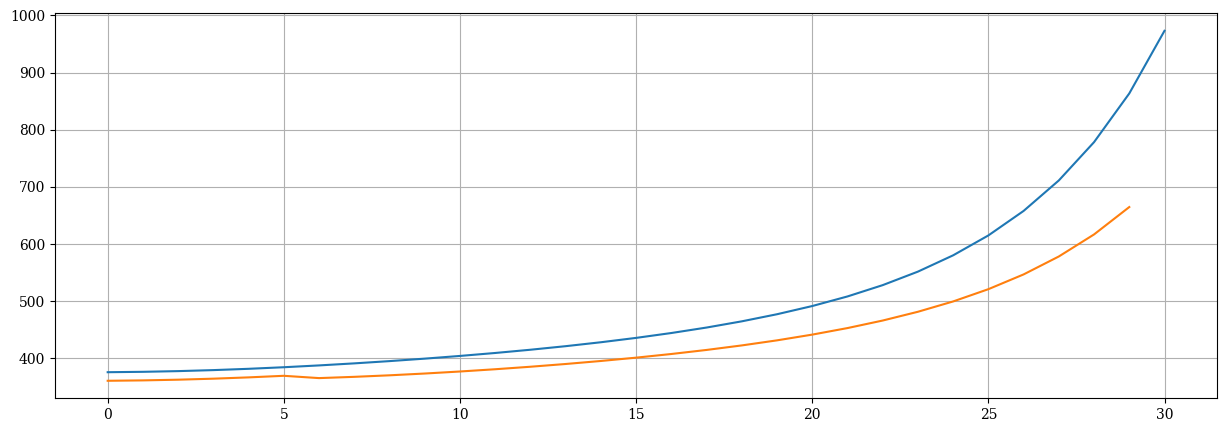

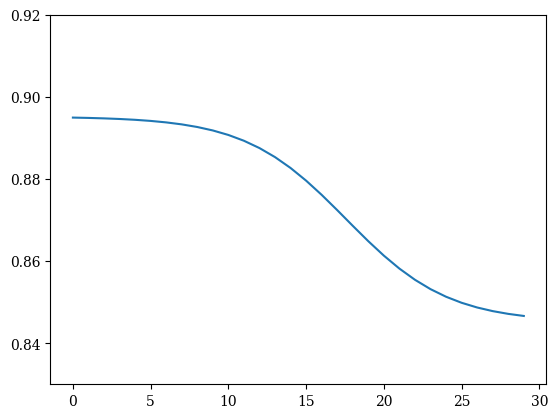

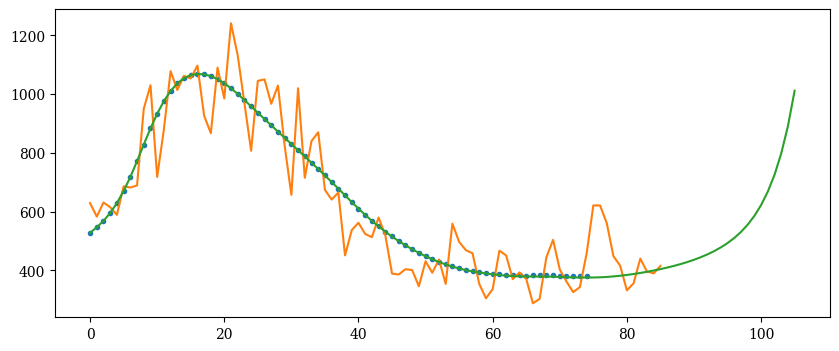

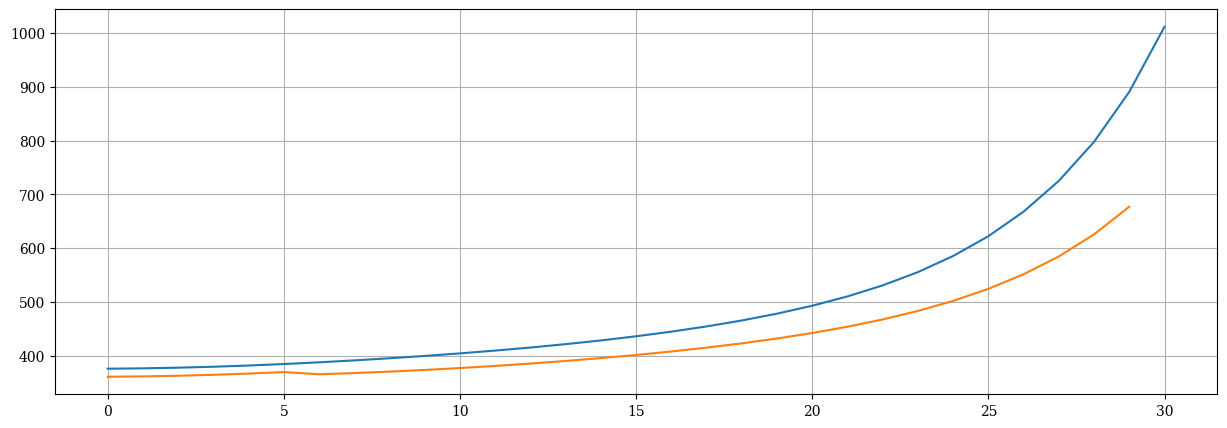

In [80]:
for i in [0, 0.005, 0.01,0.015,0.02,0.025,0.03,0.035,0.04,0.045,0.05]: # 2단계로 떨어졌기 때문에 줄어드는 정도.
    omega_G[394:424]=last_parameter[0]
    omega_A[394:424]=last_parameter[1]
    omega_B[394:424]=last_parameter[2]
    beta[394:424]=last_parameter[3]
    c[394:424]=last_parameter[4]
    #     theta_G[394:424]=last_parameter[5]
    #     theta_A[394:424]=last_parameter[6]
    #     theta_B[394:424]=last_parameter[7]
    
    globalpara(1/last_parameter[8],1/last_parameter[9],last_parameter[10],last_parameter[11],last_parameter[12])
    p[394:424]=last_parameter[13]
    fever[394:424]=last_parameter[14]
    plt.figure()
    theta_G_prev, theta_B_prev=third_theta_prev
    theta_after_scaling(394,424,last_parameter[5], last_parameter[5]-i, 0.99, 3, last_parameter[7], last_parameter[7]+i/2,0.99, 
                       5, delay=0)
    plt.plot(theta_G[394:424])
    plt.ylim([0.83,0.92])
    plt.figure(figsize=(10,4))
    plt.plot(w3b['Q_new'].iloc[45:].reset_index(drop=True), 'o', ms=3)
    plt.plot(korea_new_temp[320:406])
    t0,t1=seir_simulation(394,424,opt=third_output)
    plt.plot(np.append(third_full_dict['Q_new'].iloc[45:].values,t1[0]))
    plt.figure(figsize=(15,5))
    plt.plot(t1[0])
    plt.plot(np.append(t1[0][:6],[np.mean(t1[0][x-6:x+1]) for x in range(6,424-394)])-15) # 국내 1주 평균선 !! 
    plt.grid()
    sbp_temp_after=sbp_temp.copy()
    sbp_temp_after[5:13]=[last_parameter[5],last_parameter[5]-i,0.99,3,last_parameter[7],last_parameter[7]+i/2,0.99,5]
    delay=0
    f1,f2,f3,f4=sa_pipe(394,424,394,424,sbp_temp_after,third_output,third_full_array,third_full_dict)
    
    hyper_output.append(f1)
    hyper_full_array.append(f2)
    hyper_full_dict.append(f3)
    hyper_theta_prev.append(f4)
    




In [81]:
sbp_temp_after=sbp_temp.copy()
sbp_temp_after[6:14]=[last_parameter[5],last_parameter[5]-i,0.99,3,last_parameter[7],last_parameter[7]+i/2,0.99,5]
delay=0

#### pipe 살펴보기.

In [114]:
w3b

omega_G   omega_A   omega_B      beta          c   theta_G  \
2020-10-19  0.049968  0.448162  0.813548  0.299637  13.734361  0.740427   
2020-10-20  0.049968  0.448162  0.813548  0.299637  13.734361  0.733769   
2020-10-21  0.049968  0.448162  0.813548  0.299637  13.734361  0.727835   
2020-10-22  0.049968  0.448162  0.813548  0.299637  13.734361  0.722699   
2020-10-23  0.049968  0.448162  0.813548  0.299637  13.734361  0.718363   
2020-10-24  0.049968  0.448162  0.813548  0.299637  13.734361  0.714779   
2020-10-25  0.049968  0.448162  0.813548  0.299637  13.734361  0.711870   
2020-10-26  0.049968  0.448162  0.813548  0.299637  13.734361  0.709542   
2020-10-27  0.049968  0.448162  0.813548  0.299637  13.734361  0.707699   
2020-10-28  0.049968  0.448162  0.813548  0.299637  13.734361  0.706255   
2020-10-29  0.049968  0.448162  0.813548  0.299637  13.734361  0.705130   
2020-10-30  0.049968  0.448162  0.813548  0.299637  13.734361  0.704259   
2020-10-31  0.049968  0.448162  0.813548  0.299637  13.734361  0.703588   
2020-11-01  0.049968  0.448162  0.813548  0.299637  13.734361  0.703073   
2020-11-02  0.049968  0.448162  0.813548  0.299637  13.734361  0.702677   
2020-11-03  0.049968  0.448162  0.813548  0.299637  13.734361  0.702375   
2020-11-04  0.049968  0.448162  0.813548  0.299637  13.734361  0.702144   
2020-11-05  0.049968  0.448162  0.813548  0.299637  13.734361  0.701968   
2020-11-06  0.049968  0.448162  0.813548  0.299637  13.734361  0.701834   
2020-11-07  0.049968  0.448162  0.813548  0.299637  13.734361  0.701732   
2020-11-08  0.049968  0.448162  0.813548  0.299637  13.734361  0.701654   
2020-11-09  0.049968  0.448162  0.813548  0.299637  13.734361  0.701595   
2020-11-10  0.049968  0.448162  0.813548  0.299637  13.734361  0.701550   
2020-11-11  0.049968  0.448162  0.813548  0.299637  13.734361  0.701516   
2020-11-12  0.049968  0.448162  0.813548  0.299637  13.734361  0.701490   
2020-11-13  0.045975  0.448178  0.813631  0.309637  13.772287  0.727132   
2020-11-14  0.041982  0.448195  0.813715  0.309637  13.810213  0.752774   
2020-11-15  0.037989  0.448211  0.813799  0.309637  13.848140  0.778417   
2020-11-16  0.033996  0.448228  0.813882  0.309637  13.886066  0.804059   
2020-11-17  0.030002  0.448244  0.813966  0.309637  13.923993  0.829701   
2020-11-18  0.030002  0.448244  0.813966  0.309637  13.923993  0.829658   
2020-11-19  0.030002  0.448244  0.813966  0.309637  13.923993  0.829589   
2020-11-20  0.030002  0.448244  0.813966  0.309637  13.923993  0.829480   
2020-11-21  0.030002  0.448244  0.813966  0.309637  13.923993  0.829309   
2020-11-22  0.030002  0.448244  0.813966  0.309637  13.923993  0.829043   
2020-11-23  0.030002  0.448244  0.813966  0.309637  13.923993  0.828632   
2020-11-24  0.030002  0.448244  0.813966  0.309637  13.923993  0.828003   
2020-11-25  0.030002  0.448244  0.813966  0.309637  13.923993  0.827062   
2020-11-26  0.030002  0.448244  0.813966  0.309637  13.923993  0.825695   
2020-11-27  0.030002  0.448244  0.813966  0.309637  13.923993  0.823791   
2020-11-28  0.030002  0.448244  0.813966  0.309637  13.923993  0.821292   
2020-11-29  0.030002  0.448244  0.813966  0.309637  13.923993  0.818255   
2020-11-30  0.030002  0.448244  0.813966  0.309637  13.923993  0.814891   
2020-12-01  0.030002  0.448244  0.813966  0.309637  13.923993  0.811527   
2020-12-02  0.030002  0.448244  0.813966  0.309637  13.923993  0.808489   
2020-12-03  0.032001  0.424544  0.805557  0.313679  13.927751  0.840645   
2020-12-04  0.034000  0.400844  0.797149  0.313679  13.931509  0.872801   
2020-12-05  0.035999  0.377144  0.788740  0.313679  13.935268  0.904958   
2020-12-06  0.037998  0.353444  0.780332  0.313679  13.939026  0.937114   
2020-12-07  0.039997  0.329744  0.771923  0.313679  13.942784  0.969270   
2020-12-08  0.039997  0.329744  0.771923  0.313679  13.942784  0.969198   
2020-12-09  0.039997  0.329744  0.771923  0.313679  13.942784  0.969116   
2020-12-10  0.039997  0.329744  0.7719

In [115]:
# 419 or 418로 하면 될 듯 하다.
hyper_output=[]
hyper_full_array=[]
hyper_full_dict=[]
hyper_theta_prev=[]

In [116]:
for i, end in zip ([0, 0.005, 0.01,0.015,0.02,0.025,0.03,0.035,0.04,0.045,0.05], [419,419,418,418, 418,418,418, 418,418]): # 2단계로 떨어졌기 때문에 줄어드는 정도.
    omega_G[394:424]=last_parameter[0]
    omega_A[394:424]=last_parameter[1]
    omega_B[394:424]=last_parameter[2]
    beta[394:424]=last_parameter[3]
    c[394:424]=last_parameter[4]

    globalpara(1/last_parameter[8],1/last_parameter[9],last_parameter[10],last_parameter[11],last_parameter[12])
    p[394:424]=last_parameter[13]
    fever[394:424]=last_parameter[14]
    plt.figure()
    theta_G_prev, theta_B_prev=third_theta_prev
    theta_after_scaling(394,424,last_parameter[5], last_parameter[5]-i, 0.99, 3, last_parameter[7], last_parameter[7]+i/2,0.99, 
                       5, delay=0)
    sbp_temp_after=sbp_temp.copy()
    sbp_temp_after[5:13]=[last_parameter[5],last_parameter[5]-i,0.99,3,last_parameter[7],last_parameter[7]+i/2,0.99,5]
    delay=0
    f1,f2,f3,f4=sa_pipe(394,end,394,424,sbp_temp_after,third_output,third_full_array,third_full_dict)
    
    hyper_output.append(f1)
    hyper_full_array.append(f2)
    hyper_full_dict.append(f3)
    hyper_theta_prev.append(f4)
    




Window 별 첫 실행 이후
Window 별 첫 실행 이후
Window 별 첫 실행 이후
Window 별 첫 실행 이후
Window 별 첫 실행 이후
Window 별 첫 실행 이후
Window 별 첫 실행 이후
Window 별 첫 실행 이후
Window 별 첫 실행 이후


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [117]:
hyper_t0=[]
hyper_t1=[]

In [118]:
# 419 or 418로 하면 될 듯 하다.
hyper_output2=[]
hyper_full_array2=[]
hyper_full_dict2=[]
hyper_theta_prev2=[]

Window 별 첫 실행 이후
Window 별 첫 실행 이후
Window 별 첫 실행 이후
Window 별 첫 실행 이후
Window 별 첫 실행 이후
Window 별 첫 실행 이후


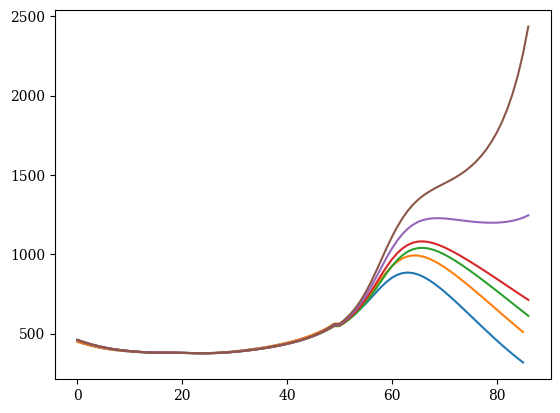

In [119]:
for i, end, after, real_end,delay2 in zip(range(6),[419,419,418,418,418,418], [0,0.005,0.01,0.015,0.02,0.025], [440, 447, 434, 434, 434, 428], [4,4,5,4,4,4]): # 2단계로 떨어졌기 때문에 줄어드는 정도.

    omega_G[418:480]=last_parameter[0]
    omega_A[418:480]=last_parameter[1]
    omega_B[418:480]=last_parameter[2]
    beta[418:480]=last_parameter[3]
    c[418:480]=last_parameter[4]

    globalpara(1/last_parameter[8],1/last_parameter[9],last_parameter[10],last_parameter[11],last_parameter[12])
    p[418:480]=last_parameter[13]
    fever[418:480]=last_parameter[14]
    theta_G_prev, theta_B_prev=hyper_theta_prev[i] #는 아니고 비슷한거 써야함.
    theta_G[end-1:end+delay2-1]=np.linspace(theta_G_prev,w3b['theta_G']['2020-12-07'],2+delay2)[1:-1]
    theta_B[end-1:end+delay2-1]=np.linspace(theta_B_prev,w3b['theta_B']['2020-12-07'],2+delay2)[1:-1]
    theta_A[end-1:end+delay2-1]=np.full(delay2,1)-(theta_G[end-1:end+delay2-1]+theta_B[end-1:end+delay2-1])
    if delay2==3:
        print('안쓰자나')
        theta_G[end+delay2-1:466+(end-418)]=w3b['theta_G']['2020-12-07':'2021-01-21']
        theta_A[end+delay2-1:466+(end-418)]=w3b['theta_A']['2020-12-07':'2021-01-21']
        theta_B[end+delay2-1:466+(end-418)]=w3b['theta_B']['2020-12-07':'2021-01-21']
    else:
        theta_G[end+delay2-1:466+(end-418)]=w3b['theta_G']['2020-12-07':'2021-01-21'][:-(delay2-3)]
        theta_A[end+delay2-1:466+(end-418)]=w3b['theta_A']['2020-12-07':'2021-01-21'][:-(delay2-3)]
        theta_B[end+delay2-1:466+(end-418)]=w3b['theta_B']['2020-12-07':'2021-01-21'][:-(delay2-3)]
        
    #theta_after_scaling(end, 480,0.96927,0.92,0.995,1.4,0.010049, 0.028503, 0.995, 2.08, delay=4)
    t0,t1=seir_simulation(end,454, opt=hyper_output[i])
    plt.plot(np.append(hyper_full_dict[i]['Q_new'].iloc[-50:].values,t1[0]))
    hyper_t0.append(t0)
    hyper_t1.append(t1)
    
    
    sbp_temp_after=sbp_temp.copy()
    sbp_temp_after[5:13]=[1,1,1,1,1,1,1,1] #쓰지 않습니다. 
    delay=0
    f1,f2,f3,f4=sa_pipe(end,real_end,end,real_end,sbp_temp_after,hyper_output[i],hyper_full_array[i],hyper_full_dict[i], pred_last=1000)
    
    hyper_output2.append(f1)
    hyper_full_array2.append(f2)
    hyper_full_dict2.append(f3)
    hyper_theta_prev2.append(f4)



#### 3,4,5,6은 3단계 진행해야 한다.  
할 것..  
저거 마무리 짓기. (4,5,6은 3단계 걍 주면 된다.) 

> 나머지 두 놈은 3단계 해야함.

1주,1주,2주,3주

In [120]:
# 419 or 418로 하면 될 듯 하다.
hyper_output3=[]
hyper_full_array3=[]
hyper_full_dict3=[]
hyper_theta_prev3=[]

Window 별 첫 실행 이후
Window 별 첫 실행 이후
Window 별 첫 실행 이후
Window 별 첫 실행 이후
Window 별 첫 실행 이후
Window 별 첫 실행 이후


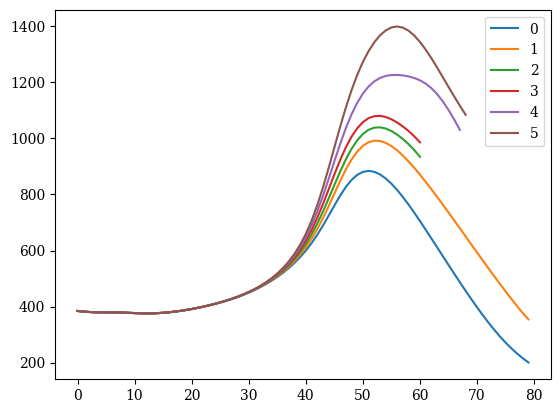

In [121]:
for i, end, real_end,theta_end,high,low, high2, low2, dwell1, dwell2 in zip(range(6), [440, 447, 434, 434, 434, 428],[460, 460, 441 ,441, 448, 449],
                                                            [460,460,441,441,448,449],[0.9656, 0.960, 0.98, 0.98, 0.98 ,0.98],[0.93, 0.93, 0.97, 0.97, 0.97, 0.97], [0.01054,0.0115, 0.007, 0.007, 0.007, 0.007],[0.025, 0.0285, 0.01, 0.01, 0.01, 0.01],
                                                           [0.1,0.1,2,2,2,0.1], [0.5,0.5,1,1,1,1]):
    theta_G_prev, theta_B_prev=hyper_theta_prev2[i] #는 아니고 비슷한거 써야함.
    theta_after_scaling(end, real_end,high,low,0.99,dwell1,high2, low2,0.990, dwell2, delay=4)
    t0,t1=seir_simulation(end,real_end, opt=hyper_output2[i])
    plt.plot(np.append(hyper_full_dict2[i]['Q_new'].iloc[-(end-380):-1].values,t1[0]), label=f'{i}')
    plt.legend()
    sbp_temp_after=sbp_temp.copy()
    sbp_temp_after[5:13]=[1,1,1,1,1,1,1,1] #쓰지 않습니다. 
    delay=0
    f1,f2,f3,f4=sa_pipe(end,real_end,end,theta_end,sbp_temp_after,hyper_output2[i],hyper_full_array2[i],hyper_full_dict2[i], pred_last=1000)

    hyper_output3.append(f1)
    hyper_full_array3.append(f2)
    hyper_full_dict3.append(f3)
    hyper_theta_prev3.append(f4)



In [122]:
hyper_theta_prev3

[(0.9300637515549817, 0.024871447869876304),
 (0.9300838965918662, 0.028264922615233393),
 (0.9730183827010878, 0.009466767626199935),
 (0.9730183827010878, 0.009466767626199935),
 (0.9704820216580007, 0.009925911129284811),
 (0.9700173138174948, 0.00994885550334842)]

In [123]:
# 419 or 418로 하면 될 듯 하다.
hyper_output4=[]
hyper_full_array4=[]
hyper_full_dict4=[]
hyper_theta_prev4=[]

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Window 별 첫 실행 이후
Window 별 첫 실행 이후
Window 별 첫 실행 이후
Window 별 첫 실행 이후
Window 별 첫 실행 이후
Window 별 첫 실행 이후


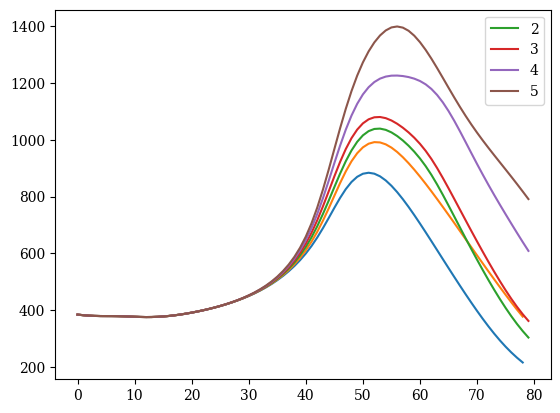

In [124]:
for i, end, real_end,theta_end,high,low, high2, low2, dwell1, dwell2 ,delay2 in zip(range(6), [460, 460, 441, 441, 448, 449],[465, 465, 460 ,460, 460, 460],
                                                            [460,460,460,460,460,460],[0.999, 0.999, 0.9730, 0.9730, 0.9703 ,0.9700],[0.99, 0.99, 0.93, 0.93, 0.93, 0.93], [0.01054,0.0115, 0.00947, 0.00947, 0.00993, 0.00995],[0.025, 0.0285, 0.025, 0.025, 0.025, 0.025],
                                                           [1,1,0.1,0.1,0.3,0.3], [0.5,0.5,2,2,2,2], [4,4,4,4,4,5]):
    theta_G_prev, theta_B_prev=hyper_theta_prev3[i] #는 아니고 비슷한거 써야함.
    theta_after_scaling(end, real_end,high,low,0.99,dwell1,high2, low2,0.990, dwell2, delay=delay2)
    t0,t1=seir_simulation(end,real_end, opt=hyper_output3[i])
    if (2<=i<=5):
        plt.plot(np.append(hyper_full_dict3[i]['Q_new'].iloc[(380-end):-1].values,t1[0]), label=f'{i}')
    else:
        plt.plot(hyper_full_dict3[i]['Q_new'].iloc[-80:-1].values)
    plt.legend()
    sbp_temp_after=sbp_temp.copy()
    sbp_temp_after[5:13]=[1,1,1,1,1,1,1,1] #쓰지 않습니다. 
    delay=0
    f1,f2,f3,f4=sa_pipe(end,real_end,end,theta_end,sbp_temp_after,hyper_output3[i],hyper_full_array3[i],hyper_full_dict3[i], pred_last=1000)

    hyper_output4.append(f1)
    hyper_full_array4.append(f2)
    hyper_full_dict4.append(f3)
    hyper_theta_prev4.append(f4)



In [126]:
hyper_output4[:2]=hyper_output3[:2]
hyper_full_array4[:2]=hyper_full_array3[:2]
hyper_full_dict4[:2]=hyper_full_dict3[:2]
hyper_theta_prev4[:2]=hyper_theta_prev3[:2]

In [127]:
# 419 or 418로 하면 될 듯 하다.
hyper_output5=[]
hyper_full_array5=[]
hyper_full_dict5=[]
hyper_theta_prev5=[]

> plotting

In [262]:
# 395~460
last_window=pd.date_range(start='2020-01-19', periods=459)

In [263]:
last_window=last_window.strftime('%Y-%m-%d').tolist()

In [264]:
korea_new.iloc[320:322]

2020-12-04    566.238653
2020-12-05    588.453086
dtype: float64

In [266]:
mark_one=np.array([[392,419,447],[392,419,454]])
mark_two=np.array([[392,418,434,441],[392,418,434,448],[392,418,428,448]])

In [267]:
mark_one-=349
mark_two-=349

In [270]:
hyper_full_dict4[3]

omega_G   omega_A   omega_B      beta          c   theta_G   theta_A  \
275  0.049968  0.448162  0.813548  0.299637  13.734361  0.740427  0.225215   
276  0.049968  0.448162  0.813548  0.299637  13.734361  0.733769  0.230946   
277  0.049968  0.448162  0.813548  0.299637  13.734361  0.727835  0.235697   
278  0.049968  0.448162  0.813548  0.299637  13.734361  0.722699  0.239345   
279  0.049968  0.448162  0.813548  0.299637  13.734361  0.718363  0.241837   
..        ...       ...       ...       ...        ...       ...       ...   
456  0.039997  0.329744  0.771923  0.313679  13.942784  0.930498  0.047450   
457  0.039997  0.329744  0.771923  0.313679  13.942784  0.930271  0.046478   
458  0.039997  0.329744  0.771923  0.313679  13.942784  0.930147  0.045852   
459  0.039997  0.329744  0.771923  0.313679  13.942784  0.930080  0.045478   
460  0.039997  0.329744  0.771923  0.313679  13.942784  0.930043  0.045264   

      theta_B     sigma    delta       row      ep_A        ep         p  \
275  0.034357  0.220717  0.29557  0.699298  0.242331  2.130193  0.375429   
276  0.035286  0.220717  0.29557  0.699298  0.242331  2.130193  0.375429   
277  0.036468  0.220717  0.29557  0.699298  0.242331  2.130193  0.375429   
278  0.037956  0.220717  0.29557  0.699298  0.242331  2.130193  0.375429   
279  0.039800  0.220717  0.29557  0.699298  0.242331  2.130193  0.375429   
..        ...       ...      ...       ...       ...       ...       ...   
456  0.022052  0.220388  0.29545  0.700710  0.245916  2.137644  0.377840   
457  0.023251  0.220388  0.29545  0.700710  0.245916  2.137644  0.377840   
458  0.024000  0.220388  0.29545  0.700710  0.245916  2.137644  0.377840   
459  0.024442  0.220388  0.29545  0.700710  0.245916  2.137644  0.377840   
460  0.024692  0.220388  0.29545  0.700710  0.245916  2.137644  0.377840   

        fever             S          E_G         E_A        E_B         I_G  \
275  0.257465  5.172123e+07   480.030527  146.010589  22.274394  102.749683   
276  0.257465  5.172103e+07   487.683133  148.338277  22.629491  104.239620   
277  0.257465  5.172083e+07   493.876207  151.620923  23.140040  105.797081   
278  0.257465  5.172063e+07   499.313492  155.585938  23.836496  107.305238   
279  0.257465  5.172043e+07   504.645013  160.008282  24.757531  108.728502   
..        ...           ...          ...         ...        ...         ...   
456  0.235306  5.147421e+07  2910.988161  145.863813  47.533614  851.275659   
457  0.235306  5.147354e+07  2721.638880  138.624657  49.561779  791.774535   
458  0.235306  5.147290e+07  2559.913921  131.147379  51.285188  737.363573   
459  0.235306  5.147229e+07  2423.074274  124.025909  52.530093  688.360980   
460  0.235306  5.147169e+07  2306.990868  117.524425  53.241425  644.810284   

           I_A        I_B          A_G         A_A        A_B             Q  \
275  31.253307   4.767795   482.903027  146.884315  22.407684   1399.534713   
276  31.706501   4.836931   486.700839  148.039493  22.583910   1385.044711   
277  32.180233   4.909200   491.126982  149.385791  22.789292   1372.454215   
278  32.731813   4.993994   495.864720  151.042782  23.043580   1361.160583   
279  33.383522   5.099949   500.752040  153.070563  23.368348   1350.785177   
..         ...        ...          ...         ...        ...           ...   
456  33.110181  10.214197  5128.896761  155.667821  55.903480  10345.797353   
457  32.948930  10.331721  4831.039125  155.508975  55.097606  10046.637379   
458  32.357827  10.548301  4547.345221  154.255348  54.722372   9740.569457   
459  31.448165  10.814567  4280.017042  152.029701  54.667961   9430.347128   
460  30.337532  11.084280  4030.512725  149.028626  54.813727   9118.707767   

                 R            R_I            R_A       Q_new        Q_total  \
275   55930.839108   23896.770841   32034.068267   84.494833   25296.305554   
276   56125.742320   23996.737606   32129.004714   85.476763   25381.782317   
277   56320.357163   

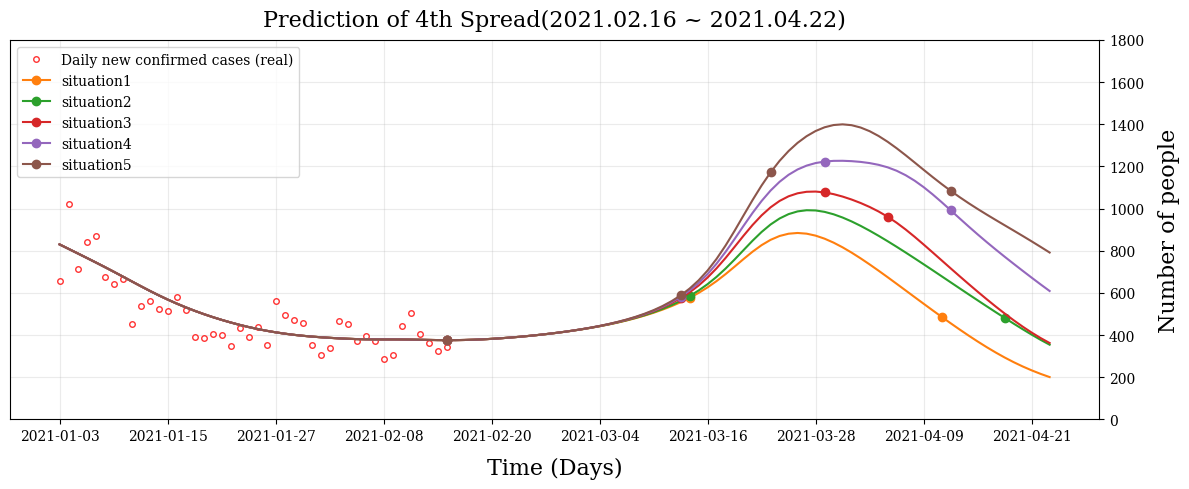

In [268]:
plt.figure(figsize=(12,5))
ax=plt.subplot(111)
plt.title('Prediction of 4th Spread(2021.02.16 ~ 2021.04.22)', fontsize=16, pad=10)
plt.plot(korea_new_raw[350:394].values, 'o', mfc='white', mec='red', alpha=0.8, ms=4, label='Daily new confirmed cases (real)')
#plt.plot((w3['Q_new']-w3['abroad']+lamda_raw[274:394]).values,'-', color='orangered',linewidth=2.5, ms=5, alpha=0.7, label='Daily new confirmed cases (predict)')
#plt.plot((w3['Q_new']).values,'-', color='orangered',linewidth=1.5, ms=5, alpha=0.7, label='Daily new confirmed cases (predict)')
for idx, i in enumerate(range(2)):
    plt.plot(hyper_full_dict4[i]['Q_new'].loc[350:].values,'-o',label=f'situation{i+1}', markevery=mark_one[idx])
for idx,i in enumerate(range(3,6)):
    plt.plot(hyper_full_dict4[i]['Q_new'].loc[350:].values,'-o',label=f'situation{i}', markevery=mark_two[idx])
plt.grid(alpha=0.25)
plt.legend()
#compare_infectivity(w3)[2].iloc[:,-3:].plot(kind='line', ax=ax)
n=12
plt.xticks(np.arange(len(hyper_full_dict4[i]['Q_new'].loc[350:]))[::n], last_window[350:][::n])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
plt.ylim([0,1800])
plt.legend(fontsize=10,loc='upper left')
plt.ylabel('Number of people', fontsize=16, labelpad=10)
plt.xlabel('Time (Days)', fontsize=16, labelpad=10)

plt.tight_layout()
plt.savefig('picture/Prediction of 4h Spread', dpi=600)



In [151]:
for i in [0,1,3,4,5]:
    print(hyper_full_dict4[i]['Q_new'].loc[350:].sort_values(ascending=False)[:3])

432    884.188766
433    880.893584
431    880.696105
Name: Q_new, dtype: float64
433    992.093187
434    991.044586
432    986.561680
Name: Q_new, dtype: float64
434    1080.672652
433    1079.626600
435    1076.614822
Name: Q_new, dtype: float64
437    1226.731828
436    1226.362886
438    1224.999050
Name: Q_new, dtype: float64
437    1399.704070
436    1396.387686
438    1395.655945
Name: Q_new, dtype: float64


# 432 / 433 / 434 / 437 / 437 

In [282]:
print(last_window[418],last_window[433],last_window[434],last_window[437])

2021-03-12 2021-03-27 2021-03-28 2021-03-31


In [281]:
print(last_window[432],last_window[433],last_window[434],last_window[437])

2021-03-26 2021-03-27 2021-03-28 2021-03-31


In [159]:
korea_new_raw[250:].sort_values(ascending=False).head(5)

2020-12-25    1241
2020-12-26    1132
2020-12-20    1097
2020-12-23    1090
2020-12-16    1078
dtype: int64

In [41]:
korea_new_raw[380:].mean()

382.92857142857144

In [164]:
korea_new_raw[100:240].sort_values(ascending=False).head(5)

2020-08-27    441
2020-08-23    397
2020-08-28    371
2020-08-22    332
2020-08-21    324
dtype: int64

In [273]:
last_window[432]

'2021-03-26'

In [275]:
last_window[341]

'2020-12-25'

In [277]:
last_window[221]

'2020-08-27'

In [280]:
last_window[41]

'2020-02-29'

>41-221-341-432  
180-120-91 (일 만의 피크)

### 조기확진자 변경

In [302]:
w2b_temp=pd.read_pickle('full_dict(Window=2, rho=best).pickle')

In [319]:
omega_G[181:257]=w2b_temp['omega_G']
omega_A[181:257]=w2b_temp['omega_A']
omega_B[181:257]=w2b_temp['omega_B']

beta[181:257]=w2b_temp['beta']
c[181:257]=w2b_temp['c']
theta_B[181:257]=w2b_temp['theta_B']
theta_A[181:257]=w2b_temp['theta_A']
theta_G[181:257]=w2b_temp['theta_G']
sigma=w2b_temp['sigma'].iloc[0]
delta=w2b_temp['delta'].iloc[0]
row=0.6985
ep_A=0.242
ep=2.133736



In [369]:
p[181:257]=w2b_temp['p']*1.1
fever[181:257]=w2b_temp['fever']

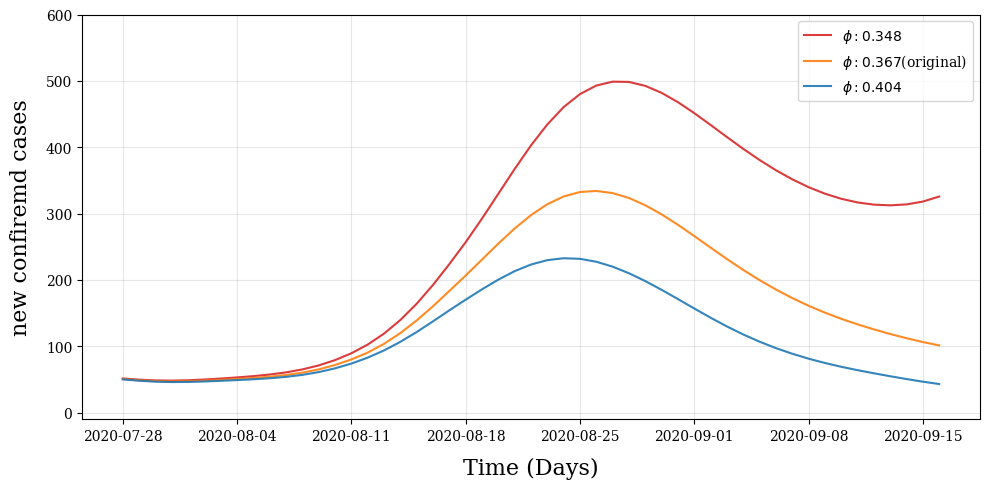

In [398]:
plt.figure(figsize=(10,5))
n=7
plt.plot(first[10:],'-',color=colors[2],alpha=0.9, label=r'$\phi : 0.348$')
plt.plot(w2b_temp['Q_new'].values[10:-15], color=colors[1], alpha=0.9, label=r'$\phi : 0.367$(original)')
plt.plot(second[10:], color=colors[0], alpha=0.9, label=r'$\phi : 0.404$')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.ylim([-10,600])
plt.ylabel('new confiremd cases', fontsize=16, labelpad=10)
plt.xlabel('Time (Days)', fontsize=16, labelpad=10)
plt.xticks(np.arange(len(w2b_temp[10:-15]))[::n], korea_new_raw[191:242].index[::n])
plt.grid(alpha=0.3)
plt.tight_layout()

plt.savefig('picture/4_phi_variation', dpi=600)

# 전체 확산세 조망

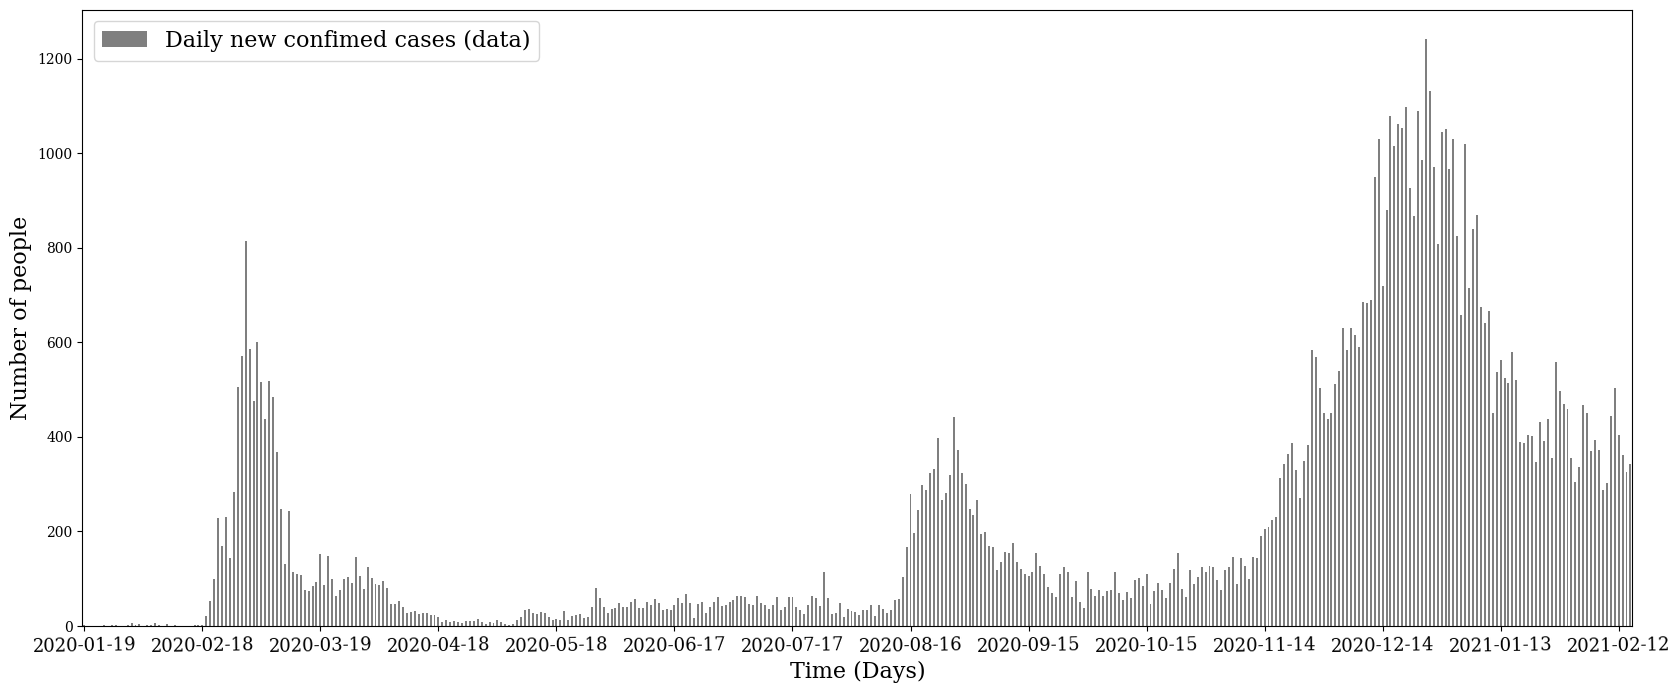

In [74]:
fig,ax=plt.subplots(figsize=(20,8))
korea_new_raw[:394].plot(kind='bar',cmap='gray',secondary_y=False,  rot=1, alpha =0.5
                            , ax=ax, use_index=True, label='Daily new confimed cases (data)')
plt.legend(fontsize=16)
n=30
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])
plt.xticks(size=13)
plt.xlabel('Time (Days)', size=16)
plt.ylabel('Number of people', size=16)
plt.savefig('picture/FullWave', dpi=600)